# TD3 hyperparameter search with normalized reward (spinup library)

In [1]:
import gym
from gym import spaces
from gym.utils import seeding
from gym.envs.registration import register

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control

import spinup

from os import path
from scipy.integrate import solve_ivp
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
#from vpython import *
from functools import partial

register(id='gyroscopeenv-v0',entry_point='gym_GyroscopeEnv.envs:GyroscopeEnv')

## Baseline iteration

#### Learning rate 

In [2]:

# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_lr_var0', exp_name='td3_n_it1_lr_var0')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0008
qlr_b = 0.0008

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

Logging data to td3_n_it1_lr_var0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            800
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	150,
    "env_fn":	"functools.partial(<function env_fn at 0x7fc9b0b23710>, env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.05, 'qx2': 0.01, 'qx4': 0.01, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110)",
    "epochs":	800,
    "exp_name":	"td3_n_it1_lr_var0",
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7fc982cc20d0>":	{
            "epoch_dict":	{},
            "exp_name":	"td3_n_it1_lr_var0",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"td3_n_it1_lr_var0",
            "output_file":	{
                "<_io.TextIOWrapper name='td3_n_it1_lr_var0/progress.txt' mode='w' encoding='UTF-8'>":	{
                 

/home/lecauchoismatthieu/drlenv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |            -319 |
|          StdEpRet |              25 |
|          MaxEpRet |            -283 |
|          MinEpRet |            -373 |
|  AverageTestEpRet |            -214 |
|      StdTestEpRet |            8.72 |
|      MaxTestEpRet |            -196 |
|      MinTestEpRet |            -227 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|     AverageQ1Vals |           -3.32 |
|         StdQ1Vals |           0.644 |
|         MaxQ1Vals |           0.245 |
|         MinQ1Vals |           -5.51 |
|     AverageQ2Vals |           -3.32 |
|         StdQ2Vals |           0.635 |
|         MaxQ2Vals |           0.106 |
|         MinQ2Vals |           -5.57 |
|            LossPi |               3 |
|             LossQ |           0.439 |
|              Time |            8.42 |
---------------------------------------


---------------------------------------
|             Epoch |              10 |
|      AverageEpRet |            -317 |
|          StdEpRet |            30.9 |
|          MaxEpRet |            -261 |
|          MinEpRet |            -394 |
|  AverageTestEpRet |            -202 |
|      StdTestEpRet |            12.3 |
|      MaxTestEpRet |            -182 |
|      MinTestEpRet |            -220 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+04 |
|     AverageQ1Vals |           -17.6 |
|         StdQ1Vals |            2.19 |
|         MaxQ1Vals |           -11.6 |
|         MinQ1Vals |           -26.4 |
|     AverageQ2Vals |           -17.6 |
|         StdQ2Vals |            2.19 |
|         MaxQ2Vals |           -11.7 |
|         MinQ2Vals |           -26.4 |
|            LossPi |            16.6 |
|             LossQ |           0.123 |
|              Time |             139 |
---------------------------------------


---------------------------------------
|             Epoch |              19 |
|      AverageEpRet |            -200 |
|          StdEpRet |            16.9 |
|          MaxEpRet |            -151 |
|          MinEpRet |            -218 |
|  AverageTestEpRet |            -209 |
|      StdTestEpRet |            11.6 |
|      MaxTestEpRet |            -180 |
|      MinTestEpRet |            -220 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.13e+04 |
|     AverageQ1Vals |           -28.4 |
|         StdQ1Vals |            2.92 |
|         MaxQ1Vals |           -21.5 |
|         MinQ1Vals |           -40.5 |
|     AverageQ2Vals |           -28.4 |
|         StdQ2Vals |            2.92 |
|         MaxQ2Vals |           -21.5 |
|         MinQ2Vals |           -40.3 |
|            LossPi |            27.6 |
|             LossQ |           0.117 |
|              Time |             274 |
---------------------------------------


---------------------------------------
|             Epoch |              28 |
|      AverageEpRet |            -207 |
|          StdEpRet |            10.9 |
|          MaxEpRet |            -181 |
|          MinEpRet |            -221 |
|  AverageTestEpRet |            -204 |
|      StdTestEpRet |             6.6 |
|      MaxTestEpRet |            -188 |
|      MinTestEpRet |            -213 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.62e+04 |
|     AverageQ1Vals |           -38.8 |
|         StdQ1Vals |            3.22 |
|         MaxQ1Vals |           -30.1 |
|         MinQ1Vals |           -52.1 |
|     AverageQ2Vals |           -38.8 |
|         StdQ2Vals |            3.22 |
|         MaxQ2Vals |           -30.2 |
|         MinQ2Vals |           -51.9 |
|            LossPi |            38.3 |
|             LossQ |           0.124 |
|              Time |             410 |
---------------------------------------


---------------------------------------
|             Epoch |              37 |
|      AverageEpRet |            -196 |
|          StdEpRet |            19.5 |
|          MaxEpRet |            -156 |
|          MinEpRet |            -223 |
|  AverageTestEpRet |            -197 |
|      StdTestEpRet |            13.5 |
|      MaxTestEpRet |            -172 |
|      MinTestEpRet |            -214 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.1e+04 |
|     AverageQ1Vals |           -48.7 |
|         StdQ1Vals |            3.68 |
|         MaxQ1Vals |           -37.8 |
|         MinQ1Vals |             -64 |
|     AverageQ2Vals |           -48.7 |
|         StdQ2Vals |            3.68 |
|         MaxQ2Vals |             -38 |
|         MinQ2Vals |           -64.1 |
|            LossPi |            48.3 |
|             LossQ |           0.148 |
|              Time |             544 |
---------------------------------------


---------------------------------------
|             Epoch |              46 |
|      AverageEpRet |            -194 |
|          StdEpRet |            25.9 |
|          MaxEpRet |            -117 |
|          MinEpRet |            -220 |
|  AverageTestEpRet |            -188 |
|      StdTestEpRet |            21.5 |
|      MaxTestEpRet |            -143 |
|      MinTestEpRet |            -216 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.59e+04 |
|     AverageQ1Vals |           -57.8 |
|         StdQ1Vals |            4.25 |
|         MaxQ1Vals |           -44.4 |
|         MinQ1Vals |           -75.4 |
|     AverageQ2Vals |           -57.8 |
|         StdQ2Vals |            4.25 |
|         MaxQ2Vals |           -44.4 |
|         MinQ2Vals |           -75.1 |
|            LossPi |            57.5 |
|             LossQ |           0.185 |
|              Time |             678 |
---------------------------------------


---------------------------------------
|             Epoch |              55 |
|      AverageEpRet |            -183 |
|          StdEpRet |            19.3 |
|          MaxEpRet |            -153 |
|          MinEpRet |            -210 |
|  AverageTestEpRet |            -176 |
|      StdTestEpRet |              23 |
|      MaxTestEpRet |            -144 |
|      MinTestEpRet |            -221 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.07e+04 |
|     AverageQ1Vals |             -66 |
|         StdQ1Vals |            4.95 |
|         MaxQ1Vals |           -50.4 |
|         MinQ1Vals |           -86.5 |
|     AverageQ2Vals |             -66 |
|         StdQ2Vals |            4.95 |
|         MaxQ2Vals |           -50.5 |
|         MinQ2Vals |             -87 |
|            LossPi |            65.7 |
|             LossQ |           0.228 |
|              Time |             811 |
---------------------------------------


---------------------------------------
|             Epoch |              64 |
|      AverageEpRet |            -186 |
|          StdEpRet |            20.4 |
|          MaxEpRet |            -146 |
|          MinEpRet |            -218 |
|  AverageTestEpRet |            -171 |
|      StdTestEpRet |            31.2 |
|      MaxTestEpRet |            -107 |
|      MinTestEpRet |            -212 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.06e+05 |
|     AverageQ1Vals |           -73.4 |
|         StdQ1Vals |            5.67 |
|         MaxQ1Vals |           -55.8 |
|         MinQ1Vals |           -96.2 |
|     AverageQ2Vals |           -73.4 |
|         StdQ2Vals |            5.67 |
|         MaxQ2Vals |           -55.8 |
|         MinQ2Vals |           -95.9 |
|            LossPi |            73.1 |
|             LossQ |           0.284 |
|              Time |             946 |
---------------------------------------


---------------------------------------
|             Epoch |              73 |
|      AverageEpRet |            -177 |
|          StdEpRet |            19.9 |
|          MaxEpRet |            -149 |
|          MinEpRet |            -214 |
|  AverageTestEpRet |            -171 |
|      StdTestEpRet |            25.2 |
|      MaxTestEpRet |            -121 |
|      MinTestEpRet |            -213 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.2e+05 |
|     AverageQ1Vals |           -79.9 |
|         StdQ1Vals |            6.45 |
|         MaxQ1Vals |           -60.7 |
|         MinQ1Vals |            -105 |
|     AverageQ2Vals |           -79.9 |
|         StdQ2Vals |            6.45 |
|         MaxQ2Vals |           -60.8 |
|         MinQ2Vals |            -104 |
|            LossPi |            79.5 |
|             LossQ |           0.342 |
|              Time |        1.08e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              82 |
|      AverageEpRet |            -173 |
|          StdEpRet |            26.6 |
|          MaxEpRet |            -120 |
|          MinEpRet |            -212 |
|  AverageTestEpRet |            -175 |
|      StdTestEpRet |            18.1 |
|      MaxTestEpRet |            -148 |
|      MinTestEpRet |            -201 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.35e+05 |
|     AverageQ1Vals |           -85.6 |
|         StdQ1Vals |            7.23 |
|         MaxQ1Vals |           -64.9 |
|         MinQ1Vals |            -113 |
|     AverageQ2Vals |           -85.6 |
|         StdQ2Vals |            7.23 |
|         MaxQ2Vals |             -65 |
|         MinQ2Vals |            -112 |
|            LossPi |            85.2 |
|             LossQ |           0.406 |
|              Time |        1.21e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              91 |
|      AverageEpRet |            -166 |
|          StdEpRet |            24.7 |
|          MaxEpRet |            -111 |
|          MinEpRet |            -206 |
|  AverageTestEpRet |            -174 |
|      StdTestEpRet |            19.3 |
|      MaxTestEpRet |            -145 |
|      MinTestEpRet |            -200 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.5e+05 |
|     AverageQ1Vals |           -90.5 |
|         StdQ1Vals |            7.96 |
|         MaxQ1Vals |           -69.5 |
|         MinQ1Vals |            -120 |
|     AverageQ2Vals |           -90.5 |
|         StdQ2Vals |            7.96 |
|         MaxQ2Vals |           -69.6 |
|         MinQ2Vals |            -120 |
|            LossPi |            90.2 |
|             LossQ |           0.479 |
|              Time |        1.35e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             100 |
|      AverageEpRet |            -161 |
|          StdEpRet |            23.8 |
|          MaxEpRet |            -118 |
|          MinEpRet |            -202 |
|  AverageTestEpRet |            -164 |
|      StdTestEpRet |            13.8 |
|      MaxTestEpRet |            -146 |
|      MinTestEpRet |            -186 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+05 |
|     AverageQ1Vals |           -94.9 |
|         StdQ1Vals |            8.64 |
|         MaxQ1Vals |           -73.1 |
|         MinQ1Vals |            -127 |
|     AverageQ2Vals |           -94.9 |
|         StdQ2Vals |            8.64 |
|         MaxQ2Vals |           -73.2 |
|         MinQ2Vals |            -129 |
|            LossPi |            94.5 |
|             LossQ |            0.54 |
|              Time |        1.48e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             109 |
|      AverageEpRet |            -163 |
|          StdEpRet |            21.6 |
|          MaxEpRet |            -113 |
|          MinEpRet |            -201 |
|  AverageTestEpRet |            -181 |
|      StdTestEpRet |            14.9 |
|      MaxTestEpRet |            -157 |
|      MinTestEpRet |            -202 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.8e+05 |
|     AverageQ1Vals |           -98.6 |
|         StdQ1Vals |            9.28 |
|         MaxQ1Vals |             -76 |
|         MinQ1Vals |            -135 |
|     AverageQ2Vals |           -98.6 |
|         StdQ2Vals |            9.28 |
|         MaxQ2Vals |           -76.2 |
|         MinQ2Vals |            -136 |
|            LossPi |            98.3 |
|             LossQ |           0.603 |
|              Time |        1.62e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             118 |
|      AverageEpRet |            -163 |
|          StdEpRet |            24.6 |
|          MaxEpRet |            -110 |
|          MinEpRet |            -208 |
|  AverageTestEpRet |            -177 |
|      StdTestEpRet |            28.1 |
|      MaxTestEpRet |            -117 |
|      MinTestEpRet |            -220 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.95e+05 |
|     AverageQ1Vals |            -102 |
|         StdQ1Vals |            9.88 |
|         MaxQ1Vals |           -78.9 |
|         MinQ1Vals |            -143 |
|     AverageQ2Vals |            -102 |
|         StdQ2Vals |            9.88 |
|         MaxQ2Vals |           -79.1 |
|         MinQ2Vals |            -143 |
|            LossPi |             102 |
|             LossQ |           0.669 |
|              Time |        1.75e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             127 |
|      AverageEpRet |            -161 |
|          StdEpRet |            24.1 |
|          MaxEpRet |            -119 |
|          MinEpRet |            -205 |
|  AverageTestEpRet |            -151 |
|      StdTestEpRet |            17.7 |
|      MaxTestEpRet |            -130 |
|      MinTestEpRet |            -192 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         2.1e+05 |
|     AverageQ1Vals |            -105 |
|         StdQ1Vals |            10.4 |
|         MaxQ1Vals |           -81.6 |
|         MinQ1Vals |            -149 |
|     AverageQ2Vals |            -105 |
|         StdQ2Vals |            10.4 |
|         MaxQ2Vals |           -81.5 |
|         MinQ2Vals |            -148 |
|            LossPi |             105 |
|             LossQ |           0.715 |
|              Time |        1.89e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             136 |
|      AverageEpRet |            -159 |
|          StdEpRet |            31.2 |
|          MaxEpRet |           -99.9 |
|          MinEpRet |            -229 |
|  AverageTestEpRet |            -161 |
|      StdTestEpRet |            32.3 |
|      MaxTestEpRet |           -91.1 |
|      MinTestEpRet |            -202 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.24e+05 |
|     AverageQ1Vals |            -107 |
|         StdQ1Vals |              11 |
|         MaxQ1Vals |           -83.1 |
|         MinQ1Vals |            -152 |
|     AverageQ2Vals |            -107 |
|         StdQ2Vals |              11 |
|         MaxQ2Vals |             -83 |
|         MinQ2Vals |            -153 |
|            LossPi |             107 |
|             LossQ |           0.753 |
|              Time |        2.02e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             145 |
|      AverageEpRet |            -162 |
|          StdEpRet |            24.7 |
|          MaxEpRet |            -119 |
|          MinEpRet |            -203 |
|  AverageTestEpRet |            -154 |
|      StdTestEpRet |              33 |
|      MaxTestEpRet |            -103 |
|      MinTestEpRet |            -204 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.39e+05 |
|     AverageQ1Vals |            -110 |
|         StdQ1Vals |            11.4 |
|         MaxQ1Vals |           -84.8 |
|         MinQ1Vals |            -158 |
|     AverageQ2Vals |            -110 |
|         StdQ2Vals |            11.4 |
|         MaxQ2Vals |           -84.7 |
|         MinQ2Vals |            -156 |
|            LossPi |             109 |
|             LossQ |           0.786 |
|              Time |        2.16e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             154 |
|      AverageEpRet |            -152 |
|          StdEpRet |            20.5 |
|          MaxEpRet |            -101 |
|          MinEpRet |            -184 |
|  AverageTestEpRet |            -172 |
|      StdTestEpRet |            33.4 |
|      MaxTestEpRet |           -81.9 |
|      MinTestEpRet |            -198 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.54e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            11.8 |
|         MaxQ1Vals |           -85.9 |
|         MinQ1Vals |            -162 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            11.8 |
|         MaxQ2Vals |           -85.6 |
|         MinQ2Vals |            -161 |
|            LossPi |             111 |
|             LossQ |           0.807 |
|              Time |        2.29e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             163 |
|      AverageEpRet |            -164 |
|          StdEpRet |            29.6 |
|          MaxEpRet |            -102 |
|          MinEpRet |            -206 |
|  AverageTestEpRet |            -167 |
|      StdTestEpRet |            22.4 |
|      MaxTestEpRet |            -143 |
|      MinTestEpRet |            -220 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.69e+05 |
|     AverageQ1Vals |            -113 |
|         StdQ1Vals |            12.2 |
|         MaxQ1Vals |             -86 |
|         MinQ1Vals |            -165 |
|     AverageQ2Vals |            -113 |
|         StdQ2Vals |            12.2 |
|         MaxQ2Vals |           -85.9 |
|         MinQ2Vals |            -166 |
|            LossPi |             113 |
|             LossQ |           0.829 |
|              Time |        2.42e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             172 |
|      AverageEpRet |            -160 |
|          StdEpRet |            27.7 |
|          MaxEpRet |             -95 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -160 |
|      StdTestEpRet |            21.8 |
|      MaxTestEpRet |            -123 |
|      MinTestEpRet |            -190 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.84e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            12.5 |
|         MaxQ1Vals |           -86.5 |
|         MinQ1Vals |            -167 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            12.5 |
|         MaxQ2Vals |           -86.3 |
|         MinQ2Vals |            -169 |
|            LossPi |             114 |
|             LossQ |           0.859 |
|              Time |        2.56e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             181 |
|      AverageEpRet |            -143 |
|          StdEpRet |            20.4 |
|          MaxEpRet |            -107 |
|          MinEpRet |            -195 |
|  AverageTestEpRet |            -159 |
|      StdTestEpRet |            18.9 |
|      MaxTestEpRet |            -131 |
|      MinTestEpRet |            -182 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.99e+05 |
|     AverageQ1Vals |            -116 |
|         StdQ1Vals |              13 |
|         MaxQ1Vals |           -86.6 |
|         MinQ1Vals |            -170 |
|     AverageQ2Vals |            -116 |
|         StdQ2Vals |              13 |
|         MaxQ2Vals |           -86.7 |
|         MinQ2Vals |            -172 |
|            LossPi |             116 |
|             LossQ |            0.89 |
|              Time |        2.69e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             190 |
|      AverageEpRet |            -151 |
|          StdEpRet |            19.3 |
|          MaxEpRet |            -125 |
|          MinEpRet |            -198 |
|  AverageTestEpRet |            -154 |
|      StdTestEpRet |            16.5 |
|      MaxTestEpRet |            -124 |
|      MinTestEpRet |            -180 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.13e+05 |
|     AverageQ1Vals |            -117 |
|         StdQ1Vals |            13.4 |
|         MaxQ1Vals |           -86.4 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |            -117 |
|         StdQ2Vals |            13.4 |
|         MaxQ2Vals |           -86.5 |
|         MinQ2Vals |            -174 |
|            LossPi |             117 |
|             LossQ |           0.908 |
|              Time |        2.83e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             199 |
|      AverageEpRet |            -154 |
|          StdEpRet |            39.1 |
|          MaxEpRet |           -89.6 |
|          MinEpRet |            -224 |
|  AverageTestEpRet |            -138 |
|      StdTestEpRet |            30.9 |
|      MaxTestEpRet |           -87.4 |
|      MinTestEpRet |            -187 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.28e+05 |
|     AverageQ1Vals |            -118 |
|         StdQ1Vals |            13.8 |
|         MaxQ1Vals |           -86.6 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |            -118 |
|         StdQ2Vals |            13.8 |
|         MaxQ2Vals |           -86.6 |
|         MinQ2Vals |            -176 |
|            LossPi |             118 |
|             LossQ |           0.926 |
|              Time |        2.96e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             208 |
|      AverageEpRet |            -150 |
|          StdEpRet |            23.6 |
|          MaxEpRet |             -88 |
|          MinEpRet |            -196 |
|  AverageTestEpRet |            -125 |
|      StdTestEpRet |            24.7 |
|      MaxTestEpRet |           -92.2 |
|      MinTestEpRet |            -172 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.43e+05 |
|     AverageQ1Vals |            -119 |
|         StdQ1Vals |            14.2 |
|         MaxQ1Vals |           -86.9 |
|         MinQ1Vals |            -177 |
|     AverageQ2Vals |            -119 |
|         StdQ2Vals |            14.2 |
|         MaxQ2Vals |           -86.4 |
|         MinQ2Vals |            -178 |
|            LossPi |             119 |
|             LossQ |            0.95 |
|              Time |         3.1e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             217 |
|      AverageEpRet |            -145 |
|          StdEpRet |            19.9 |
|          MaxEpRet |            -116 |
|          MinEpRet |            -183 |
|  AverageTestEpRet |            -144 |
|      StdTestEpRet |            22.9 |
|      MaxTestEpRet |            -112 |
|      MinTestEpRet |            -187 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.58e+05 |
|     AverageQ1Vals |            -119 |
|         StdQ1Vals |            14.5 |
|         MaxQ1Vals |           -86.6 |
|         MinQ1Vals |            -179 |
|     AverageQ2Vals |            -119 |
|         StdQ2Vals |            14.5 |
|         MaxQ2Vals |           -86.8 |
|         MinQ2Vals |            -180 |
|            LossPi |             119 |
|             LossQ |            0.96 |
|              Time |        3.23e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             226 |
|      AverageEpRet |            -148 |
|          StdEpRet |            29.8 |
|          MaxEpRet |           -97.3 |
|          MinEpRet |            -204 |
|  AverageTestEpRet |            -164 |
|      StdTestEpRet |            28.7 |
|      MaxTestEpRet |            -116 |
|      MinTestEpRet |            -203 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.73e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |            14.8 |
|         MaxQ1Vals |           -86.5 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |            14.8 |
|         MaxQ2Vals |           -86.8 |
|         MinQ2Vals |            -179 |
|            LossPi |             119 |
|             LossQ |           0.988 |
|              Time |        3.37e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             235 |
|      AverageEpRet |            -141 |
|          StdEpRet |            28.6 |
|          MaxEpRet |             -95 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -122 |
|      StdTestEpRet |            33.3 |
|      MaxTestEpRet |           -57.4 |
|      MinTestEpRet |            -179 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.88e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |              15 |
|         MaxQ1Vals |           -86.9 |
|         MinQ1Vals |            -183 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |              15 |
|         MaxQ2Vals |             -87 |
|         MinQ2Vals |            -183 |
|            LossPi |             120 |
|             LossQ |           0.995 |
|              Time |         3.5e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             244 |
|      AverageEpRet |            -141 |
|          StdEpRet |            30.2 |
|          MaxEpRet |             -81 |
|          MinEpRet |            -185 |
|  AverageTestEpRet |            -141 |
|      StdTestEpRet |            35.8 |
|      MaxTestEpRet |           -74.7 |
|      MinTestEpRet |            -191 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.03e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |            15.2 |
|         MaxQ1Vals |           -86.6 |
|         MinQ1Vals |            -185 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |            15.2 |
|         MaxQ2Vals |           -86.2 |
|         MinQ2Vals |            -186 |
|            LossPi |             120 |
|             LossQ |            1.01 |
|              Time |        3.64e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             253 |
|      AverageEpRet |            -137 |
|          StdEpRet |            18.5 |
|          MaxEpRet |            -105 |
|          MinEpRet |            -181 |
|  AverageTestEpRet |            -142 |
|      StdTestEpRet |            37.6 |
|      MaxTestEpRet |           -76.2 |
|      MinTestEpRet |            -208 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.17e+05 |
|     AverageQ1Vals |            -121 |
|         StdQ1Vals |            15.4 |
|         MaxQ1Vals |           -86.1 |
|         MinQ1Vals |            -186 |
|     AverageQ2Vals |            -121 |
|         StdQ2Vals |            15.4 |
|         MaxQ2Vals |           -85.9 |
|         MinQ2Vals |            -186 |
|            LossPi |             120 |
|             LossQ |            1.02 |
|              Time |        3.77e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             262 |
|      AverageEpRet |            -143 |
|          StdEpRet |            20.8 |
|          MaxEpRet |            -102 |
|          MinEpRet |            -184 |
|  AverageTestEpRet |            -145 |
|      StdTestEpRet |            34.8 |
|      MaxTestEpRet |           -84.5 |
|      MinTestEpRet |            -213 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.32e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |            15.5 |
|         MaxQ1Vals |           -85.2 |
|         MinQ1Vals |            -187 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |            15.5 |
|         MaxQ2Vals |           -85.1 |
|         MinQ2Vals |            -187 |
|            LossPi |             120 |
|             LossQ |            1.01 |
|              Time |        3.91e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             271 |
|      AverageEpRet |            -144 |
|          StdEpRet |            23.3 |
|          MaxEpRet |            -104 |
|          MinEpRet |            -179 |
|  AverageTestEpRet |            -147 |
|      StdTestEpRet |            24.4 |
|      MaxTestEpRet |            -112 |
|      MinTestEpRet |            -197 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.47e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |            15.7 |
|         MaxQ1Vals |           -84.2 |
|         MinQ1Vals |            -185 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |            15.7 |
|         MaxQ2Vals |             -84 |
|         MinQ2Vals |            -186 |
|            LossPi |             120 |
|             LossQ |            1.03 |
|              Time |        4.04e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             280 |
|      AverageEpRet |            -141 |
|          StdEpRet |            30.9 |
|          MaxEpRet |             -67 |
|          MinEpRet |            -187 |
|  AverageTestEpRet |            -132 |
|      StdTestEpRet |            28.9 |
|      MaxTestEpRet |           -69.7 |
|      MinTestEpRet |            -181 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.62e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |            15.9 |
|         MaxQ1Vals |           -83.7 |
|         MinQ1Vals |            -187 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |            15.9 |
|         MaxQ2Vals |           -83.4 |
|         MinQ2Vals |            -187 |
|            LossPi |             120 |
|             LossQ |            1.02 |
|              Time |        4.18e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             289 |
|      AverageEpRet |            -131 |
|          StdEpRet |            19.3 |
|          MaxEpRet |             -84 |
|          MinEpRet |            -158 |
|  AverageTestEpRet |            -125 |
|      StdTestEpRet |            20.3 |
|      MaxTestEpRet |           -82.9 |
|      MinTestEpRet |            -162 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.77e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |              16 |
|         MaxQ1Vals |             -83 |
|         MinQ1Vals |            -189 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |              16 |
|         MaxQ2Vals |             -83 |
|         MinQ2Vals |            -187 |
|            LossPi |             119 |
|             LossQ |            1.04 |
|              Time |        4.31e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             298 |
|      AverageEpRet |            -136 |
|          StdEpRet |            28.3 |
|          MaxEpRet |           -85.6 |
|          MinEpRet |            -188 |
|  AverageTestEpRet |            -152 |
|      StdTestEpRet |            23.9 |
|      MaxTestEpRet |            -120 |
|      MinTestEpRet |            -195 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.92e+05 |
|     AverageQ1Vals |            -119 |
|         StdQ1Vals |            16.1 |
|         MaxQ1Vals |           -82.7 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -119 |
|         StdQ2Vals |            16.1 |
|         MaxQ2Vals |           -82.3 |
|         MinQ2Vals |            -189 |
|            LossPi |             119 |
|             LossQ |            1.03 |
|              Time |        4.44e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             307 |
|      AverageEpRet |            -137 |
|          StdEpRet |            21.2 |
|          MaxEpRet |            -107 |
|          MinEpRet |            -189 |
|  AverageTestEpRet |            -131 |
|      StdTestEpRet |            33.3 |
|      MaxTestEpRet |           -75.1 |
|      MinTestEpRet |            -195 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.07e+05 |
|     AverageQ1Vals |            -119 |
|         StdQ1Vals |            16.2 |
|         MaxQ1Vals |           -81.7 |
|         MinQ1Vals |            -189 |
|     AverageQ2Vals |            -119 |
|         StdQ2Vals |            16.2 |
|         MaxQ2Vals |           -81.6 |
|         MinQ2Vals |            -189 |
|            LossPi |             119 |
|             LossQ |            1.05 |
|              Time |        4.58e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             316 |
|      AverageEpRet |            -132 |
|          StdEpRet |            28.9 |
|          MaxEpRet |           -85.3 |
|          MinEpRet |            -195 |
|  AverageTestEpRet |            -121 |
|      StdTestEpRet |            37.7 |
|      MaxTestEpRet |           -71.4 |
|      MinTestEpRet |            -196 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.21e+05 |
|     AverageQ1Vals |            -119 |
|         StdQ1Vals |            16.2 |
|         MaxQ1Vals |             -81 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -119 |
|         StdQ2Vals |            16.2 |
|         MaxQ2Vals |             -81 |
|         MinQ2Vals |            -190 |
|            LossPi |             118 |
|             LossQ |            1.04 |
|              Time |        4.71e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             325 |
|      AverageEpRet |            -142 |
|          StdEpRet |            28.1 |
|          MaxEpRet |            -102 |
|          MinEpRet |            -186 |
|  AverageTestEpRet |            -134 |
|      StdTestEpRet |            39.1 |
|      MaxTestEpRet |           -72.6 |
|      MinTestEpRet |            -198 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.36e+05 |
|     AverageQ1Vals |            -118 |
|         StdQ1Vals |            16.3 |
|         MaxQ1Vals |           -80.7 |
|         MinQ1Vals |            -189 |
|     AverageQ2Vals |            -118 |
|         StdQ2Vals |            16.3 |
|         MaxQ2Vals |           -80.7 |
|         MinQ2Vals |            -189 |
|            LossPi |             118 |
|             LossQ |            1.05 |
|              Time |        4.85e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             334 |
|      AverageEpRet |            -127 |
|          StdEpRet |            25.2 |
|          MaxEpRet |           -85.3 |
|          MinEpRet |            -177 |
|  AverageTestEpRet |            -120 |
|      StdTestEpRet |            28.8 |
|      MaxTestEpRet |           -71.2 |
|      MinTestEpRet |            -165 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.51e+05 |
|     AverageQ1Vals |            -118 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |           -80.2 |
|         MinQ1Vals |            -189 |
|     AverageQ2Vals |            -118 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -80.1 |
|         MinQ2Vals |            -190 |
|            LossPi |             117 |
|             LossQ |            1.04 |
|              Time |        4.99e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             343 |
|      AverageEpRet |            -141 |
|          StdEpRet |            29.5 |
|          MaxEpRet |           -91.6 |
|          MinEpRet |            -197 |
|  AverageTestEpRet |            -119 |
|      StdTestEpRet |            36.7 |
|      MaxTestEpRet |           -81.7 |
|      MinTestEpRet |            -207 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.66e+05 |
|     AverageQ1Vals |            -118 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -79.4 |
|         MinQ1Vals |            -193 |
|     AverageQ2Vals |            -118 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -79.2 |
|         MinQ2Vals |            -192 |
|            LossPi |             117 |
|             LossQ |            1.04 |
|              Time |        5.12e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             352 |
|      AverageEpRet |            -130 |
|          StdEpRet |            27.9 |
|          MaxEpRet |           -82.7 |
|          MinEpRet |            -197 |
|  AverageTestEpRet |            -113 |
|      StdTestEpRet |            23.7 |
|      MaxTestEpRet |           -75.8 |
|      MinTestEpRet |            -159 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.81e+05 |
|     AverageQ1Vals |            -117 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |             -79 |
|         MinQ1Vals |            -194 |
|     AverageQ2Vals |            -117 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |             -79 |
|         MinQ2Vals |            -193 |
|            LossPi |             117 |
|             LossQ |            1.05 |
|              Time |        5.26e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             361 |
|      AverageEpRet |            -128 |
|          StdEpRet |            22.5 |
|          MaxEpRet |           -95.6 |
|          MinEpRet |            -189 |
|  AverageTestEpRet |            -121 |
|      StdTestEpRet |            35.1 |
|      MaxTestEpRet |           -62.8 |
|      MinTestEpRet |            -171 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.96e+05 |
|     AverageQ1Vals |            -116 |
|         StdQ1Vals |            16.8 |
|         MaxQ1Vals |           -78.5 |
|         MinQ1Vals |            -194 |
|     AverageQ2Vals |            -116 |
|         StdQ2Vals |            16.8 |
|         MaxQ2Vals |           -78.4 |
|         MinQ2Vals |            -194 |
|            LossPi |             116 |
|             LossQ |            1.04 |
|              Time |        5.39e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             370 |
|      AverageEpRet |            -119 |
|          StdEpRet |            28.6 |
|          MaxEpRet |           -71.6 |
|          MinEpRet |            -165 |
|  AverageTestEpRet |            -138 |
|      StdTestEpRet |            33.2 |
|      MaxTestEpRet |           -84.2 |
|      MinTestEpRet |            -194 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.1e+05 |
|     AverageQ1Vals |            -116 |
|         StdQ1Vals |            16.9 |
|         MaxQ1Vals |           -78.2 |
|         MinQ1Vals |            -194 |
|     AverageQ2Vals |            -116 |
|         StdQ2Vals |            16.9 |
|         MaxQ2Vals |             -78 |
|         MinQ2Vals |            -194 |
|            LossPi |             116 |
|             LossQ |            1.05 |
|              Time |        5.53e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             379 |
|      AverageEpRet |            -131 |
|          StdEpRet |            27.8 |
|          MaxEpRet |           -83.6 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -127 |
|      StdTestEpRet |            31.6 |
|      MaxTestEpRet |           -86.3 |
|      MinTestEpRet |            -181 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.25e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            16.9 |
|         MaxQ1Vals |           -77.7 |
|         MinQ1Vals |            -192 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            16.9 |
|         MaxQ2Vals |           -77.6 |
|         MinQ2Vals |            -191 |
|            LossPi |             115 |
|             LossQ |            1.06 |
|              Time |        5.66e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             388 |
|      AverageEpRet |            -123 |
|          StdEpRet |            35.6 |
|          MaxEpRet |           -75.1 |
|          MinEpRet |            -189 |
|  AverageTestEpRet |            -135 |
|      StdTestEpRet |            24.2 |
|      MaxTestEpRet |           -92.4 |
|      MinTestEpRet |            -166 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.4e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |              17 |
|         MaxQ1Vals |           -77.5 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |              17 |
|         MaxQ2Vals |           -77.2 |
|         MinQ2Vals |            -191 |
|            LossPi |             114 |
|             LossQ |            1.05 |
|              Time |         5.8e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             397 |
|      AverageEpRet |            -135 |
|          StdEpRet |            15.7 |
|          MaxEpRet |            -103 |
|          MinEpRet |            -159 |
|  AverageTestEpRet |            -123 |
|      StdTestEpRet |            22.5 |
|      MaxTestEpRet |           -88.1 |
|      MinTestEpRet |            -174 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.55e+05 |
|     AverageQ1Vals |            -114 |
|         StdQ1Vals |            17.1 |
|         MaxQ1Vals |           -76.8 |
|         MinQ1Vals |            -193 |
|     AverageQ2Vals |            -114 |
|         StdQ2Vals |            17.1 |
|         MaxQ2Vals |           -76.5 |
|         MinQ2Vals |            -193 |
|            LossPi |             114 |
|             LossQ |            1.07 |
|              Time |        5.94e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             406 |
|      AverageEpRet |            -130 |
|          StdEpRet |            23.4 |
|          MaxEpRet |           -96.9 |
|          MinEpRet |            -177 |
|  AverageTestEpRet |            -115 |
|      StdTestEpRet |            33.4 |
|      MaxTestEpRet |           -39.2 |
|      MinTestEpRet |            -156 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.7e+05 |
|     AverageQ1Vals |            -114 |
|         StdQ1Vals |            17.2 |
|         MaxQ1Vals |           -76.7 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -114 |
|         StdQ2Vals |            17.2 |
|         MaxQ2Vals |           -76.3 |
|         MinQ2Vals |            -190 |
|            LossPi |             113 |
|             LossQ |            1.07 |
|              Time |        6.07e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             415 |
|      AverageEpRet |            -144 |
|          StdEpRet |            26.6 |
|          MaxEpRet |           -87.5 |
|          MinEpRet |            -189 |
|  AverageTestEpRet |            -100 |
|      StdTestEpRet |            34.9 |
|      MaxTestEpRet |           -37.3 |
|      MinTestEpRet |            -160 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.85e+05 |
|     AverageQ1Vals |            -113 |
|         StdQ1Vals |            17.2 |
|         MaxQ1Vals |           -76.1 |
|         MinQ1Vals |            -193 |
|     AverageQ2Vals |            -113 |
|         StdQ2Vals |            17.2 |
|         MaxQ2Vals |           -75.7 |
|         MinQ2Vals |            -193 |
|            LossPi |             113 |
|             LossQ |            1.07 |
|              Time |        6.21e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             424 |
|      AverageEpRet |            -137 |
|          StdEpRet |            28.5 |
|          MaxEpRet |             -78 |
|          MinEpRet |            -187 |
|  AverageTestEpRet |            -122 |
|      StdTestEpRet |            27.4 |
|      MaxTestEpRet |           -87.3 |
|      MinTestEpRet |            -165 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |           7e+05 |
|     AverageQ1Vals |            -113 |
|         StdQ1Vals |            17.3 |
|         MaxQ1Vals |           -75.8 |
|         MinQ1Vals |            -192 |
|     AverageQ2Vals |            -113 |
|         StdQ2Vals |            17.3 |
|         MaxQ2Vals |           -75.7 |
|         MinQ2Vals |            -193 |
|            LossPi |             112 |
|             LossQ |            1.08 |
|              Time |        6.34e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             433 |
|      AverageEpRet |            -124 |
|          StdEpRet |            22.6 |
|          MaxEpRet |           -85.8 |
|          MinEpRet |            -161 |
|  AverageTestEpRet |            -125 |
|      StdTestEpRet |            35.9 |
|      MaxTestEpRet |           -81.7 |
|      MinTestEpRet |            -170 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.14e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            17.3 |
|         MaxQ1Vals |           -75.4 |
|         MinQ1Vals |            -193 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            17.3 |
|         MaxQ2Vals |           -75.1 |
|         MinQ2Vals |            -194 |
|            LossPi |             112 |
|             LossQ |            1.08 |
|              Time |        6.48e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             442 |
|      AverageEpRet |            -122 |
|          StdEpRet |            22.9 |
|          MaxEpRet |           -90.2 |
|          MinEpRet |            -173 |
|  AverageTestEpRet |            -125 |
|      StdTestEpRet |            35.1 |
|      MaxTestEpRet |           -65.6 |
|      MinTestEpRet |            -170 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.29e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |           -75.3 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -74.9 |
|         MinQ2Vals |            -190 |
|            LossPi |             111 |
|             LossQ |            1.05 |
|              Time |        6.62e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             451 |
|      AverageEpRet |            -124 |
|          StdEpRet |            19.3 |
|          MaxEpRet |           -95.2 |
|          MinEpRet |            -160 |
|  AverageTestEpRet |            -127 |
|      StdTestEpRet |              34 |
|      MaxTestEpRet |           -42.3 |
|      MinTestEpRet |            -166 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.44e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |           -74.8 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -74.4 |
|         MinQ2Vals |            -191 |
|            LossPi |             111 |
|             LossQ |            1.06 |
|              Time |        6.75e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             460 |
|      AverageEpRet |            -133 |
|          StdEpRet |            24.5 |
|          MaxEpRet |           -87.8 |
|          MinEpRet |            -170 |
|  AverageTestEpRet |            -121 |
|      StdTestEpRet |            32.4 |
|      MaxTestEpRet |           -62.9 |
|      MinTestEpRet |            -167 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.59e+05 |
|     AverageQ1Vals |            -110 |
|         StdQ1Vals |            17.5 |
|         MaxQ1Vals |           -74.2 |
|         MinQ1Vals |            -192 |
|     AverageQ2Vals |            -110 |
|         StdQ2Vals |            17.5 |
|         MaxQ2Vals |           -73.8 |
|         MinQ2Vals |            -191 |
|            LossPi |             110 |
|             LossQ |            1.08 |
|              Time |        6.89e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             469 |
|      AverageEpRet |            -126 |
|          StdEpRet |            37.7 |
|          MaxEpRet |           -77.9 |
|          MinEpRet |            -219 |
|  AverageTestEpRet |            -117 |
|      StdTestEpRet |            43.5 |
|      MaxTestEpRet |           -43.5 |
|      MinTestEpRet |            -211 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.74e+05 |
|     AverageQ1Vals |            -110 |
|         StdQ1Vals |            17.5 |
|         MaxQ1Vals |           -73.5 |
|         MinQ1Vals |            -189 |
|     AverageQ2Vals |            -110 |
|         StdQ2Vals |            17.5 |
|         MaxQ2Vals |           -73.1 |
|         MinQ2Vals |            -189 |
|            LossPi |             109 |
|             LossQ |            1.06 |
|              Time |        7.02e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             478 |
|      AverageEpRet |            -123 |
|          StdEpRet |            22.3 |
|          MaxEpRet |           -65.3 |
|          MinEpRet |            -154 |
|  AverageTestEpRet |            -106 |
|      StdTestEpRet |            18.4 |
|      MaxTestEpRet |           -64.7 |
|      MinTestEpRet |            -132 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.89e+05 |
|     AverageQ1Vals |            -109 |
|         StdQ1Vals |            17.5 |
|         MaxQ1Vals |           -73.2 |
|         MinQ1Vals |            -192 |
|     AverageQ2Vals |            -109 |
|         StdQ2Vals |            17.5 |
|         MaxQ2Vals |           -72.9 |
|         MinQ2Vals |            -192 |
|            LossPi |             109 |
|             LossQ |            1.06 |
|              Time |        7.16e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             487 |
|      AverageEpRet |            -132 |
|          StdEpRet |            19.4 |
|          MaxEpRet |           -98.4 |
|          MinEpRet |            -168 |
|  AverageTestEpRet |            -130 |
|      StdTestEpRet |            23.6 |
|      MaxTestEpRet |           -87.9 |
|      MinTestEpRet |            -176 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.04e+05 |
|     AverageQ1Vals |            -109 |
|         StdQ1Vals |            17.6 |
|         MaxQ1Vals |           -72.7 |
|         MinQ1Vals |            -189 |
|     AverageQ2Vals |            -109 |
|         StdQ2Vals |            17.6 |
|         MaxQ2Vals |           -72.6 |
|         MinQ2Vals |            -190 |
|            LossPi |             109 |
|             LossQ |            1.04 |
|              Time |        7.29e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             496 |
|      AverageEpRet |            -156 |
|          StdEpRet |              33 |
|          MaxEpRet |           -84.2 |
|          MinEpRet |            -210 |
|  AverageTestEpRet |            -121 |
|      StdTestEpRet |            35.5 |
|      MaxTestEpRet |           -68.7 |
|      MinTestEpRet |            -190 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.18e+05 |
|     AverageQ1Vals |            -109 |
|         StdQ1Vals |            17.7 |
|         MaxQ1Vals |           -72.5 |
|         MinQ1Vals |            -189 |
|     AverageQ2Vals |            -109 |
|         StdQ2Vals |            17.7 |
|         MaxQ2Vals |           -72.4 |
|         MinQ2Vals |            -189 |
|            LossPi |             108 |
|             LossQ |            1.05 |
|              Time |        7.43e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             505 |
|      AverageEpRet |            -131 |
|          StdEpRet |            23.4 |
|          MaxEpRet |           -95.9 |
|          MinEpRet |            -172 |
|  AverageTestEpRet |            -133 |
|      StdTestEpRet |            25.1 |
|      MaxTestEpRet |           -84.7 |
|      MinTestEpRet |            -172 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.33e+05 |
|     AverageQ1Vals |            -108 |
|         StdQ1Vals |            17.7 |
|         MaxQ1Vals |           -71.9 |
|         MinQ1Vals |            -188 |
|     AverageQ2Vals |            -108 |
|         StdQ2Vals |            17.7 |
|         MaxQ2Vals |             -72 |
|         MinQ2Vals |            -189 |
|            LossPi |             108 |
|             LossQ |            1.04 |
|              Time |        7.57e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             514 |
|      AverageEpRet |            -135 |
|          StdEpRet |              34 |
|          MaxEpRet |           -88.1 |
|          MinEpRet |            -192 |
|  AverageTestEpRet |            -132 |
|      StdTestEpRet |            37.8 |
|      MaxTestEpRet |           -35.6 |
|      MinTestEpRet |            -182 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.48e+05 |
|     AverageQ1Vals |            -108 |
|         StdQ1Vals |            17.7 |
|         MaxQ1Vals |           -71.6 |
|         MinQ1Vals |            -188 |
|     AverageQ2Vals |            -108 |
|         StdQ2Vals |            17.7 |
|         MaxQ2Vals |           -71.8 |
|         MinQ2Vals |            -188 |
|            LossPi |             107 |
|             LossQ |            1.04 |
|              Time |         7.7e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             523 |
|      AverageEpRet |            -131 |
|          StdEpRet |            24.7 |
|          MaxEpRet |           -94.3 |
|          MinEpRet |            -178 |
|  AverageTestEpRet |            -124 |
|      StdTestEpRet |            29.9 |
|      MaxTestEpRet |           -87.4 |
|      MinTestEpRet |            -181 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.63e+05 |
|     AverageQ1Vals |            -107 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -71.5 |
|         MinQ1Vals |            -188 |
|     AverageQ2Vals |            -107 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -71.6 |
|         MinQ2Vals |            -190 |
|            LossPi |             107 |
|             LossQ |            1.03 |
|              Time |        7.84e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             532 |
|      AverageEpRet |            -129 |
|          StdEpRet |            25.3 |
|          MaxEpRet |           -82.8 |
|          MinEpRet |            -184 |
|  AverageTestEpRet |            -117 |
|      StdTestEpRet |            38.4 |
|      MaxTestEpRet |           -71.5 |
|      MinTestEpRet |            -182 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.78e+05 |
|     AverageQ1Vals |            -107 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -71.4 |
|         MinQ1Vals |            -186 |
|     AverageQ2Vals |            -107 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -71.2 |
|         MinQ2Vals |            -186 |
|            LossPi |             106 |
|             LossQ |            1.03 |
|              Time |        7.98e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             541 |
|      AverageEpRet |            -122 |
|          StdEpRet |            25.8 |
|          MaxEpRet |           -77.8 |
|          MinEpRet |            -183 |
|  AverageTestEpRet |            -107 |
|      StdTestEpRet |            38.5 |
|      MaxTestEpRet |           -61.2 |
|      MinTestEpRet |            -178 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.93e+05 |
|     AverageQ1Vals |            -106 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -71.1 |
|         MinQ1Vals |            -188 |
|     AverageQ2Vals |            -106 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -70.8 |
|         MinQ2Vals |            -187 |
|            LossPi |             106 |
|             LossQ |            1.01 |
|              Time |        8.11e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             550 |
|      AverageEpRet |            -123 |
|          StdEpRet |            32.1 |
|          MaxEpRet |           -90.3 |
|          MinEpRet |            -194 |
|  AverageTestEpRet |            -114 |
|      StdTestEpRet |            26.9 |
|      MaxTestEpRet |           -68.4 |
|      MinTestEpRet |            -166 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.07e+05 |
|     AverageQ1Vals |            -106 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -70.8 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -106 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -70.7 |
|         MinQ2Vals |            -188 |
|            LossPi |             106 |
|             LossQ |            1.02 |
|              Time |        8.25e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             559 |
|      AverageEpRet |            -127 |
|          StdEpRet |            27.3 |
|          MaxEpRet |           -84.8 |
|          MinEpRet |            -192 |
|  AverageTestEpRet |            -116 |
|      StdTestEpRet |            20.8 |
|      MaxTestEpRet |           -68.7 |
|      MinTestEpRet |            -152 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.22e+05 |
|     AverageQ1Vals |            -105 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -70.2 |
|         MinQ1Vals |            -189 |
|     AverageQ2Vals |            -105 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |             -70 |
|         MinQ2Vals |            -188 |
|            LossPi |             105 |
|             LossQ |            1.03 |
|              Time |        8.38e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             568 |
|      AverageEpRet |            -120 |
|          StdEpRet |            20.8 |
|          MaxEpRet |           -82.8 |
|          MinEpRet |            -153 |
|  AverageTestEpRet |            -124 |
|      StdTestEpRet |            23.7 |
|      MaxTestEpRet |           -87.1 |
|      MinTestEpRet |            -165 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.37e+05 |
|     AverageQ1Vals |            -105 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |             -70 |
|         MinQ1Vals |            -186 |
|     AverageQ2Vals |            -105 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -70.1 |
|         MinQ2Vals |            -189 |
|            LossPi |             105 |
|             LossQ |            1.02 |
|              Time |        8.52e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             577 |
|      AverageEpRet |            -116 |
|          StdEpRet |            25.4 |
|          MaxEpRet |           -70.3 |
|          MinEpRet |            -156 |
|  AverageTestEpRet |            -104 |
|      StdTestEpRet |            33.4 |
|      MaxTestEpRet |           -50.5 |
|      MinTestEpRet |            -162 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.52e+05 |
|     AverageQ1Vals |            -104 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -69.7 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -104 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -69.4 |
|         MinQ2Vals |            -190 |
|            LossPi |             104 |
|             LossQ |            1.03 |
|              Time |        8.65e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             586 |
|      AverageEpRet |            -111 |
|          StdEpRet |            20.5 |
|          MaxEpRet |           -88.4 |
|          MinEpRet |            -156 |
|  AverageTestEpRet |            -128 |
|      StdTestEpRet |            23.3 |
|      MaxTestEpRet |           -85.5 |
|      MinTestEpRet |            -152 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.67e+05 |
|     AverageQ1Vals |            -104 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -69.2 |
|         MinQ1Vals |            -186 |
|     AverageQ2Vals |            -104 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -69.3 |
|         MinQ2Vals |            -187 |
|            LossPi |             104 |
|             LossQ |            1.05 |
|              Time |        8.79e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             595 |
|      AverageEpRet |            -110 |
|          StdEpRet |            24.8 |
|          MaxEpRet |             -71 |
|          MinEpRet |            -146 |
|  AverageTestEpRet |            -129 |
|      StdTestEpRet |            30.4 |
|      MaxTestEpRet |           -76.8 |
|      MinTestEpRet |            -173 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.82e+05 |
|     AverageQ1Vals |            -104 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -69.1 |
|         MinQ1Vals |            -184 |
|     AverageQ2Vals |            -104 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -68.7 |
|         MinQ2Vals |            -185 |
|            LossPi |             103 |
|             LossQ |            1.04 |
|              Time |        8.93e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             604 |
|      AverageEpRet |            -125 |
|          StdEpRet |            28.4 |
|          MaxEpRet |           -87.4 |
|          MinEpRet |            -183 |
|  AverageTestEpRet |            -114 |
|      StdTestEpRet |            36.2 |
|      MaxTestEpRet |           -66.4 |
|      MinTestEpRet |            -186 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.97e+05 |
|     AverageQ1Vals |            -103 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -68.5 |
|         MinQ1Vals |            -185 |
|     AverageQ2Vals |            -103 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -68.6 |
|         MinQ2Vals |            -187 |
|            LossPi |             103 |
|             LossQ |            1.03 |
|              Time |        9.06e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             613 |
|      AverageEpRet |            -134 |
|          StdEpRet |            34.1 |
|          MaxEpRet |           -83.6 |
|          MinEpRet |            -189 |
|  AverageTestEpRet |            -122 |
|      StdTestEpRet |            33.6 |
|      MaxTestEpRet |           -74.7 |
|      MinTestEpRet |            -178 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.01e+06 |
|     AverageQ1Vals |            -102 |
|         StdQ1Vals |            17.6 |
|         MaxQ1Vals |             -68 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -102 |
|         StdQ2Vals |            17.6 |
|         MaxQ2Vals |           -67.9 |
|         MinQ2Vals |            -191 |
|            LossPi |             102 |
|             LossQ |           0.941 |
|              Time |         9.2e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             622 |
|      AverageEpRet |            -115 |
|          StdEpRet |            30.7 |
|          MaxEpRet |           -76.1 |
|          MinEpRet |            -186 |
|  AverageTestEpRet |            -114 |
|      StdTestEpRet |            33.8 |
|      MaxTestEpRet |           -53.4 |
|      MinTestEpRet |            -162 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.03e+06 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |           -68.2 |
|         MinQ1Vals |            -181 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -68.1 |
|         MinQ2Vals |            -182 |
|            LossPi |             101 |
|             LossQ |           0.859 |
|              Time |        9.33e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             631 |
|      AverageEpRet |            -126 |
|          StdEpRet |            30.1 |
|          MaxEpRet |           -83.8 |
|          MinEpRet |            -180 |
|  AverageTestEpRet |            -119 |
|      StdTestEpRet |            26.1 |
|      MaxTestEpRet |           -86.3 |
|      MinTestEpRet |            -167 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.04e+06 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |           -68.3 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -68.1 |
|         MinQ2Vals |            -179 |
|            LossPi |             100 |
|             LossQ |           0.897 |
|              Time |        9.47e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             640 |
|      AverageEpRet |            -118 |
|          StdEpRet |            29.4 |
|          MaxEpRet |           -76.9 |
|          MinEpRet |            -197 |
|  AverageTestEpRet |            -120 |
|      StdTestEpRet |            21.7 |
|      MaxTestEpRet |           -82.1 |
|      MinTestEpRet |            -153 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.06e+06 |
|     AverageQ1Vals |            -100 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |           -68.2 |
|         MinQ1Vals |            -181 |
|     AverageQ2Vals |            -100 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -67.9 |
|         MinQ2Vals |            -181 |
|            LossPi |            99.8 |
|             LossQ |           0.888 |
|              Time |        9.61e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             649 |
|      AverageEpRet |            -106 |
|          StdEpRet |            22.7 |
|          MaxEpRet |           -72.9 |
|          MinEpRet |            -149 |
|  AverageTestEpRet |            -124 |
|      StdTestEpRet |            30.6 |
|      MaxTestEpRet |           -80.1 |
|      MinTestEpRet |            -168 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.07e+06 |
|     AverageQ1Vals |           -99.5 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |           -67.6 |
|         MinQ1Vals |            -183 |
|     AverageQ2Vals |           -99.5 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -67.6 |
|         MinQ2Vals |            -183 |
|            LossPi |            99.1 |
|             LossQ |           0.873 |
|              Time |        9.74e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             658 |
|      AverageEpRet |            -103 |
|          StdEpRet |            24.1 |
|          MaxEpRet |           -64.4 |
|          MinEpRet |            -158 |
|  AverageTestEpRet |            -106 |
|      StdTestEpRet |            37.5 |
|      MaxTestEpRet |           -60.3 |
|      MinTestEpRet |            -171 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.09e+06 |
|     AverageQ1Vals |           -98.9 |
|         StdQ1Vals |            17.3 |
|         MaxQ1Vals |           -67.3 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |           -98.9 |
|         StdQ2Vals |            17.3 |
|         MaxQ2Vals |           -67.2 |
|         MinQ2Vals |            -179 |
|            LossPi |            98.6 |
|             LossQ |           0.873 |
|              Time |        9.88e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             667 |
|      AverageEpRet |            -121 |
|          StdEpRet |            23.7 |
|          MaxEpRet |           -83.9 |
|          MinEpRet |            -169 |
|  AverageTestEpRet |            -124 |
|      StdTestEpRet |            71.4 |
|      MaxTestEpRet |           -71.6 |
|      MinTestEpRet |            -334 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.1e+06 |
|     AverageQ1Vals |           -98.3 |
|         StdQ1Vals |            17.3 |
|         MaxQ1Vals |           -66.7 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |           -98.3 |
|         StdQ2Vals |            17.3 |
|         MaxQ2Vals |             -67 |
|         MinQ2Vals |            -177 |
|            LossPi |              98 |
|             LossQ |           0.854 |
|              Time |           1e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             676 |
|      AverageEpRet |            -119 |
|          StdEpRet |            26.8 |
|          MaxEpRet |           -61.8 |
|          MinEpRet |            -157 |
|  AverageTestEpRet |            -133 |
|      StdTestEpRet |            26.4 |
|      MaxTestEpRet |           -97.9 |
|      MinTestEpRet |            -176 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.12e+06 |
|     AverageQ1Vals |           -97.7 |
|         StdQ1Vals |            17.2 |
|         MaxQ1Vals |           -66.7 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |           -97.7 |
|         StdQ2Vals |            17.2 |
|         MaxQ2Vals |           -66.8 |
|         MinQ2Vals |            -181 |
|            LossPi |            97.5 |
|             LossQ |           0.823 |
|              Time |        1.01e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             685 |
|      AverageEpRet |            -131 |
|          StdEpRet |            40.5 |
|          MaxEpRet |           -81.7 |
|          MinEpRet |            -212 |
|  AverageTestEpRet |            -102 |
|      StdTestEpRet |            31.9 |
|      MaxTestEpRet |           -51.3 |
|      MinTestEpRet |            -174 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.13e+06 |
|     AverageQ1Vals |           -97.1 |
|         StdQ1Vals |            17.2 |
|         MaxQ1Vals |           -66.2 |
|         MinQ1Vals |            -179 |
|     AverageQ2Vals |           -97.1 |
|         StdQ2Vals |            17.2 |
|         MaxQ2Vals |           -66.6 |
|         MinQ2Vals |            -180 |
|            LossPi |            96.8 |
|             LossQ |           0.838 |
|              Time |        1.03e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             694 |
|      AverageEpRet |            -126 |
|          StdEpRet |            28.1 |
|          MaxEpRet |           -75.6 |
|          MinEpRet |            -191 |
|  AverageTestEpRet |           -93.2 |
|      StdTestEpRet |            27.1 |
|      MaxTestEpRet |             -22 |
|      MinTestEpRet |            -121 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.15e+06 |
|     AverageQ1Vals |           -96.7 |
|         StdQ1Vals |            17.1 |
|         MaxQ1Vals |           -66.1 |
|         MinQ1Vals |            -181 |
|     AverageQ2Vals |           -96.7 |
|         StdQ2Vals |            17.1 |
|         MaxQ2Vals |           -65.8 |
|         MinQ2Vals |            -180 |
|            LossPi |            96.4 |
|             LossQ |            0.83 |
|              Time |        1.04e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             703 |
|      AverageEpRet |            -114 |
|          StdEpRet |            26.5 |
|          MaxEpRet |           -70.8 |
|          MinEpRet |            -164 |
|  AverageTestEpRet |            -106 |
|      StdTestEpRet |            36.7 |
|      MaxTestEpRet |           -58.6 |
|      MinTestEpRet |            -180 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.16e+06 |
|     AverageQ1Vals |           -96.1 |
|         StdQ1Vals |              17 |
|         MaxQ1Vals |             -66 |
|         MinQ1Vals |            -179 |
|     AverageQ2Vals |           -96.1 |
|         StdQ2Vals |              17 |
|         MaxQ2Vals |           -65.8 |
|         MinQ2Vals |            -178 |
|            LossPi |            95.8 |
|             LossQ |           0.808 |
|              Time |        1.06e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             712 |
|      AverageEpRet |            -114 |
|          StdEpRet |            28.3 |
|          MaxEpRet |             -67 |
|          MinEpRet |            -175 |
|  AverageTestEpRet |            -118 |
|      StdTestEpRet |            26.7 |
|      MaxTestEpRet |           -68.8 |
|      MinTestEpRet |            -177 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.17e+06 |
|     AverageQ1Vals |           -95.7 |
|         StdQ1Vals |              17 |
|         MaxQ1Vals |           -65.8 |
|         MinQ1Vals |            -179 |
|     AverageQ2Vals |           -95.7 |
|         StdQ2Vals |              17 |
|         MaxQ2Vals |           -65.7 |
|         MinQ2Vals |            -178 |
|            LossPi |            95.4 |
|             LossQ |           0.814 |
|              Time |        1.07e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             721 |
|      AverageEpRet |            -116 |
|          StdEpRet |            30.4 |
|          MaxEpRet |           -93.2 |
|          MinEpRet |            -213 |
|  AverageTestEpRet |            -116 |
|      StdTestEpRet |            39.8 |
|      MaxTestEpRet |           -50.1 |
|      MinTestEpRet |            -200 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.19e+06 |
|     AverageQ1Vals |           -95.2 |
|         StdQ1Vals |              17 |
|         MaxQ1Vals |           -65.3 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |           -95.2 |
|         StdQ2Vals |              17 |
|         MaxQ2Vals |           -65.5 |
|         MinQ2Vals |            -178 |
|            LossPi |              95 |
|             LossQ |           0.798 |
|              Time |        1.08e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             730 |
|      AverageEpRet |            -130 |
|          StdEpRet |            27.8 |
|          MaxEpRet |           -86.3 |
|          MinEpRet |            -189 |
|  AverageTestEpRet |            -134 |
|      StdTestEpRet |            30.3 |
|      MaxTestEpRet |             -88 |
|      MinTestEpRet |            -184 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.2e+06 |
|     AverageQ1Vals |           -94.8 |
|         StdQ1Vals |            16.9 |
|         MaxQ1Vals |           -65.5 |
|         MinQ1Vals |            -179 |
|     AverageQ2Vals |           -94.8 |
|         StdQ2Vals |            16.9 |
|         MaxQ2Vals |           -65.3 |
|         MinQ2Vals |            -179 |
|            LossPi |            94.5 |
|             LossQ |           0.809 |
|              Time |         1.1e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             739 |
|      AverageEpRet |            -125 |
|          StdEpRet |            17.1 |
|          MaxEpRet |            -102 |
|          MinEpRet |            -155 |
|  AverageTestEpRet |            -116 |
|      StdTestEpRet |              42 |
|      MaxTestEpRet |           -59.9 |
|      MinTestEpRet |            -197 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.22e+06 |
|     AverageQ1Vals |           -94.2 |
|         StdQ1Vals |            16.8 |
|         MaxQ1Vals |           -65.3 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |           -94.2 |
|         StdQ2Vals |            16.8 |
|         MaxQ2Vals |           -65.5 |
|         MinQ2Vals |            -177 |
|            LossPi |              94 |
|             LossQ |           0.807 |
|              Time |        1.11e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             748 |
|      AverageEpRet |            -138 |
|          StdEpRet |            32.5 |
|          MaxEpRet |           -81.7 |
|          MinEpRet |            -191 |
|  AverageTestEpRet |            -122 |
|      StdTestEpRet |            52.5 |
|      MaxTestEpRet |             -61 |
|      MinTestEpRet |            -221 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.23e+06 |
|     AverageQ1Vals |           -93.8 |
|         StdQ1Vals |            16.8 |
|         MaxQ1Vals |           -65.2 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |           -93.8 |
|         StdQ2Vals |            16.8 |
|         MaxQ2Vals |           -65.1 |
|         MinQ2Vals |            -179 |
|            LossPi |            93.6 |
|             LossQ |           0.802 |
|              Time |        1.12e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             757 |
|      AverageEpRet |            -110 |
|          StdEpRet |            26.1 |
|          MaxEpRet |           -80.1 |
|          MinEpRet |            -177 |
|  AverageTestEpRet |            -120 |
|      StdTestEpRet |              24 |
|      MaxTestEpRet |           -64.1 |
|      MinTestEpRet |            -146 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.25e+06 |
|     AverageQ1Vals |           -93.3 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -64.9 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |           -93.3 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |           -65.1 |
|         MinQ2Vals |            -180 |
|            LossPi |              93 |
|             LossQ |           0.797 |
|              Time |        1.14e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             766 |
|      AverageEpRet |            -119 |
|          StdEpRet |            23.1 |
|          MaxEpRet |           -97.4 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -113 |
|      StdTestEpRet |            30.1 |
|      MaxTestEpRet |           -52.3 |
|      MinTestEpRet |            -161 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.26e+06 |
|     AverageQ1Vals |           -92.8 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -64.6 |
|         MinQ1Vals |            -181 |
|     AverageQ2Vals |           -92.8 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -64.8 |
|         MinQ2Vals |            -179 |
|            LossPi |            92.5 |
|             LossQ |           0.805 |
|              Time |        1.15e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             775 |
|      AverageEpRet |            -133 |
|          StdEpRet |            33.4 |
|          MaxEpRet |           -75.9 |
|          MinEpRet |            -206 |
|  AverageTestEpRet |            -124 |
|      StdTestEpRet |            13.9 |
|      MaxTestEpRet |           -98.2 |
|      MinTestEpRet |            -147 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.28e+06 |
|     AverageQ1Vals |           -92.3 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |           -64.1 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |           -92.3 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -64.5 |
|         MinQ2Vals |            -177 |
|            LossPi |            92.1 |
|             LossQ |           0.801 |
|              Time |        1.17e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             784 |
|      AverageEpRet |            -119 |
|          StdEpRet |            20.5 |
|          MaxEpRet |           -75.2 |
|          MinEpRet |            -153 |
|  AverageTestEpRet |           -97.8 |
|      StdTestEpRet |            18.1 |
|      MaxTestEpRet |           -71.4 |
|      MinTestEpRet |            -125 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.29e+06 |
|     AverageQ1Vals |           -91.9 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |           -63.5 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |           -91.9 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -63.9 |
|         MinQ2Vals |            -174 |
|            LossPi |            91.8 |
|             LossQ |           0.807 |
|              Time |        1.18e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             793 |
|      AverageEpRet |            -109 |
|          StdEpRet |              27 |
|          MaxEpRet |           -61.4 |
|          MinEpRet |            -155 |
|  AverageTestEpRet |            -130 |
|      StdTestEpRet |              42 |
|      MaxTestEpRet |           -83.1 |
|      MinTestEpRet |            -194 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.31e+06 |
|     AverageQ1Vals |           -91.5 |
|         StdQ1Vals |            16.4 |
|         MaxQ1Vals |           -63.1 |
|         MinQ1Vals |            -179 |
|     AverageQ2Vals |           -91.5 |
|         StdQ2Vals |            16.4 |
|         MaxQ2Vals |           -63.4 |
|         MinQ2Vals |            -176 |
|            LossPi |            91.2 |
|             LossQ |           0.808 |
|              Time |        1.19e+04 |
---------------------------------------


In [3]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_lr_var1', exp_name='td3_n_it1_lr_var1')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0015
qlr_b = 0.0015

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

Logging data to td3_n_it1_lr_var1/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            800
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	150,
    "env_fn":	"functools.partial(<function env_fn at 0x7fc9b0b23710>, env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.05, 'qx2': 0.01, 'qx4': 0.01, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110)",
    "epochs":	800,
    "exp_name":	"td3_n_it1_lr_var1",
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7fc97d86f790>":	{
            "epoch_dict":	{},
            "exp_name":	"td3_n_it1_lr_var1",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"td3_n_it1_lr_var1",
            "output_file":	{
                "<_io.TextIOWrapper name='td3_n_it1_lr_var1/progress.txt' mode='w' encoding='UTF-8'>":	{
                 

/home/lecauchoismatthieu/drlenv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |            -314 |
|          StdEpRet |            20.4 |
|          MaxEpRet |            -282 |
|          MinEpRet |            -359 |
|  AverageTestEpRet |            -213 |
|      StdTestEpRet |            7.58 |
|      MaxTestEpRet |            -199 |
|      MinTestEpRet |            -222 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|     AverageQ1Vals |           -3.34 |
|         StdQ1Vals |           0.562 |
|         MaxQ1Vals |           0.213 |
|         MinQ1Vals |           -5.49 |
|     AverageQ2Vals |           -3.34 |
|         StdQ2Vals |           0.555 |
|         MaxQ2Vals |           0.179 |
|         MinQ2Vals |           -5.49 |
|            LossPi |            2.97 |
|             LossQ |           0.281 |
|              Time |            8.18 |
---------------------------------------


---------------------------------------
|             Epoch |              10 |
|      AverageEpRet |            -310 |
|          StdEpRet |            23.4 |
|          MaxEpRet |            -280 |
|          MinEpRet |            -368 |
|  AverageTestEpRet |            -206 |
|      StdTestEpRet |            11.8 |
|      MaxTestEpRet |            -182 |
|      MinTestEpRet |            -220 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+04 |
|     AverageQ1Vals |           -17.3 |
|         StdQ1Vals |            2.06 |
|         MaxQ1Vals |           -11.5 |
|         MinQ1Vals |           -25.9 |
|     AverageQ2Vals |           -17.3 |
|         StdQ2Vals |            2.06 |
|         MaxQ2Vals |           -11.4 |
|         MinQ2Vals |           -26.1 |
|            LossPi |            16.4 |
|             LossQ |           0.123 |
|              Time |             136 |
---------------------------------------


---------------------------------------
|             Epoch |              19 |
|      AverageEpRet |            -207 |
|          StdEpRet |            13.2 |
|          MaxEpRet |            -175 |
|          MinEpRet |            -221 |
|  AverageTestEpRet |            -211 |
|      StdTestEpRet |            5.94 |
|      MaxTestEpRet |            -199 |
|      MinTestEpRet |            -219 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.13e+04 |
|     AverageQ1Vals |           -28.2 |
|         StdQ1Vals |            2.81 |
|         MaxQ1Vals |             -21 |
|         MinQ1Vals |           -39.8 |
|     AverageQ2Vals |           -28.2 |
|         StdQ2Vals |            2.81 |
|         MaxQ2Vals |             -21 |
|         MinQ2Vals |           -39.8 |
|            LossPi |            27.5 |
|             LossQ |           0.126 |
|              Time |             268 |
---------------------------------------


---------------------------------------
|             Epoch |              28 |
|      AverageEpRet |            -195 |
|          StdEpRet |            19.9 |
|          MaxEpRet |            -151 |
|          MinEpRet |            -217 |
|  AverageTestEpRet |            -199 |
|      StdTestEpRet |            11.7 |
|      MaxTestEpRet |            -167 |
|      MinTestEpRet |            -212 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.62e+04 |
|     AverageQ1Vals |           -38.5 |
|         StdQ1Vals |            3.18 |
|         MaxQ1Vals |           -29.9 |
|         MinQ1Vals |           -52.9 |
|     AverageQ2Vals |           -38.5 |
|         StdQ2Vals |            3.19 |
|         MaxQ2Vals |           -29.8 |
|         MinQ2Vals |             -53 |
|            LossPi |              38 |
|             LossQ |           0.141 |
|              Time |             400 |
---------------------------------------


---------------------------------------
|             Epoch |              37 |
|      AverageEpRet |            -204 |
|          StdEpRet |            14.9 |
|          MaxEpRet |            -172 |
|          MinEpRet |            -223 |
|  AverageTestEpRet |            -182 |
|      StdTestEpRet |            14.6 |
|      MaxTestEpRet |            -158 |
|      MinTestEpRet |            -204 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.1e+04 |
|     AverageQ1Vals |           -48.3 |
|         StdQ1Vals |            3.63 |
|         MaxQ1Vals |           -38.1 |
|         MinQ1Vals |           -64.2 |
|     AverageQ2Vals |           -48.3 |
|         StdQ2Vals |            3.63 |
|         MaxQ2Vals |             -38 |
|         MinQ2Vals |           -64.8 |
|            LossPi |            47.9 |
|             LossQ |           0.181 |
|              Time |             533 |
---------------------------------------


---------------------------------------
|             Epoch |              46 |
|      AverageEpRet |            -188 |
|          StdEpRet |            23.3 |
|          MaxEpRet |            -127 |
|          MinEpRet |            -226 |
|  AverageTestEpRet |            -195 |
|      StdTestEpRet |             8.5 |
|      MaxTestEpRet |            -183 |
|      MinTestEpRet |            -208 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.59e+04 |
|     AverageQ1Vals |           -57.3 |
|         StdQ1Vals |            4.17 |
|         MaxQ1Vals |           -45.6 |
|         MinQ1Vals |           -75.6 |
|     AverageQ2Vals |           -57.3 |
|         StdQ2Vals |            4.17 |
|         MaxQ2Vals |           -45.9 |
|         MinQ2Vals |           -75.5 |
|            LossPi |            56.9 |
|             LossQ |           0.225 |
|              Time |             666 |
---------------------------------------


---------------------------------------
|             Epoch |              55 |
|      AverageEpRet |            -190 |
|          StdEpRet |              17 |
|          MaxEpRet |            -161 |
|          MinEpRet |            -217 |
|  AverageTestEpRet |            -183 |
|      StdTestEpRet |              13 |
|      MaxTestEpRet |            -160 |
|      MinTestEpRet |            -210 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.07e+04 |
|     AverageQ1Vals |           -65.3 |
|         StdQ1Vals |            4.86 |
|         MaxQ1Vals |           -50.8 |
|         MinQ1Vals |           -85.1 |
|     AverageQ2Vals |           -65.3 |
|         StdQ2Vals |            4.86 |
|         MaxQ2Vals |           -50.9 |
|         MinQ2Vals |           -85.6 |
|            LossPi |              65 |
|             LossQ |            0.28 |
|              Time |             800 |
---------------------------------------


---------------------------------------
|             Epoch |              64 |
|      AverageEpRet |            -181 |
|          StdEpRet |              25 |
|          MaxEpRet |            -145 |
|          MinEpRet |            -230 |
|  AverageTestEpRet |            -169 |
|      StdTestEpRet |              35 |
|      MaxTestEpRet |            -103 |
|      MinTestEpRet |            -212 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.06e+05 |
|     AverageQ1Vals |           -72.5 |
|         StdQ1Vals |            5.56 |
|         MaxQ1Vals |           -56.5 |
|         MinQ1Vals |           -94.3 |
|     AverageQ2Vals |           -72.5 |
|         StdQ2Vals |            5.56 |
|         MaxQ2Vals |           -56.5 |
|         MinQ2Vals |           -94.4 |
|            LossPi |            72.1 |
|             LossQ |           0.338 |
|              Time |             933 |
---------------------------------------


---------------------------------------
|             Epoch |              73 |
|      AverageEpRet |            -164 |
|          StdEpRet |            26.7 |
|          MaxEpRet |            -108 |
|          MinEpRet |            -199 |
|  AverageTestEpRet |            -167 |
|      StdTestEpRet |            26.5 |
|      MaxTestEpRet |            -115 |
|      MinTestEpRet |            -200 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.2e+05 |
|     AverageQ1Vals |           -78.8 |
|         StdQ1Vals |            6.36 |
|         MaxQ1Vals |           -61.8 |
|         MinQ1Vals |            -103 |
|     AverageQ2Vals |           -78.8 |
|         StdQ2Vals |            6.36 |
|         MaxQ2Vals |           -61.8 |
|         MinQ2Vals |            -103 |
|            LossPi |            78.4 |
|             LossQ |           0.407 |
|              Time |        1.07e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              82 |
|      AverageEpRet |            -172 |
|          StdEpRet |            25.5 |
|          MaxEpRet |            -122 |
|          MinEpRet |            -212 |
|  AverageTestEpRet |            -164 |
|      StdTestEpRet |            36.4 |
|      MaxTestEpRet |           -88.8 |
|      MinTestEpRet |            -222 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.35e+05 |
|     AverageQ1Vals |           -84.2 |
|         StdQ1Vals |            7.14 |
|         MaxQ1Vals |           -66.2 |
|         MinQ1Vals |            -112 |
|     AverageQ2Vals |           -84.2 |
|         StdQ2Vals |            7.14 |
|         MaxQ2Vals |           -66.1 |
|         MinQ2Vals |            -112 |
|            LossPi |            83.8 |
|             LossQ |           0.488 |
|              Time |         1.2e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              91 |
|      AverageEpRet |            -170 |
|          StdEpRet |            27.9 |
|          MaxEpRet |           -98.9 |
|          MinEpRet |            -211 |
|  AverageTestEpRet |            -160 |
|      StdTestEpRet |            28.8 |
|      MaxTestEpRet |            -112 |
|      MinTestEpRet |            -197 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.5e+05 |
|     AverageQ1Vals |           -88.9 |
|         StdQ1Vals |            7.93 |
|         MaxQ1Vals |             -70 |
|         MinQ1Vals |            -119 |
|     AverageQ2Vals |           -88.9 |
|         StdQ2Vals |            7.93 |
|         MaxQ2Vals |           -69.7 |
|         MinQ2Vals |            -120 |
|            LossPi |            88.5 |
|             LossQ |           0.579 |
|              Time |        1.34e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             100 |
|      AverageEpRet |            -149 |
|          StdEpRet |            30.8 |
|          MaxEpRet |            -107 |
|          MinEpRet |            -217 |
|  AverageTestEpRet |            -149 |
|      StdTestEpRet |            25.3 |
|      MaxTestEpRet |           -98.5 |
|      MinTestEpRet |            -184 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+05 |
|     AverageQ1Vals |           -92.9 |
|         StdQ1Vals |            8.64 |
|         MaxQ1Vals |             -74 |
|         MinQ1Vals |            -126 |
|     AverageQ2Vals |           -92.9 |
|         StdQ2Vals |            8.64 |
|         MaxQ2Vals |           -73.9 |
|         MinQ2Vals |            -128 |
|            LossPi |            92.5 |
|             LossQ |           0.649 |
|              Time |        1.47e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             109 |
|      AverageEpRet |            -148 |
|          StdEpRet |            27.2 |
|          MaxEpRet |             -99 |
|          MinEpRet |            -190 |
|  AverageTestEpRet |            -150 |
|      StdTestEpRet |            31.8 |
|      MaxTestEpRet |            -102 |
|      MinTestEpRet |            -212 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.8e+05 |
|     AverageQ1Vals |           -96.4 |
|         StdQ1Vals |            9.35 |
|         MaxQ1Vals |           -77.3 |
|         MinQ1Vals |            -135 |
|     AverageQ2Vals |           -96.4 |
|         StdQ2Vals |            9.35 |
|         MaxQ2Vals |           -76.9 |
|         MinQ2Vals |            -133 |
|            LossPi |              96 |
|             LossQ |           0.726 |
|              Time |        1.61e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             118 |
|      AverageEpRet |            -159 |
|          StdEpRet |            26.5 |
|          MaxEpRet |            -119 |
|          MinEpRet |            -208 |
|  AverageTestEpRet |            -139 |
|      StdTestEpRet |            28.2 |
|      MaxTestEpRet |             -91 |
|      MinTestEpRet |            -186 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.95e+05 |
|     AverageQ1Vals |           -99.4 |
|         StdQ1Vals |              10 |
|         MaxQ1Vals |           -79.3 |
|         MinQ1Vals |            -140 |
|     AverageQ2Vals |           -99.4 |
|         StdQ2Vals |              10 |
|         MaxQ2Vals |             -79 |
|         MinQ2Vals |            -139 |
|            LossPi |              99 |
|             LossQ |           0.785 |
|              Time |        1.75e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             127 |
|      AverageEpRet |            -136 |
|          StdEpRet |              21 |
|          MaxEpRet |            -105 |
|          MinEpRet |            -182 |
|  AverageTestEpRet |            -159 |
|      StdTestEpRet |            26.3 |
|      MaxTestEpRet |            -106 |
|      MinTestEpRet |            -187 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         2.1e+05 |
|     AverageQ1Vals |            -102 |
|         StdQ1Vals |            10.7 |
|         MaxQ1Vals |           -80.1 |
|         MinQ1Vals |            -144 |
|     AverageQ2Vals |            -102 |
|         StdQ2Vals |            10.7 |
|         MaxQ2Vals |             -80 |
|         MinQ2Vals |            -145 |
|            LossPi |             102 |
|             LossQ |           0.864 |
|              Time |        1.88e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             136 |
|      AverageEpRet |            -141 |
|          StdEpRet |            17.6 |
|          MaxEpRet |            -109 |
|          MinEpRet |            -167 |
|  AverageTestEpRet |            -144 |
|      StdTestEpRet |            23.7 |
|      MaxTestEpRet |           -81.4 |
|      MinTestEpRet |            -170 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.24e+05 |
|     AverageQ1Vals |            -104 |
|         StdQ1Vals |            11.3 |
|         MaxQ1Vals |           -81.3 |
|         MinQ1Vals |            -149 |
|     AverageQ2Vals |            -104 |
|         StdQ2Vals |            11.3 |
|         MaxQ2Vals |           -81.3 |
|         MinQ2Vals |            -150 |
|            LossPi |             104 |
|             LossQ |           0.919 |
|              Time |        2.02e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             145 |
|      AverageEpRet |            -149 |
|          StdEpRet |            37.3 |
|          MaxEpRet |           -90.7 |
|          MinEpRet |            -239 |
|  AverageTestEpRet |            -150 |
|      StdTestEpRet |            35.3 |
|      MaxTestEpRet |           -99.5 |
|      MinTestEpRet |            -204 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.39e+05 |
|     AverageQ1Vals |            -106 |
|         StdQ1Vals |            11.8 |
|         MaxQ1Vals |           -82.4 |
|         MinQ1Vals |            -155 |
|     AverageQ2Vals |            -106 |
|         StdQ2Vals |            11.8 |
|         MaxQ2Vals |           -82.7 |
|         MinQ2Vals |            -158 |
|            LossPi |             105 |
|             LossQ |           0.978 |
|              Time |        2.15e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             154 |
|      AverageEpRet |            -153 |
|          StdEpRet |            20.8 |
|          MaxEpRet |           -96.8 |
|          MinEpRet |            -197 |
|  AverageTestEpRet |            -149 |
|      StdTestEpRet |            27.4 |
|      MaxTestEpRet |             -94 |
|      MinTestEpRet |            -183 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.54e+05 |
|     AverageQ1Vals |            -107 |
|         StdQ1Vals |            12.3 |
|         MaxQ1Vals |           -83.5 |
|         MinQ1Vals |            -157 |
|     AverageQ2Vals |            -107 |
|         StdQ2Vals |            12.3 |
|         MaxQ2Vals |           -83.7 |
|         MinQ2Vals |            -158 |
|            LossPi |             107 |
|             LossQ |            1.03 |
|              Time |        2.29e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             163 |
|      AverageEpRet |            -163 |
|          StdEpRet |            40.1 |
|          MaxEpRet |           -98.4 |
|          MinEpRet |            -215 |
|  AverageTestEpRet |            -147 |
|      StdTestEpRet |            18.6 |
|      MaxTestEpRet |            -120 |
|      MinTestEpRet |            -182 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.69e+05 |
|     AverageQ1Vals |            -109 |
|         StdQ1Vals |            12.6 |
|         MaxQ1Vals |           -83.5 |
|         MinQ1Vals |            -160 |
|     AverageQ2Vals |            -109 |
|         StdQ2Vals |            12.6 |
|         MaxQ2Vals |           -83.6 |
|         MinQ2Vals |            -161 |
|            LossPi |             108 |
|             LossQ |            1.06 |
|              Time |        2.43e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             172 |
|      AverageEpRet |            -139 |
|          StdEpRet |            26.5 |
|          MaxEpRet |           -96.2 |
|          MinEpRet |            -176 |
|  AverageTestEpRet |            -140 |
|      StdTestEpRet |            33.7 |
|      MaxTestEpRet |           -67.4 |
|      MinTestEpRet |            -193 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.84e+05 |
|     AverageQ1Vals |            -110 |
|         StdQ1Vals |              13 |
|         MaxQ1Vals |           -83.8 |
|         MinQ1Vals |            -164 |
|     AverageQ2Vals |            -110 |
|         StdQ2Vals |              13 |
|         MaxQ2Vals |           -83.9 |
|         MinQ2Vals |            -166 |
|            LossPi |             109 |
|             LossQ |            1.09 |
|              Time |        2.56e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             181 |
|      AverageEpRet |            -157 |
|          StdEpRet |            26.5 |
|          MaxEpRet |            -119 |
|          MinEpRet |            -216 |
|  AverageTestEpRet |            -151 |
|      StdTestEpRet |            34.5 |
|      MaxTestEpRet |            -104 |
|      MinTestEpRet |            -219 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.99e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |            13.3 |
|         MaxQ1Vals |           -84.2 |
|         MinQ1Vals |            -169 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |            13.3 |
|         MaxQ2Vals |           -84.5 |
|         MinQ2Vals |            -168 |
|            LossPi |             110 |
|             LossQ |            1.12 |
|              Time |         2.7e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             190 |
|      AverageEpRet |            -143 |
|          StdEpRet |            29.6 |
|          MaxEpRet |           -86.4 |
|          MinEpRet |            -184 |
|  AverageTestEpRet |            -126 |
|      StdTestEpRet |            25.5 |
|      MaxTestEpRet |           -84.2 |
|      MinTestEpRet |            -174 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.13e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |            13.5 |
|         MaxQ1Vals |           -84.6 |
|         MinQ1Vals |            -168 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |            13.5 |
|         MaxQ2Vals |           -84.3 |
|         MinQ2Vals |            -171 |
|            LossPi |             111 |
|             LossQ |            1.16 |
|              Time |        2.83e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             199 |
|      AverageEpRet |            -130 |
|          StdEpRet |            26.6 |
|          MaxEpRet |             -82 |
|          MinEpRet |            -194 |
|  AverageTestEpRet |            -143 |
|      StdTestEpRet |            30.7 |
|      MaxTestEpRet |           -99.4 |
|      MinTestEpRet |            -196 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.28e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            13.8 |
|         MaxQ1Vals |           -84.4 |
|         MinQ1Vals |            -174 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            13.8 |
|         MaxQ2Vals |           -84.6 |
|         MinQ2Vals |            -174 |
|            LossPi |             111 |
|             LossQ |            1.18 |
|              Time |        2.97e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             208 |
|      AverageEpRet |            -139 |
|          StdEpRet |            28.7 |
|          MaxEpRet |           -92.7 |
|          MinEpRet |            -184 |
|  AverageTestEpRet |            -142 |
|      StdTestEpRet |            26.8 |
|      MaxTestEpRet |            -111 |
|      MinTestEpRet |            -190 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.43e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |              14 |
|         MaxQ1Vals |           -84.7 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |              14 |
|         MaxQ2Vals |             -85 |
|         MinQ2Vals |            -172 |
|            LossPi |             112 |
|             LossQ |            1.19 |
|              Time |        3.11e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             217 |
|      AverageEpRet |            -139 |
|          StdEpRet |            28.1 |
|          MaxEpRet |           -84.4 |
|          MinEpRet |            -196 |
|  AverageTestEpRet |            -135 |
|      StdTestEpRet |            37.3 |
|      MaxTestEpRet |           -82.8 |
|      MinTestEpRet |            -192 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.58e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            14.1 |
|         MaxQ1Vals |           -84.1 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            14.1 |
|         MaxQ2Vals |           -84.3 |
|         MinQ2Vals |            -176 |
|            LossPi |             112 |
|             LossQ |            1.21 |
|              Time |        3.24e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             226 |
|      AverageEpRet |            -135 |
|          StdEpRet |            24.7 |
|          MaxEpRet |           -93.6 |
|          MinEpRet |            -191 |
|  AverageTestEpRet |            -138 |
|      StdTestEpRet |            33.9 |
|      MaxTestEpRet |           -85.6 |
|      MinTestEpRet |            -192 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.73e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            14.3 |
|         MaxQ1Vals |             -84 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            14.3 |
|         MaxQ2Vals |           -84.1 |
|         MinQ2Vals |            -175 |
|            LossPi |             112 |
|             LossQ |            1.23 |
|              Time |        3.38e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             235 |
|      AverageEpRet |            -141 |
|          StdEpRet |            25.2 |
|          MaxEpRet |           -98.2 |
|          MinEpRet |            -179 |
|  AverageTestEpRet |            -126 |
|      StdTestEpRet |            43.3 |
|      MaxTestEpRet |           -50.6 |
|      MinTestEpRet |            -188 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.88e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            14.4 |
|         MaxQ1Vals |           -83.7 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            14.4 |
|         MaxQ2Vals |           -83.7 |
|         MinQ2Vals |            -176 |
|            LossPi |             112 |
|             LossQ |            1.23 |
|              Time |        3.52e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             244 |
|      AverageEpRet |            -139 |
|          StdEpRet |              29 |
|          MaxEpRet |            -104 |
|          MinEpRet |            -208 |
|  AverageTestEpRet |            -144 |
|      StdTestEpRet |              24 |
|      MaxTestEpRet |            -102 |
|      MinTestEpRet |            -174 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.03e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            14.6 |
|         MaxQ1Vals |           -83.2 |
|         MinQ1Vals |            -177 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            14.6 |
|         MaxQ2Vals |           -83.2 |
|         MinQ2Vals |            -178 |
|            LossPi |             112 |
|             LossQ |            1.24 |
|              Time |        3.66e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             253 |
|      AverageEpRet |            -130 |
|          StdEpRet |              27 |
|          MaxEpRet |           -87.5 |
|          MinEpRet |            -192 |
|  AverageTestEpRet |            -146 |
|      StdTestEpRet |            17.8 |
|      MaxTestEpRet |            -111 |
|      MinTestEpRet |            -167 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.17e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            14.8 |
|         MaxQ1Vals |           -82.5 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            14.8 |
|         MaxQ2Vals |           -82.5 |
|         MinQ2Vals |            -179 |
|            LossPi |             112 |
|             LossQ |            1.26 |
|              Time |        3.79e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             262 |
|      AverageEpRet |            -128 |
|          StdEpRet |            30.5 |
|          MaxEpRet |             -87 |
|          MinEpRet |            -198 |
|  AverageTestEpRet |            -129 |
|      StdTestEpRet |            30.4 |
|      MaxTestEpRet |           -78.4 |
|      MinTestEpRet |            -166 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.32e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |              15 |
|         MaxQ1Vals |           -82.1 |
|         MinQ1Vals |            -181 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |              15 |
|         MaxQ2Vals |             -82 |
|         MinQ2Vals |            -180 |
|            LossPi |             112 |
|             LossQ |            1.29 |
|              Time |        3.93e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             271 |
|      AverageEpRet |            -137 |
|          StdEpRet |            23.7 |
|          MaxEpRet |            -106 |
|          MinEpRet |            -185 |
|  AverageTestEpRet |            -135 |
|      StdTestEpRet |            31.6 |
|      MaxTestEpRet |           -75.6 |
|      MinTestEpRet |            -173 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.47e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            15.2 |
|         MaxQ1Vals |           -81.1 |
|         MinQ1Vals |            -184 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            15.2 |
|         MaxQ2Vals |           -81.4 |
|         MinQ2Vals |            -188 |
|            LossPi |             111 |
|             LossQ |            1.28 |
|              Time |        4.07e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             280 |
|      AverageEpRet |            -126 |
|          StdEpRet |            32.7 |
|          MaxEpRet |           -75.3 |
|          MinEpRet |            -184 |
|  AverageTestEpRet |            -126 |
|      StdTestEpRet |              19 |
|      MaxTestEpRet |           -94.2 |
|      MinTestEpRet |            -152 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.62e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            15.4 |
|         MaxQ1Vals |           -80.7 |
|         MinQ1Vals |            -186 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            15.4 |
|         MaxQ2Vals |           -80.7 |
|         MinQ2Vals |            -184 |
|            LossPi |             111 |
|             LossQ |             1.3 |
|              Time |         4.2e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             289 |
|      AverageEpRet |            -141 |
|          StdEpRet |            32.2 |
|          MaxEpRet |           -88.1 |
|          MinEpRet |            -211 |
|  AverageTestEpRet |            -151 |
|      StdTestEpRet |            33.2 |
|      MaxTestEpRet |           -84.7 |
|      MinTestEpRet |            -199 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.77e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |            15.5 |
|         MaxQ1Vals |           -79.7 |
|         MinQ1Vals |            -187 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |            15.5 |
|         MaxQ2Vals |           -80.2 |
|         MinQ2Vals |            -186 |
|            LossPi |             111 |
|             LossQ |            1.31 |
|              Time |        4.34e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             298 |
|      AverageEpRet |            -126 |
|          StdEpRet |            36.4 |
|          MaxEpRet |           -81.3 |
|          MinEpRet |            -195 |
|  AverageTestEpRet |            -143 |
|      StdTestEpRet |            34.2 |
|      MaxTestEpRet |           -99.9 |
|      MinTestEpRet |            -194 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.92e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |            15.7 |
|         MaxQ1Vals |           -79.2 |
|         MinQ1Vals |            -187 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |            15.7 |
|         MaxQ2Vals |           -79.3 |
|         MinQ2Vals |            -185 |
|            LossPi |             111 |
|             LossQ |            1.28 |
|              Time |        4.48e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             307 |
|      AverageEpRet |            -122 |
|          StdEpRet |            28.8 |
|          MaxEpRet |           -79.2 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -105 |
|      StdTestEpRet |              33 |
|      MaxTestEpRet |           -49.4 |
|      MinTestEpRet |            -149 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.07e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |            15.8 |
|         MaxQ1Vals |           -78.8 |
|         MinQ1Vals |            -183 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |            15.8 |
|         MaxQ2Vals |           -78.9 |
|         MinQ2Vals |            -184 |
|            LossPi |             110 |
|             LossQ |            1.29 |
|              Time |        4.62e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             316 |
|      AverageEpRet |            -120 |
|          StdEpRet |            21.5 |
|          MaxEpRet |           -84.6 |
|          MinEpRet |            -157 |
|  AverageTestEpRet |            -135 |
|      StdTestEpRet |            24.2 |
|      MaxTestEpRet |           -97.3 |
|      MinTestEpRet |            -169 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.21e+05 |
|     AverageQ1Vals |            -110 |
|         StdQ1Vals |              16 |
|         MaxQ1Vals |           -77.7 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -110 |
|         StdQ2Vals |              16 |
|         MaxQ2Vals |             -78 |
|         MinQ2Vals |            -186 |
|            LossPi |             110 |
|             LossQ |            1.28 |
|              Time |        4.76e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             325 |
|      AverageEpRet |            -120 |
|          StdEpRet |            37.5 |
|          MaxEpRet |           -51.7 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -119 |
|      StdTestEpRet |            34.5 |
|      MaxTestEpRet |           -66.1 |
|      MinTestEpRet |            -184 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.36e+05 |
|     AverageQ1Vals |            -110 |
|         StdQ1Vals |            16.1 |
|         MaxQ1Vals |           -76.9 |
|         MinQ1Vals |            -188 |
|     AverageQ2Vals |            -110 |
|         StdQ2Vals |            16.1 |
|         MaxQ2Vals |             -77 |
|         MinQ2Vals |            -189 |
|            LossPi |             109 |
|             LossQ |            1.27 |
|              Time |        4.89e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             334 |
|      AverageEpRet |            -126 |
|          StdEpRet |              26 |
|          MaxEpRet |           -85.4 |
|          MinEpRet |            -174 |
|  AverageTestEpRet |            -110 |
|      StdTestEpRet |            36.2 |
|      MaxTestEpRet |           -67.3 |
|      MinTestEpRet |            -204 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.51e+05 |
|     AverageQ1Vals |            -109 |
|         StdQ1Vals |            16.2 |
|         MaxQ1Vals |           -75.8 |
|         MinQ1Vals |            -185 |
|     AverageQ2Vals |            -109 |
|         StdQ2Vals |            16.2 |
|         MaxQ2Vals |           -76.1 |
|         MinQ2Vals |            -187 |
|            LossPi |             109 |
|             LossQ |            1.27 |
|              Time |        5.03e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             343 |
|      AverageEpRet |            -129 |
|          StdEpRet |            29.2 |
|          MaxEpRet |           -97.1 |
|          MinEpRet |            -204 |
|  AverageTestEpRet |            -129 |
|      StdTestEpRet |            29.9 |
|      MaxTestEpRet |           -85.6 |
|      MinTestEpRet |            -173 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.66e+05 |
|     AverageQ1Vals |            -109 |
|         StdQ1Vals |            16.3 |
|         MaxQ1Vals |           -75.3 |
|         MinQ1Vals |            -183 |
|     AverageQ2Vals |            -109 |
|         StdQ2Vals |            16.3 |
|         MaxQ2Vals |           -75.4 |
|         MinQ2Vals |            -183 |
|            LossPi |             108 |
|             LossQ |            1.28 |
|              Time |        5.17e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             352 |
|      AverageEpRet |            -131 |
|          StdEpRet |            23.3 |
|          MaxEpRet |           -80.7 |
|          MinEpRet |            -177 |
|  AverageTestEpRet |            -118 |
|      StdTestEpRet |            29.3 |
|      MaxTestEpRet |           -62.7 |
|      MinTestEpRet |            -165 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.81e+05 |
|     AverageQ1Vals |            -108 |
|         StdQ1Vals |            16.4 |
|         MaxQ1Vals |           -75.4 |
|         MinQ1Vals |            -181 |
|     AverageQ2Vals |            -108 |
|         StdQ2Vals |            16.4 |
|         MaxQ2Vals |           -75.3 |
|         MinQ2Vals |            -183 |
|            LossPi |             108 |
|             LossQ |            1.28 |
|              Time |        5.31e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             361 |
|      AverageEpRet |            -126 |
|          StdEpRet |            29.3 |
|          MaxEpRet |           -65.2 |
|          MinEpRet |            -177 |
|  AverageTestEpRet |            -122 |
|      StdTestEpRet |              17 |
|      MaxTestEpRet |           -90.9 |
|      MinTestEpRet |            -141 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.96e+05 |
|     AverageQ1Vals |            -108 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |             -75 |
|         MinQ1Vals |            -182 |
|     AverageQ2Vals |            -108 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -74.8 |
|         MinQ2Vals |            -184 |
|            LossPi |             107 |
|             LossQ |            1.26 |
|              Time |        5.45e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             370 |
|      AverageEpRet |            -114 |
|          StdEpRet |            25.7 |
|          MaxEpRet |             -85 |
|          MinEpRet |            -179 |
|  AverageTestEpRet |            -110 |
|      StdTestEpRet |            32.2 |
|      MaxTestEpRet |           -59.4 |
|      MinTestEpRet |            -172 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.1e+05 |
|     AverageQ1Vals |            -107 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |           -73.9 |
|         MinQ1Vals |            -181 |
|     AverageQ2Vals |            -107 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -74.1 |
|         MinQ2Vals |            -183 |
|            LossPi |             107 |
|             LossQ |            1.26 |
|              Time |        5.59e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             379 |
|      AverageEpRet |            -137 |
|          StdEpRet |            23.8 |
|          MaxEpRet |            -105 |
|          MinEpRet |            -177 |
|  AverageTestEpRet |            -129 |
|      StdTestEpRet |            37.8 |
|      MaxTestEpRet |             -56 |
|      MinTestEpRet |            -184 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.25e+05 |
|     AverageQ1Vals |            -107 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |           -73.5 |
|         MinQ1Vals |            -188 |
|     AverageQ2Vals |            -107 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |           -73.6 |
|         MinQ2Vals |            -186 |
|            LossPi |             106 |
|             LossQ |            1.24 |
|              Time |        5.73e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             388 |
|      AverageEpRet |            -126 |
|          StdEpRet |            19.3 |
|          MaxEpRet |           -96.4 |
|          MinEpRet |            -156 |
|  AverageTestEpRet |            -125 |
|      StdTestEpRet |              30 |
|      MaxTestEpRet |           -88.7 |
|      MinTestEpRet |            -189 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.4e+05 |
|     AverageQ1Vals |            -106 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |             -73 |
|         MinQ1Vals |            -185 |
|     AverageQ2Vals |            -106 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |           -73.2 |
|         MinQ2Vals |            -184 |
|            LossPi |             106 |
|             LossQ |            1.23 |
|              Time |        5.86e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             397 |
|      AverageEpRet |            -112 |
|          StdEpRet |            26.4 |
|          MaxEpRet |           -76.7 |
|          MinEpRet |            -167 |
|  AverageTestEpRet |            -114 |
|      StdTestEpRet |            30.9 |
|      MaxTestEpRet |           -61.3 |
|      MinTestEpRet |            -172 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.55e+05 |
|     AverageQ1Vals |            -106 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |           -72.4 |
|         MinQ1Vals |            -185 |
|     AverageQ2Vals |            -106 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |           -72.4 |
|         MinQ2Vals |            -186 |
|            LossPi |             105 |
|             LossQ |            1.26 |
|              Time |           6e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             406 |
|      AverageEpRet |            -134 |
|          StdEpRet |            23.6 |
|          MaxEpRet |           -98.4 |
|          MinEpRet |            -178 |
|  AverageTestEpRet |            -130 |
|      StdTestEpRet |              35 |
|      MaxTestEpRet |           -78.9 |
|      MinTestEpRet |            -188 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.7e+05 |
|     AverageQ1Vals |            -105 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |             -72 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |            -105 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |             -72 |
|         MinQ2Vals |            -180 |
|            LossPi |             105 |
|             LossQ |            1.25 |
|              Time |        6.14e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             415 |
|      AverageEpRet |            -119 |
|          StdEpRet |            23.9 |
|          MaxEpRet |           -73.1 |
|          MinEpRet |            -172 |
|  AverageTestEpRet |            -127 |
|      StdTestEpRet |            15.3 |
|      MaxTestEpRet |           -96.9 |
|      MinTestEpRet |            -145 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.85e+05 |
|     AverageQ1Vals |            -105 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |           -71.7 |
|         MinQ1Vals |            -182 |
|     AverageQ2Vals |            -105 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |           -71.3 |
|         MinQ2Vals |            -183 |
|            LossPi |             104 |
|             LossQ |            1.24 |
|              Time |        6.28e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             424 |
|      AverageEpRet |            -117 |
|          StdEpRet |            33.3 |
|          MaxEpRet |             -78 |
|          MinEpRet |            -197 |
|  AverageTestEpRet |            -127 |
|      StdTestEpRet |            31.3 |
|      MaxTestEpRet |           -85.5 |
|      MinTestEpRet |            -188 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |           7e+05 |
|     AverageQ1Vals |            -104 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |             -71 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |            -104 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -70.9 |
|         MinQ2Vals |            -182 |
|            LossPi |             104 |
|             LossQ |            1.23 |
|              Time |        6.42e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             433 |
|      AverageEpRet |            -120 |
|          StdEpRet |            24.4 |
|          MaxEpRet |           -79.8 |
|          MinEpRet |            -173 |
|  AverageTestEpRet |            -111 |
|      StdTestEpRet |            33.3 |
|      MaxTestEpRet |           -64.2 |
|      MinTestEpRet |            -176 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.14e+05 |
|     AverageQ1Vals |            -104 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -70.5 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |            -104 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -70.3 |
|         MinQ2Vals |            -180 |
|            LossPi |             103 |
|             LossQ |            1.23 |
|              Time |        6.56e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             442 |
|      AverageEpRet |            -113 |
|          StdEpRet |            15.3 |
|          MaxEpRet |           -85.5 |
|          MinEpRet |            -146 |
|  AverageTestEpRet |            -120 |
|      StdTestEpRet |            28.6 |
|      MaxTestEpRet |           -77.3 |
|      MinTestEpRet |            -158 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.29e+05 |
|     AverageQ1Vals |            -103 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -69.7 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |            -103 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -69.3 |
|         MinQ2Vals |            -178 |
|            LossPi |             103 |
|             LossQ |            1.22 |
|              Time |        6.69e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             451 |
|      AverageEpRet |            -112 |
|          StdEpRet |            28.7 |
|          MaxEpRet |           -81.8 |
|          MinEpRet |            -188 |
|  AverageTestEpRet |            -125 |
|      StdTestEpRet |            24.8 |
|      MaxTestEpRet |           -91.6 |
|      MinTestEpRet |            -184 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.44e+05 |
|     AverageQ1Vals |            -103 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |           -69.6 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |            -103 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -69.2 |
|         MinQ2Vals |            -175 |
|            LossPi |             102 |
|             LossQ |             1.2 |
|              Time |        6.83e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             460 |
|      AverageEpRet |            -117 |
|          StdEpRet |            20.2 |
|          MaxEpRet |           -91.1 |
|          MinEpRet |            -154 |
|  AverageTestEpRet |            -141 |
|      StdTestEpRet |            28.8 |
|      MaxTestEpRet |            -106 |
|      MinTestEpRet |            -213 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.59e+05 |
|     AverageQ1Vals |            -102 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -69.1 |
|         MinQ1Vals |            -177 |
|     AverageQ2Vals |            -102 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |             -69 |
|         MinQ2Vals |            -177 |
|            LossPi |             102 |
|             LossQ |            1.22 |
|              Time |        6.97e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             469 |
|      AverageEpRet |            -115 |
|          StdEpRet |            19.9 |
|          MaxEpRet |           -79.7 |
|          MinEpRet |            -155 |
|  AverageTestEpRet |            -135 |
|      StdTestEpRet |            18.2 |
|      MaxTestEpRet |           -94.4 |
|      MinTestEpRet |            -156 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.74e+05 |
|     AverageQ1Vals |            -102 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -68.9 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |            -102 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -68.6 |
|         MinQ2Vals |            -177 |
|            LossPi |             101 |
|             LossQ |            1.21 |
|              Time |        7.11e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             478 |
|      AverageEpRet |            -124 |
|          StdEpRet |            24.2 |
|          MaxEpRet |           -80.1 |
|          MinEpRet |            -168 |
|  AverageTestEpRet |           -99.9 |
|      StdTestEpRet |            31.9 |
|      MaxTestEpRet |           -64.1 |
|      MinTestEpRet |            -168 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.89e+05 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -68.5 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -68.3 |
|         MinQ2Vals |            -180 |
|            LossPi |             101 |
|             LossQ |            1.16 |
|              Time |        7.25e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             487 |
|      AverageEpRet |            -123 |
|          StdEpRet |            27.2 |
|          MaxEpRet |           -84.4 |
|          MinEpRet |            -175 |
|  AverageTestEpRet |            -111 |
|      StdTestEpRet |            31.6 |
|      MaxTestEpRet |           -73.9 |
|      MinTestEpRet |            -181 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.04e+05 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -67.7 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -67.9 |
|         MinQ2Vals |            -176 |
|            LossPi |             101 |
|             LossQ |            1.18 |
|              Time |        7.39e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             496 |
|      AverageEpRet |            -116 |
|          StdEpRet |            21.7 |
|          MaxEpRet |           -80.5 |
|          MinEpRet |            -150 |
|  AverageTestEpRet |            -110 |
|      StdTestEpRet |            18.8 |
|      MaxTestEpRet |           -72.7 |
|      MinTestEpRet |            -139 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.18e+05 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |           -67.3 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |           -67.5 |
|         MinQ2Vals |            -175 |
|            LossPi |             100 |
|             LossQ |            1.19 |
|              Time |        7.53e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             505 |
|      AverageEpRet |            -127 |
|          StdEpRet |            19.9 |
|          MaxEpRet |           -88.7 |
|          MinEpRet |            -160 |
|  AverageTestEpRet |            -102 |
|      StdTestEpRet |            27.4 |
|      MaxTestEpRet |           -58.3 |
|      MinTestEpRet |            -142 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.33e+05 |
|     AverageQ1Vals |            -100 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |           -67.3 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |            -100 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |             -67 |
|         MinQ2Vals |            -177 |
|            LossPi |            99.7 |
|             LossQ |            1.17 |
|              Time |        7.67e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             514 |
|      AverageEpRet |            -114 |
|          StdEpRet |            18.9 |
|          MaxEpRet |           -83.6 |
|          MinEpRet |            -147 |
|  AverageTestEpRet |            -110 |
|      StdTestEpRet |            17.2 |
|      MaxTestEpRet |           -78.9 |
|      MinTestEpRet |            -139 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.48e+05 |
|     AverageQ1Vals |           -99.7 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |             -66 |
|         MinQ1Vals |            -174 |
|     AverageQ2Vals |           -99.7 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |           -66.4 |
|         MinQ2Vals |            -177 |
|            LossPi |            99.3 |
|             LossQ |            1.14 |
|              Time |        7.81e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             523 |
|      AverageEpRet |            -118 |
|          StdEpRet |              17 |
|          MaxEpRet |           -88.1 |
|          MinEpRet |            -151 |
|  AverageTestEpRet |            -127 |
|      StdTestEpRet |              40 |
|      MaxTestEpRet |           -65.6 |
|      MinTestEpRet |            -200 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.63e+05 |
|     AverageQ1Vals |           -99.2 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -65.9 |
|         MinQ1Vals |            -179 |
|     AverageQ2Vals |           -99.2 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -66.1 |
|         MinQ2Vals |            -179 |
|            LossPi |            98.9 |
|             LossQ |            1.19 |
|              Time |        7.95e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             532 |
|      AverageEpRet |            -115 |
|          StdEpRet |            20.1 |
|          MaxEpRet |           -68.8 |
|          MinEpRet |            -149 |
|  AverageTestEpRet |           -97.3 |
|      StdTestEpRet |            27.2 |
|      MaxTestEpRet |           -40.2 |
|      MinTestEpRet |            -126 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.78e+05 |
|     AverageQ1Vals |           -98.6 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -65.4 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |           -98.6 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -65.3 |
|         MinQ2Vals |            -177 |
|            LossPi |            98.3 |
|             LossQ |            1.13 |
|              Time |        8.08e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             541 |
|      AverageEpRet |            -120 |
|          StdEpRet |            22.3 |
|          MaxEpRet |           -80.2 |
|          MinEpRet |            -177 |
|  AverageTestEpRet |            -126 |
|      StdTestEpRet |            23.5 |
|      MaxTestEpRet |           -80.9 |
|      MinTestEpRet |            -161 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.93e+05 |
|     AverageQ1Vals |           -98.2 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -64.6 |
|         MinQ1Vals |            -174 |
|     AverageQ2Vals |           -98.2 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -64.9 |
|         MinQ2Vals |            -177 |
|            LossPi |            97.9 |
|             LossQ |            1.16 |
|              Time |        8.22e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             550 |
|      AverageEpRet |            -118 |
|          StdEpRet |            20.1 |
|          MaxEpRet |           -78.1 |
|          MinEpRet |            -154 |
|  AverageTestEpRet |            -104 |
|      StdTestEpRet |            26.9 |
|      MaxTestEpRet |           -62.9 |
|      MinTestEpRet |            -152 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.07e+05 |
|     AverageQ1Vals |           -97.8 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |           -64.3 |
|         MinQ1Vals |            -172 |
|     AverageQ2Vals |           -97.8 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |           -64.3 |
|         MinQ2Vals |            -172 |
|            LossPi |            97.4 |
|             LossQ |            1.15 |
|              Time |        8.36e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             559 |
|      AverageEpRet |            -113 |
|          StdEpRet |            33.8 |
|          MaxEpRet |             -70 |
|          MinEpRet |            -178 |
|  AverageTestEpRet |           -90.8 |
|      StdTestEpRet |            23.7 |
|      MaxTestEpRet |           -60.2 |
|      MinTestEpRet |            -133 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.22e+05 |
|     AverageQ1Vals |           -97.3 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -63.7 |
|         MinQ1Vals |            -177 |
|     AverageQ2Vals |           -97.3 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -64.2 |
|         MinQ2Vals |            -176 |
|            LossPi |              97 |
|             LossQ |            1.16 |
|              Time |         8.5e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             568 |
|      AverageEpRet |            -127 |
|          StdEpRet |            38.2 |
|          MaxEpRet |           -77.7 |
|          MinEpRet |            -212 |
|  AverageTestEpRet |            -116 |
|      StdTestEpRet |            19.1 |
|      MaxTestEpRet |           -91.1 |
|      MinTestEpRet |            -153 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.37e+05 |
|     AverageQ1Vals |           -96.9 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -63.8 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |           -96.9 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |             -64 |
|         MinQ2Vals |            -172 |
|            LossPi |            96.5 |
|             LossQ |            1.14 |
|              Time |        8.64e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             577 |
|      AverageEpRet |           -96.5 |
|          StdEpRet |            16.1 |
|          MaxEpRet |           -63.8 |
|          MinEpRet |            -119 |
|  AverageTestEpRet |           -95.8 |
|      StdTestEpRet |            24.7 |
|      MaxTestEpRet |           -43.9 |
|      MinTestEpRet |            -124 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.52e+05 |
|     AverageQ1Vals |           -96.4 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |             -63 |
|         MinQ1Vals |            -171 |
|     AverageQ2Vals |           -96.4 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -63.3 |
|         MinQ2Vals |            -172 |
|            LossPi |              96 |
|             LossQ |            1.14 |
|              Time |        8.78e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             586 |
|      AverageEpRet |            -110 |
|          StdEpRet |            20.4 |
|          MaxEpRet |           -79.3 |
|          MinEpRet |            -153 |
|  AverageTestEpRet |            -117 |
|      StdTestEpRet |            19.6 |
|      MaxTestEpRet |           -89.2 |
|      MinTestEpRet |            -152 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.67e+05 |
|     AverageQ1Vals |             -96 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -62.9 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |             -96 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |             -63 |
|         MinQ2Vals |            -174 |
|            LossPi |            95.6 |
|             LossQ |            1.13 |
|              Time |        8.92e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             595 |
|      AverageEpRet |            -115 |
|          StdEpRet |            18.9 |
|          MaxEpRet |           -84.2 |
|          MinEpRet |            -149 |
|  AverageTestEpRet |            -117 |
|      StdTestEpRet |            20.9 |
|      MaxTestEpRet |             -80 |
|      MinTestEpRet |            -149 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.82e+05 |
|     AverageQ1Vals |           -95.5 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -62.1 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |           -95.5 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -62.3 |
|         MinQ2Vals |            -173 |
|            LossPi |            95.1 |
|             LossQ |            1.14 |
|              Time |        9.05e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             604 |
|      AverageEpRet |            -104 |
|          StdEpRet |            22.7 |
|          MaxEpRet |           -78.7 |
|          MinEpRet |            -154 |
|  AverageTestEpRet |            -105 |
|      StdTestEpRet |            37.1 |
|      MaxTestEpRet |           -65.1 |
|      MinTestEpRet |            -190 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.97e+05 |
|     AverageQ1Vals |           -95.1 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |             -62 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |           -95.1 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -62.3 |
|         MinQ2Vals |            -175 |
|            LossPi |            94.8 |
|             LossQ |            1.14 |
|              Time |        9.19e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             613 |
|      AverageEpRet |            -130 |
|          StdEpRet |            28.7 |
|          MaxEpRet |           -79.6 |
|          MinEpRet |            -170 |
|  AverageTestEpRet |            -103 |
|      StdTestEpRet |            27.2 |
|      MaxTestEpRet |             -67 |
|      MinTestEpRet |            -164 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.01e+06 |
|     AverageQ1Vals |           -94.5 |
|         StdQ1Vals |            16.4 |
|         MaxQ1Vals |             -62 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |           -94.5 |
|         StdQ2Vals |            16.4 |
|         MaxQ2Vals |           -61.9 |
|         MinQ2Vals |            -176 |
|            LossPi |            94.2 |
|             LossQ |            1.06 |
|              Time |        9.33e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             622 |
|      AverageEpRet |            -126 |
|          StdEpRet |            28.2 |
|          MaxEpRet |           -81.2 |
|          MinEpRet |            -187 |
|  AverageTestEpRet |            -115 |
|      StdTestEpRet |            25.4 |
|      MaxTestEpRet |           -80.9 |
|      MinTestEpRet |            -164 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.03e+06 |
|     AverageQ1Vals |           -93.8 |
|         StdQ1Vals |            16.1 |
|         MaxQ1Vals |             -62 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |           -93.8 |
|         StdQ2Vals |            16.1 |
|         MaxQ2Vals |           -62.1 |
|         MinQ2Vals |            -174 |
|            LossPi |            93.6 |
|             LossQ |           0.965 |
|              Time |        9.47e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             631 |
|      AverageEpRet |            -120 |
|          StdEpRet |            29.6 |
|          MaxEpRet |           -87.1 |
|          MinEpRet |            -181 |
|  AverageTestEpRet |            -131 |
|      StdTestEpRet |            18.9 |
|      MaxTestEpRet |            -103 |
|      MinTestEpRet |            -161 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.04e+06 |
|     AverageQ1Vals |           -93.2 |
|         StdQ1Vals |              16 |
|         MaxQ1Vals |           -60.9 |
|         MinQ1Vals |            -171 |
|     AverageQ2Vals |           -93.2 |
|         StdQ2Vals |              16 |
|         MaxQ2Vals |           -61.4 |
|         MinQ2Vals |            -170 |
|            LossPi |            92.9 |
|             LossQ |           0.962 |
|              Time |         9.6e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             640 |
|      AverageEpRet |            -120 |
|          StdEpRet |            25.6 |
|          MaxEpRet |             -68 |
|          MinEpRet |            -156 |
|  AverageTestEpRet |            -126 |
|      StdTestEpRet |            28.6 |
|      MaxTestEpRet |           -83.1 |
|      MinTestEpRet |            -168 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.06e+06 |
|     AverageQ1Vals |           -92.6 |
|         StdQ1Vals |            15.9 |
|         MaxQ1Vals |           -60.9 |
|         MinQ1Vals |            -169 |
|     AverageQ2Vals |           -92.6 |
|         StdQ2Vals |            15.9 |
|         MaxQ2Vals |             -61 |
|         MinQ2Vals |            -169 |
|            LossPi |            92.3 |
|             LossQ |           0.975 |
|              Time |        9.74e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             649 |
|      AverageEpRet |            -116 |
|          StdEpRet |            26.6 |
|          MaxEpRet |           -62.7 |
|          MinEpRet |            -161 |
|  AverageTestEpRet |           -95.1 |
|      StdTestEpRet |            15.4 |
|      MaxTestEpRet |           -64.3 |
|      MinTestEpRet |            -112 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.07e+06 |
|     AverageQ1Vals |           -92.1 |
|         StdQ1Vals |            15.8 |
|         MaxQ1Vals |           -60.5 |
|         MinQ1Vals |            -167 |
|     AverageQ2Vals |           -92.1 |
|         StdQ2Vals |            15.8 |
|         MaxQ2Vals |           -60.5 |
|         MinQ2Vals |            -167 |
|            LossPi |            91.9 |
|             LossQ |           0.934 |
|              Time |        9.88e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             658 |
|      AverageEpRet |            -113 |
|          StdEpRet |              27 |
|          MaxEpRet |           -65.5 |
|          MinEpRet |            -163 |
|  AverageTestEpRet |            -115 |
|      StdTestEpRet |            33.4 |
|      MaxTestEpRet |           -77.3 |
|      MinTestEpRet |            -173 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.09e+06 |
|     AverageQ1Vals |           -91.6 |
|         StdQ1Vals |            15.8 |
|         MaxQ1Vals |           -60.3 |
|         MinQ1Vals |            -167 |
|     AverageQ2Vals |           -91.6 |
|         StdQ2Vals |            15.8 |
|         MaxQ2Vals |           -59.9 |
|         MinQ2Vals |            -168 |
|            LossPi |            91.3 |
|             LossQ |           0.933 |
|              Time |           1e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             667 |
|      AverageEpRet |            -115 |
|          StdEpRet |            23.3 |
|          MaxEpRet |           -60.5 |
|          MinEpRet |            -146 |
|  AverageTestEpRet |           -96.3 |
|      StdTestEpRet |              34 |
|      MaxTestEpRet |           -57.3 |
|      MinTestEpRet |            -152 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.1e+06 |
|     AverageQ1Vals |             -91 |
|         StdQ1Vals |            15.7 |
|         MaxQ1Vals |           -59.7 |
|         MinQ1Vals |            -169 |
|     AverageQ2Vals |             -91 |
|         StdQ2Vals |            15.7 |
|         MaxQ2Vals |           -59.6 |
|         MinQ2Vals |            -165 |
|            LossPi |            90.7 |
|             LossQ |           0.946 |
|              Time |        1.02e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             676 |
|      AverageEpRet |            -116 |
|          StdEpRet |            24.5 |
|          MaxEpRet |           -83.6 |
|          MinEpRet |            -163 |
|  AverageTestEpRet |            -102 |
|      StdTestEpRet |            19.7 |
|      MaxTestEpRet |           -71.5 |
|      MinTestEpRet |            -146 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.12e+06 |
|     AverageQ1Vals |           -90.5 |
|         StdQ1Vals |            15.6 |
|         MaxQ1Vals |           -59.3 |
|         MinQ1Vals |            -167 |
|     AverageQ2Vals |           -90.5 |
|         StdQ2Vals |            15.6 |
|         MaxQ2Vals |           -59.2 |
|         MinQ2Vals |            -167 |
|            LossPi |            90.3 |
|             LossQ |           0.936 |
|              Time |        1.03e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             685 |
|      AverageEpRet |            -113 |
|          StdEpRet |            16.1 |
|          MaxEpRet |           -91.7 |
|          MinEpRet |            -142 |
|  AverageTestEpRet |            -126 |
|      StdTestEpRet |            29.2 |
|      MaxTestEpRet |           -89.3 |
|      MinTestEpRet |            -174 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.13e+06 |
|     AverageQ1Vals |             -90 |
|         StdQ1Vals |            15.6 |
|         MaxQ1Vals |           -58.9 |
|         MinQ1Vals |            -166 |
|     AverageQ2Vals |             -90 |
|         StdQ2Vals |            15.6 |
|         MaxQ2Vals |           -58.9 |
|         MinQ2Vals |            -166 |
|            LossPi |            89.7 |
|             LossQ |           0.922 |
|              Time |        1.04e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             694 |
|      AverageEpRet |            -101 |
|          StdEpRet |            14.3 |
|          MaxEpRet |             -83 |
|          MinEpRet |            -130 |
|  AverageTestEpRet |            -112 |
|      StdTestEpRet |            24.2 |
|      MaxTestEpRet |           -71.2 |
|      MinTestEpRet |            -152 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.15e+06 |
|     AverageQ1Vals |           -89.5 |
|         StdQ1Vals |            15.6 |
|         MaxQ1Vals |           -58.4 |
|         MinQ1Vals |            -168 |
|     AverageQ2Vals |           -89.5 |
|         StdQ2Vals |            15.6 |
|         MaxQ2Vals |           -58.4 |
|         MinQ2Vals |            -170 |
|            LossPi |            89.3 |
|             LossQ |           0.913 |
|              Time |        1.06e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             703 |
|      AverageEpRet |            -104 |
|          StdEpRet |            20.9 |
|          MaxEpRet |           -67.7 |
|          MinEpRet |            -152 |
|  AverageTestEpRet |           -89.8 |
|      StdTestEpRet |            25.2 |
|      MaxTestEpRet |             -54 |
|      MinTestEpRet |            -128 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.16e+06 |
|     AverageQ1Vals |           -89.1 |
|         StdQ1Vals |            15.6 |
|         MaxQ1Vals |           -57.8 |
|         MinQ1Vals |            -167 |
|     AverageQ2Vals |           -89.1 |
|         StdQ2Vals |            15.6 |
|         MaxQ2Vals |           -57.9 |
|         MinQ2Vals |            -168 |
|            LossPi |            88.8 |
|             LossQ |           0.895 |
|              Time |        1.07e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             712 |
|      AverageEpRet |            -104 |
|          StdEpRet |            16.6 |
|          MaxEpRet |           -81.1 |
|          MinEpRet |            -136 |
|  AverageTestEpRet |            -114 |
|      StdTestEpRet |              45 |
|      MaxTestEpRet |           -41.9 |
|      MinTestEpRet |            -202 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.17e+06 |
|     AverageQ1Vals |           -88.6 |
|         StdQ1Vals |            15.6 |
|         MaxQ1Vals |           -57.4 |
|         MinQ1Vals |            -168 |
|     AverageQ2Vals |           -88.6 |
|         StdQ2Vals |            15.6 |
|         MaxQ2Vals |           -57.7 |
|         MinQ2Vals |            -167 |
|            LossPi |            88.4 |
|             LossQ |           0.908 |
|              Time |        1.08e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             721 |
|      AverageEpRet |            -110 |
|          StdEpRet |            21.9 |
|          MaxEpRet |           -72.7 |
|          MinEpRet |            -166 |
|  AverageTestEpRet |            -111 |
|      StdTestEpRet |            44.3 |
|      MaxTestEpRet |           -48.1 |
|      MinTestEpRet |            -207 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.19e+06 |
|     AverageQ1Vals |           -88.1 |
|         StdQ1Vals |            15.6 |
|         MaxQ1Vals |           -56.7 |
|         MinQ1Vals |            -167 |
|     AverageQ2Vals |           -88.1 |
|         StdQ2Vals |            15.6 |
|         MaxQ2Vals |             -57 |
|         MinQ2Vals |            -166 |
|            LossPi |            87.8 |
|             LossQ |           0.888 |
|              Time |         1.1e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             730 |
|      AverageEpRet |            -100 |
|          StdEpRet |            24.7 |
|          MaxEpRet |           -75.4 |
|          MinEpRet |            -165 |
|  AverageTestEpRet |            -104 |
|      StdTestEpRet |            24.7 |
|      MaxTestEpRet |           -77.4 |
|      MinTestEpRet |            -157 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.2e+06 |
|     AverageQ1Vals |           -87.7 |
|         StdQ1Vals |            15.6 |
|         MaxQ1Vals |           -56.4 |
|         MinQ1Vals |            -167 |
|     AverageQ2Vals |           -87.7 |
|         StdQ2Vals |            15.6 |
|         MaxQ2Vals |           -56.4 |
|         MinQ2Vals |            -166 |
|            LossPi |            87.5 |
|             LossQ |           0.902 |
|              Time |        1.11e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             739 |
|      AverageEpRet |            -109 |
|          StdEpRet |            29.8 |
|          MaxEpRet |           -69.5 |
|          MinEpRet |            -192 |
|  AverageTestEpRet |             -87 |
|      StdTestEpRet |            19.8 |
|      MaxTestEpRet |           -59.1 |
|      MinTestEpRet |            -118 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.22e+06 |
|     AverageQ1Vals |           -87.3 |
|         StdQ1Vals |            15.5 |
|         MaxQ1Vals |           -56.4 |
|         MinQ1Vals |            -166 |
|     AverageQ2Vals |           -87.3 |
|         StdQ2Vals |            15.5 |
|         MaxQ2Vals |           -56.5 |
|         MinQ2Vals |            -164 |
|            LossPi |              87 |
|             LossQ |           0.903 |
|              Time |        1.13e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             748 |
|      AverageEpRet |            -108 |
|          StdEpRet |            22.5 |
|          MaxEpRet |           -78.2 |
|          MinEpRet |            -166 |
|  AverageTestEpRet |            -108 |
|      StdTestEpRet |            40.2 |
|      MaxTestEpRet |             -50 |
|      MinTestEpRet |            -172 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.23e+06 |
|     AverageQ1Vals |           -86.8 |
|         StdQ1Vals |            15.5 |
|         MaxQ1Vals |           -55.6 |
|         MinQ1Vals |            -169 |
|     AverageQ2Vals |           -86.8 |
|         StdQ2Vals |            15.5 |
|         MaxQ2Vals |           -55.8 |
|         MinQ2Vals |            -169 |
|            LossPi |            86.6 |
|             LossQ |           0.894 |
|              Time |        1.14e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             757 |
|      AverageEpRet |            -115 |
|          StdEpRet |            20.3 |
|          MaxEpRet |           -80.6 |
|          MinEpRet |            -153 |
|  AverageTestEpRet |           -95.9 |
|      StdTestEpRet |            37.2 |
|      MaxTestEpRet |           -39.9 |
|      MinTestEpRet |            -159 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.25e+06 |
|     AverageQ1Vals |           -86.3 |
|         StdQ1Vals |            15.5 |
|         MaxQ1Vals |           -55.2 |
|         MinQ1Vals |            -168 |
|     AverageQ2Vals |           -86.3 |
|         StdQ2Vals |            15.5 |
|         MaxQ2Vals |           -55.2 |
|         MinQ2Vals |            -168 |
|            LossPi |            86.1 |
|             LossQ |           0.905 |
|              Time |        1.15e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             766 |
|      AverageEpRet |            -100 |
|          StdEpRet |            18.1 |
|          MaxEpRet |           -75.8 |
|          MinEpRet |            -136 |
|  AverageTestEpRet |            -107 |
|      StdTestEpRet |            16.6 |
|      MaxTestEpRet |           -84.6 |
|      MinTestEpRet |            -144 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.26e+06 |
|     AverageQ1Vals |           -85.8 |
|         StdQ1Vals |            15.4 |
|         MaxQ1Vals |           -54.9 |
|         MinQ1Vals |            -168 |
|     AverageQ2Vals |           -85.8 |
|         StdQ2Vals |            15.4 |
|         MaxQ2Vals |           -54.9 |
|         MinQ2Vals |            -169 |
|            LossPi |            85.5 |
|             LossQ |           0.897 |
|              Time |        1.17e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             775 |
|      AverageEpRet |            -110 |
|          StdEpRet |            25.1 |
|          MaxEpRet |           -74.2 |
|          MinEpRet |            -165 |
|  AverageTestEpRet |           -99.1 |
|      StdTestEpRet |            17.8 |
|      MaxTestEpRet |           -71.8 |
|      MinTestEpRet |            -128 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.28e+06 |
|     AverageQ1Vals |           -85.3 |
|         StdQ1Vals |            15.5 |
|         MaxQ1Vals |           -54.2 |
|         MinQ1Vals |            -169 |
|     AverageQ2Vals |           -85.3 |
|         StdQ2Vals |            15.5 |
|         MaxQ2Vals |           -54.7 |
|         MinQ2Vals |            -172 |
|            LossPi |              85 |
|             LossQ |           0.894 |
|              Time |        1.18e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             784 |
|      AverageEpRet |            -105 |
|          StdEpRet |            26.4 |
|          MaxEpRet |           -62.9 |
|          MinEpRet |            -152 |
|  AverageTestEpRet |            -108 |
|      StdTestEpRet |            36.2 |
|      MaxTestEpRet |           -64.5 |
|      MinTestEpRet |            -188 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.29e+06 |
|     AverageQ1Vals |           -84.9 |
|         StdQ1Vals |            15.4 |
|         MaxQ1Vals |           -54.1 |
|         MinQ1Vals |            -171 |
|     AverageQ2Vals |           -84.9 |
|         StdQ2Vals |            15.4 |
|         MaxQ2Vals |           -54.5 |
|         MinQ2Vals |            -173 |
|            LossPi |            84.7 |
|             LossQ |           0.893 |
|              Time |        1.19e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             793 |
|      AverageEpRet |            -118 |
|          StdEpRet |            26.1 |
|          MaxEpRet |           -74.8 |
|          MinEpRet |            -181 |
|  AverageTestEpRet |            -118 |
|      StdTestEpRet |              32 |
|      MaxTestEpRet |           -76.4 |
|      MinTestEpRet |            -176 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.31e+06 |
|     AverageQ1Vals |           -84.5 |
|         StdQ1Vals |            15.3 |
|         MaxQ1Vals |           -54.1 |
|         MinQ1Vals |            -167 |
|     AverageQ2Vals |           -84.5 |
|         StdQ2Vals |            15.3 |
|         MaxQ2Vals |           -54.2 |
|         MinQ2Vals |            -167 |
|            LossPi |            84.2 |
|             LossQ |           0.893 |
|              Time |        1.21e+04 |
---------------------------------------


#### Hidden layers

In [4]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_hid_var0', exp_name='td3_n_it1_hid_var0')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[700], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

Logging data to td3_n_it1_hid_var0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            700
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	150,
    "env_fn":	"functools.partial(<function env_fn at 0x7fc9b0b23710>, env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.05, 'qx2': 0.01, 'qx4': 0.01, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110)",
    "epochs":	800,
    "exp_name":	"td3_n_it1_hid_var0",
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7fc97c338410>":	{
            "epoch_dict":	{},
            "exp_name":	"td3_n_it1_hid_var0",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"td3_n_it1_hid_var0",
            "output_file":	{
                "<_io.TextIOWrapper name='td3_n_it1_hid_var0/progress.txt' mode='w' encoding='UTF-8'>":	{
            

/home/lecauchoismatthieu/drlenv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |            -303 |
|          StdEpRet |            11.4 |
|          MaxEpRet |            -289 |
|          MinEpRet |            -325 |
|  AverageTestEpRet |            -211 |
|      StdTestEpRet |            12.5 |
|      MaxTestEpRet |            -179 |
|      MinTestEpRet |            -226 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|     AverageQ1Vals |           -3.18 |
|         StdQ1Vals |           0.569 |
|         MaxQ1Vals |           0.245 |
|         MinQ1Vals |            -5.2 |
|     AverageQ2Vals |           -3.18 |
|         StdQ2Vals |           0.575 |
|         MaxQ2Vals |           0.309 |
|         MinQ2Vals |           -5.29 |
|            LossPi |            2.85 |
|             LossQ |           0.379 |
|              Time |            8.31 |
---------------------------------------


---------------------------------------
|             Epoch |              10 |
|      AverageEpRet |            -331 |
|          StdEpRet |            29.5 |
|          MaxEpRet |            -286 |
|          MinEpRet |            -396 |
|  AverageTestEpRet |            -209 |
|      StdTestEpRet |            11.3 |
|      MaxTestEpRet |            -188 |
|      MinTestEpRet |            -222 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+04 |
|     AverageQ1Vals |           -17.3 |
|         StdQ1Vals |            2.07 |
|         MaxQ1Vals |           -11.8 |
|         MinQ1Vals |           -25.9 |
|     AverageQ2Vals |           -17.3 |
|         StdQ2Vals |            2.07 |
|         MaxQ2Vals |           -11.8 |
|         MinQ2Vals |             -26 |
|            LossPi |            16.3 |
|             LossQ |           0.121 |
|              Time |             135 |
---------------------------------------


---------------------------------------
|             Epoch |              19 |
|      AverageEpRet |            -206 |
|          StdEpRet |            15.7 |
|          MaxEpRet |            -158 |
|          MinEpRet |            -221 |
|  AverageTestEpRet |            -205 |
|      StdTestEpRet |              16 |
|      MaxTestEpRet |            -169 |
|      MinTestEpRet |            -222 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.13e+04 |
|     AverageQ1Vals |           -28.3 |
|         StdQ1Vals |            2.89 |
|         MaxQ1Vals |           -21.2 |
|         MinQ1Vals |           -39.5 |
|     AverageQ2Vals |           -28.3 |
|         StdQ2Vals |            2.89 |
|         MaxQ2Vals |           -21.2 |
|         MinQ2Vals |           -39.4 |
|            LossPi |            27.6 |
|             LossQ |           0.124 |
|              Time |             264 |
---------------------------------------


---------------------------------------
|             Epoch |              28 |
|      AverageEpRet |            -208 |
|          StdEpRet |            10.2 |
|          MaxEpRet |            -185 |
|          MinEpRet |            -223 |
|  AverageTestEpRet |            -194 |
|      StdTestEpRet |            16.4 |
|      MaxTestEpRet |            -175 |
|      MinTestEpRet |            -216 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.62e+04 |
|     AverageQ1Vals |           -38.6 |
|         StdQ1Vals |            3.26 |
|         MaxQ1Vals |           -30.3 |
|         MinQ1Vals |           -52.2 |
|     AverageQ2Vals |           -38.6 |
|         StdQ2Vals |            3.26 |
|         MaxQ2Vals |           -30.2 |
|         MinQ2Vals |           -52.3 |
|            LossPi |            38.1 |
|             LossQ |           0.139 |
|              Time |             394 |
---------------------------------------


---------------------------------------
|             Epoch |              37 |
|      AverageEpRet |            -202 |
|          StdEpRet |            17.4 |
|          MaxEpRet |            -160 |
|          MinEpRet |            -223 |
|  AverageTestEpRet |            -197 |
|      StdTestEpRet |            15.9 |
|      MaxTestEpRet |            -166 |
|      MinTestEpRet |            -215 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.1e+04 |
|     AverageQ1Vals |           -48.4 |
|         StdQ1Vals |            3.76 |
|         MaxQ1Vals |           -38.8 |
|         MinQ1Vals |           -64.7 |
|     AverageQ2Vals |           -48.4 |
|         StdQ2Vals |            3.76 |
|         MaxQ2Vals |           -38.8 |
|         MinQ2Vals |           -64.3 |
|            LossPi |            47.9 |
|             LossQ |           0.172 |
|              Time |             524 |
---------------------------------------


---------------------------------------
|             Epoch |              46 |
|      AverageEpRet |            -193 |
|          StdEpRet |              14 |
|          MaxEpRet |            -160 |
|          MinEpRet |            -222 |
|  AverageTestEpRet |            -186 |
|      StdTestEpRet |            15.4 |
|      MaxTestEpRet |            -149 |
|      MinTestEpRet |            -210 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.59e+04 |
|     AverageQ1Vals |           -57.3 |
|         StdQ1Vals |            4.33 |
|         MaxQ1Vals |           -45.1 |
|         MinQ1Vals |           -75.2 |
|     AverageQ2Vals |           -57.3 |
|         StdQ2Vals |            4.33 |
|         MaxQ2Vals |           -45.1 |
|         MinQ2Vals |           -75.8 |
|            LossPi |              57 |
|             LossQ |           0.214 |
|              Time |             656 |
---------------------------------------


---------------------------------------
|             Epoch |              55 |
|      AverageEpRet |            -189 |
|          StdEpRet |              17 |
|          MaxEpRet |            -152 |
|          MinEpRet |            -205 |
|  AverageTestEpRet |            -193 |
|      StdTestEpRet |            15.7 |
|      MaxTestEpRet |            -168 |
|      MinTestEpRet |            -218 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.07e+04 |
|     AverageQ1Vals |           -65.4 |
|         StdQ1Vals |            5.07 |
|         MaxQ1Vals |             -51 |
|         MinQ1Vals |             -86 |
|     AverageQ2Vals |           -65.4 |
|         StdQ2Vals |            5.07 |
|         MaxQ2Vals |           -51.1 |
|         MinQ2Vals |           -85.6 |
|            LossPi |              65 |
|             LossQ |            0.26 |
|              Time |             787 |
---------------------------------------


---------------------------------------
|             Epoch |              64 |
|      AverageEpRet |            -187 |
|          StdEpRet |            22.1 |
|          MaxEpRet |            -151 |
|          MinEpRet |            -218 |
|  AverageTestEpRet |            -186 |
|      StdTestEpRet |              21 |
|      MaxTestEpRet |            -152 |
|      MinTestEpRet |            -212 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.06e+05 |
|     AverageQ1Vals |           -72.7 |
|         StdQ1Vals |            5.76 |
|         MaxQ1Vals |           -56.6 |
|         MinQ1Vals |           -96.4 |
|     AverageQ2Vals |           -72.7 |
|         StdQ2Vals |            5.77 |
|         MaxQ2Vals |           -56.7 |
|         MinQ2Vals |           -96.5 |
|            LossPi |            72.3 |
|             LossQ |           0.315 |
|              Time |             918 |
---------------------------------------


---------------------------------------
|             Epoch |              73 |
|      AverageEpRet |            -177 |
|          StdEpRet |            19.3 |
|          MaxEpRet |            -145 |
|          MinEpRet |            -211 |
|  AverageTestEpRet |            -177 |
|      StdTestEpRet |            24.6 |
|      MaxTestEpRet |            -129 |
|      MinTestEpRet |            -205 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.2e+05 |
|     AverageQ1Vals |             -79 |
|         StdQ1Vals |             6.4 |
|         MaxQ1Vals |           -61.8 |
|         MinQ1Vals |            -105 |
|     AverageQ2Vals |             -79 |
|         StdQ2Vals |             6.4 |
|         MaxQ2Vals |           -61.9 |
|         MinQ2Vals |            -105 |
|            LossPi |            78.7 |
|             LossQ |           0.381 |
|              Time |        1.05e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              82 |
|      AverageEpRet |            -173 |
|          StdEpRet |            27.3 |
|          MaxEpRet |            -118 |
|          MinEpRet |            -224 |
|  AverageTestEpRet |            -169 |
|      StdTestEpRet |            27.3 |
|      MaxTestEpRet |            -122 |
|      MinTestEpRet |            -210 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.35e+05 |
|     AverageQ1Vals |           -84.6 |
|         StdQ1Vals |            7.09 |
|         MaxQ1Vals |           -66.2 |
|         MinQ1Vals |            -112 |
|     AverageQ2Vals |           -84.6 |
|         StdQ2Vals |            7.09 |
|         MaxQ2Vals |           -66.2 |
|         MinQ2Vals |            -111 |
|            LossPi |            84.3 |
|             LossQ |           0.459 |
|              Time |        1.18e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              91 |
|      AverageEpRet |            -164 |
|          StdEpRet |            28.5 |
|          MaxEpRet |            -112 |
|          MinEpRet |            -204 |
|  AverageTestEpRet |            -153 |
|      StdTestEpRet |            21.3 |
|      MaxTestEpRet |            -126 |
|      MinTestEpRet |            -197 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.5e+05 |
|     AverageQ1Vals |           -89.5 |
|         StdQ1Vals |            7.76 |
|         MaxQ1Vals |           -70.5 |
|         MinQ1Vals |            -120 |
|     AverageQ2Vals |           -89.5 |
|         StdQ2Vals |            7.76 |
|         MaxQ2Vals |           -70.1 |
|         MinQ2Vals |            -120 |
|            LossPi |            89.1 |
|             LossQ |           0.532 |
|              Time |        1.31e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             100 |
|      AverageEpRet |            -164 |
|          StdEpRet |            29.4 |
|          MaxEpRet |            -104 |
|          MinEpRet |            -204 |
|  AverageTestEpRet |            -161 |
|      StdTestEpRet |            36.2 |
|      MaxTestEpRet |            -105 |
|      MinTestEpRet |            -218 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+05 |
|     AverageQ1Vals |           -93.8 |
|         StdQ1Vals |            8.33 |
|         MaxQ1Vals |           -74.1 |
|         MinQ1Vals |            -127 |
|     AverageQ2Vals |           -93.8 |
|         StdQ2Vals |            8.33 |
|         MaxQ2Vals |             -74 |
|         MinQ2Vals |            -127 |
|            LossPi |            93.4 |
|             LossQ |           0.595 |
|              Time |        1.44e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             109 |
|      AverageEpRet |            -172 |
|          StdEpRet |            18.5 |
|          MaxEpRet |            -145 |
|          MinEpRet |            -203 |
|  AverageTestEpRet |            -158 |
|      StdTestEpRet |            22.9 |
|      MaxTestEpRet |            -115 |
|      MinTestEpRet |            -202 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.8e+05 |
|     AverageQ1Vals |           -97.5 |
|         StdQ1Vals |            8.91 |
|         MaxQ1Vals |           -77.8 |
|         MinQ1Vals |            -133 |
|     AverageQ2Vals |           -97.5 |
|         StdQ2Vals |            8.92 |
|         MaxQ2Vals |           -77.7 |
|         MinQ2Vals |            -133 |
|            LossPi |            97.1 |
|             LossQ |           0.676 |
|              Time |        1.58e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             118 |
|      AverageEpRet |            -174 |
|          StdEpRet |            15.3 |
|          MaxEpRet |            -141 |
|          MinEpRet |            -197 |
|  AverageTestEpRet |            -156 |
|      StdTestEpRet |            33.4 |
|      MaxTestEpRet |           -78.9 |
|      MinTestEpRet |            -200 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.95e+05 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            9.43 |
|         MaxQ1Vals |           -80.1 |
|         MinQ1Vals |            -139 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            9.43 |
|         MaxQ2Vals |           -80.3 |
|         MinQ2Vals |            -138 |
|            LossPi |             100 |
|             LossQ |            0.72 |
|              Time |        1.71e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             127 |
|      AverageEpRet |            -153 |
|          StdEpRet |            24.3 |
|          MaxEpRet |           -96.4 |
|          MinEpRet |            -191 |
|  AverageTestEpRet |            -146 |
|      StdTestEpRet |            33.6 |
|      MaxTestEpRet |           -79.9 |
|      MinTestEpRet |            -199 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         2.1e+05 |
|     AverageQ1Vals |            -104 |
|         StdQ1Vals |            9.96 |
|         MaxQ1Vals |           -82.7 |
|         MinQ1Vals |            -143 |
|     AverageQ2Vals |            -104 |
|         StdQ2Vals |            9.96 |
|         MaxQ2Vals |           -82.5 |
|         MinQ2Vals |            -143 |
|            LossPi |             103 |
|             LossQ |           0.763 |
|              Time |        1.84e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             136 |
|      AverageEpRet |            -159 |
|          StdEpRet |            33.6 |
|          MaxEpRet |            -108 |
|          MinEpRet |            -227 |
|  AverageTestEpRet |            -160 |
|      StdTestEpRet |            31.6 |
|      MaxTestEpRet |           -77.4 |
|      MinTestEpRet |            -197 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.24e+05 |
|     AverageQ1Vals |            -106 |
|         StdQ1Vals |            10.4 |
|         MaxQ1Vals |           -83.5 |
|         MinQ1Vals |            -148 |
|     AverageQ2Vals |            -106 |
|         StdQ2Vals |            10.4 |
|         MaxQ2Vals |             -84 |
|         MinQ2Vals |            -146 |
|            LossPi |             106 |
|             LossQ |           0.804 |
|              Time |        1.97e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             145 |
|      AverageEpRet |            -148 |
|          StdEpRet |            24.1 |
|          MaxEpRet |             -99 |
|          MinEpRet |            -185 |
|  AverageTestEpRet |            -159 |
|      StdTestEpRet |            29.1 |
|      MaxTestEpRet |            -105 |
|      MinTestEpRet |            -207 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.39e+05 |
|     AverageQ1Vals |            -109 |
|         StdQ1Vals |            10.8 |
|         MaxQ1Vals |           -84.4 |
|         MinQ1Vals |            -150 |
|     AverageQ2Vals |            -109 |
|         StdQ2Vals |            10.8 |
|         MaxQ2Vals |           -84.3 |
|         MinQ2Vals |            -148 |
|            LossPi |             108 |
|             LossQ |           0.849 |
|              Time |        2.11e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             154 |
|      AverageEpRet |            -172 |
|          StdEpRet |            23.2 |
|          MaxEpRet |            -139 |
|          MinEpRet |            -217 |
|  AverageTestEpRet |            -168 |
|      StdTestEpRet |            43.9 |
|      MaxTestEpRet |           -70.4 |
|      MinTestEpRet |            -208 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.54e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |            11.2 |
|         MaxQ1Vals |             -85 |
|         MinQ1Vals |            -152 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |            11.2 |
|         MaxQ2Vals |             -85 |
|         MinQ2Vals |            -151 |
|            LossPi |             110 |
|             LossQ |           0.892 |
|              Time |        2.24e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             163 |
|      AverageEpRet |            -144 |
|          StdEpRet |            18.3 |
|          MaxEpRet |            -121 |
|          MinEpRet |            -180 |
|  AverageTestEpRet |            -153 |
|      StdTestEpRet |            29.1 |
|      MaxTestEpRet |           -99.3 |
|      MinTestEpRet |            -196 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.69e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            11.6 |
|         MaxQ1Vals |           -85.1 |
|         MinQ1Vals |            -156 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            11.7 |
|         MaxQ2Vals |           -85.2 |
|         MinQ2Vals |            -154 |
|            LossPi |             112 |
|             LossQ |           0.914 |
|              Time |        2.37e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             172 |
|      AverageEpRet |            -167 |
|          StdEpRet |            26.8 |
|          MaxEpRet |           -97.9 |
|          MinEpRet |            -197 |
|  AverageTestEpRet |            -144 |
|      StdTestEpRet |            33.7 |
|      MaxTestEpRet |           -75.2 |
|      MinTestEpRet |            -200 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.84e+05 |
|     AverageQ1Vals |            -114 |
|         StdQ1Vals |            12.1 |
|         MaxQ1Vals |           -85.7 |
|         MinQ1Vals |            -158 |
|     AverageQ2Vals |            -114 |
|         StdQ2Vals |            12.1 |
|         MaxQ2Vals |           -86.2 |
|         MinQ2Vals |            -156 |
|            LossPi |             114 |
|             LossQ |           0.947 |
|              Time |         2.5e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             181 |
|      AverageEpRet |            -167 |
|          StdEpRet |            21.2 |
|          MaxEpRet |            -126 |
|          MinEpRet |            -202 |
|  AverageTestEpRet |            -147 |
|      StdTestEpRet |              32 |
|      MaxTestEpRet |           -91.3 |
|      MinTestEpRet |            -192 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.99e+05 |
|     AverageQ1Vals |            -116 |
|         StdQ1Vals |            12.4 |
|         MaxQ1Vals |           -86.3 |
|         MinQ1Vals |            -162 |
|     AverageQ2Vals |            -116 |
|         StdQ2Vals |            12.4 |
|         MaxQ2Vals |           -86.5 |
|         MinQ2Vals |            -161 |
|            LossPi |             115 |
|             LossQ |            0.99 |
|              Time |        2.64e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             190 |
|      AverageEpRet |            -165 |
|          StdEpRet |            20.6 |
|          MaxEpRet |            -114 |
|          MinEpRet |            -187 |
|  AverageTestEpRet |            -153 |
|      StdTestEpRet |            29.5 |
|      MaxTestEpRet |           -75.5 |
|      MinTestEpRet |            -192 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.13e+05 |
|     AverageQ1Vals |            -117 |
|         StdQ1Vals |            12.8 |
|         MaxQ1Vals |           -86.4 |
|         MinQ1Vals |            -168 |
|     AverageQ2Vals |            -117 |
|         StdQ2Vals |            12.8 |
|         MaxQ2Vals |           -86.5 |
|         MinQ2Vals |            -167 |
|            LossPi |             116 |
|             LossQ |           0.988 |
|              Time |        2.77e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             199 |
|      AverageEpRet |            -151 |
|          StdEpRet |            24.8 |
|          MaxEpRet |            -107 |
|          MinEpRet |            -194 |
|  AverageTestEpRet |            -155 |
|      StdTestEpRet |            28.6 |
|      MaxTestEpRet |           -99.1 |
|      MinTestEpRet |            -206 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.28e+05 |
|     AverageQ1Vals |            -118 |
|         StdQ1Vals |            13.2 |
|         MaxQ1Vals |           -86.4 |
|         MinQ1Vals |            -170 |
|     AverageQ2Vals |            -118 |
|         StdQ2Vals |            13.2 |
|         MaxQ2Vals |           -86.7 |
|         MinQ2Vals |            -170 |
|            LossPi |             118 |
|             LossQ |            1.02 |
|              Time |         2.9e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             208 |
|      AverageEpRet |            -146 |
|          StdEpRet |            23.5 |
|          MaxEpRet |            -102 |
|          MinEpRet |            -182 |
|  AverageTestEpRet |            -153 |
|      StdTestEpRet |            36.2 |
|      MaxTestEpRet |           -90.8 |
|      MinTestEpRet |            -215 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.43e+05 |
|     AverageQ1Vals |            -119 |
|         StdQ1Vals |            13.6 |
|         MaxQ1Vals |           -86.5 |
|         MinQ1Vals |            -172 |
|     AverageQ2Vals |            -119 |
|         StdQ2Vals |            13.6 |
|         MaxQ2Vals |           -86.5 |
|         MinQ2Vals |            -173 |
|            LossPi |             119 |
|             LossQ |            1.02 |
|              Time |        3.04e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             217 |
|      AverageEpRet |            -158 |
|          StdEpRet |            28.8 |
|          MaxEpRet |            -110 |
|          MinEpRet |            -204 |
|  AverageTestEpRet |            -149 |
|      StdTestEpRet |            22.4 |
|      MaxTestEpRet |            -128 |
|      MinTestEpRet |            -192 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.58e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |            13.9 |
|         MaxQ1Vals |           -85.4 |
|         MinQ1Vals |            -173 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |            13.9 |
|         MaxQ2Vals |           -85.1 |
|         MinQ2Vals |            -175 |
|            LossPi |             119 |
|             LossQ |            1.03 |
|              Time |        3.17e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             226 |
|      AverageEpRet |            -158 |
|          StdEpRet |            21.7 |
|          MaxEpRet |            -120 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -142 |
|      StdTestEpRet |            36.5 |
|      MaxTestEpRet |           -72.3 |
|      MinTestEpRet |            -193 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.73e+05 |
|     AverageQ1Vals |            -121 |
|         StdQ1Vals |            14.2 |
|         MaxQ1Vals |             -85 |
|         MinQ1Vals |            -174 |
|     AverageQ2Vals |            -121 |
|         StdQ2Vals |            14.2 |
|         MaxQ2Vals |           -84.7 |
|         MinQ2Vals |            -176 |
|            LossPi |             120 |
|             LossQ |            1.03 |
|              Time |         3.3e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             235 |
|      AverageEpRet |            -150 |
|          StdEpRet |            25.9 |
|          MaxEpRet |            -106 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -152 |
|      StdTestEpRet |            36.2 |
|      MaxTestEpRet |           -87.9 |
|      MinTestEpRet |            -200 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.88e+05 |
|     AverageQ1Vals |            -121 |
|         StdQ1Vals |            14.5 |
|         MaxQ1Vals |           -85.4 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |            -121 |
|         StdQ2Vals |            14.5 |
|         MaxQ2Vals |           -85.1 |
|         MinQ2Vals |            -175 |
|            LossPi |             121 |
|             LossQ |            1.03 |
|              Time |        3.43e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             244 |
|      AverageEpRet |            -153 |
|          StdEpRet |            31.3 |
|          MaxEpRet |           -89.8 |
|          MinEpRet |            -209 |
|  AverageTestEpRet |            -156 |
|      StdTestEpRet |            34.2 |
|      MaxTestEpRet |           -67.4 |
|      MinTestEpRet |            -190 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.03e+05 |
|     AverageQ1Vals |            -122 |
|         StdQ1Vals |            14.7 |
|         MaxQ1Vals |           -85.4 |
|         MinQ1Vals |            -177 |
|     AverageQ2Vals |            -122 |
|         StdQ2Vals |            14.7 |
|         MaxQ2Vals |           -85.1 |
|         MinQ2Vals |            -176 |
|            LossPi |             121 |
|             LossQ |            1.04 |
|              Time |        3.57e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             253 |
|      AverageEpRet |            -155 |
|          StdEpRet |            29.9 |
|          MaxEpRet |            -106 |
|          MinEpRet |            -214 |
|  AverageTestEpRet |            -139 |
|      StdTestEpRet |            34.7 |
|      MaxTestEpRet |           -92.9 |
|      MinTestEpRet |            -200 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.17e+05 |
|     AverageQ1Vals |            -122 |
|         StdQ1Vals |            14.9 |
|         MaxQ1Vals |           -85.7 |
|         MinQ1Vals |            -176 |
|     AverageQ2Vals |            -122 |
|         StdQ2Vals |            14.9 |
|         MaxQ2Vals |           -85.2 |
|         MinQ2Vals |            -175 |
|            LossPi |             122 |
|             LossQ |            1.03 |
|              Time |         3.7e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             262 |
|      AverageEpRet |            -149 |
|          StdEpRet |            22.2 |
|          MaxEpRet |            -114 |
|          MinEpRet |            -194 |
|  AverageTestEpRet |            -158 |
|      StdTestEpRet |            25.1 |
|      MaxTestEpRet |            -125 |
|      MinTestEpRet |            -204 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.32e+05 |
|     AverageQ1Vals |            -123 |
|         StdQ1Vals |            15.2 |
|         MaxQ1Vals |           -85.8 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |            -123 |
|         StdQ2Vals |            15.2 |
|         MaxQ2Vals |           -85.6 |
|         MinQ2Vals |            -181 |
|            LossPi |             122 |
|             LossQ |            1.04 |
|              Time |        3.83e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             271 |
|      AverageEpRet |            -157 |
|          StdEpRet |            17.9 |
|          MaxEpRet |            -136 |
|          MinEpRet |            -201 |
|  AverageTestEpRet |            -151 |
|      StdTestEpRet |            36.8 |
|      MaxTestEpRet |           -84.6 |
|      MinTestEpRet |            -201 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.47e+05 |
|     AverageQ1Vals |            -123 |
|         StdQ1Vals |            15.4 |
|         MaxQ1Vals |             -86 |
|         MinQ1Vals |            -183 |
|     AverageQ2Vals |            -123 |
|         StdQ2Vals |            15.4 |
|         MaxQ2Vals |           -85.8 |
|         MinQ2Vals |            -181 |
|            LossPi |             123 |
|             LossQ |            1.04 |
|              Time |        3.97e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             280 |
|      AverageEpRet |            -150 |
|          StdEpRet |            22.6 |
|          MaxEpRet |            -110 |
|          MinEpRet |            -187 |
|  AverageTestEpRet |            -141 |
|      StdTestEpRet |            37.4 |
|      MaxTestEpRet |           -85.3 |
|      MinTestEpRet |            -214 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.62e+05 |
|     AverageQ1Vals |            -123 |
|         StdQ1Vals |            15.6 |
|         MaxQ1Vals |           -85.6 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |            -123 |
|         StdQ2Vals |            15.6 |
|         MaxQ2Vals |           -85.6 |
|         MinQ2Vals |            -182 |
|            LossPi |             123 |
|             LossQ |            1.06 |
|              Time |         4.1e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             289 |
|      AverageEpRet |            -155 |
|          StdEpRet |              28 |
|          MaxEpRet |            -111 |
|          MinEpRet |            -212 |
|  AverageTestEpRet |            -134 |
|      StdTestEpRet |            25.3 |
|      MaxTestEpRet |           -90.6 |
|      MinTestEpRet |            -168 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.77e+05 |
|     AverageQ1Vals |            -123 |
|         StdQ1Vals |            15.8 |
|         MaxQ1Vals |           -85.9 |
|         MinQ1Vals |            -182 |
|     AverageQ2Vals |            -123 |
|         StdQ2Vals |            15.8 |
|         MaxQ2Vals |           -85.8 |
|         MinQ2Vals |            -181 |
|            LossPi |             123 |
|             LossQ |            1.06 |
|              Time |        4.23e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             298 |
|      AverageEpRet |            -155 |
|          StdEpRet |            31.7 |
|          MaxEpRet |            -107 |
|          MinEpRet |            -209 |
|  AverageTestEpRet |            -155 |
|      StdTestEpRet |            30.7 |
|      MaxTestEpRet |             -83 |
|      MinTestEpRet |            -188 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.92e+05 |
|     AverageQ1Vals |            -124 |
|         StdQ1Vals |            16.1 |
|         MaxQ1Vals |           -85.4 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -124 |
|         StdQ2Vals |            16.1 |
|         MaxQ2Vals |           -85.8 |
|         MinQ2Vals |            -191 |
|            LossPi |             123 |
|             LossQ |            1.05 |
|              Time |        4.37e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             307 |
|      AverageEpRet |            -147 |
|          StdEpRet |            27.4 |
|          MaxEpRet |           -99.4 |
|          MinEpRet |            -207 |
|  AverageTestEpRet |            -148 |
|      StdTestEpRet |            30.9 |
|      MaxTestEpRet |            -105 |
|      MinTestEpRet |            -205 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.07e+05 |
|     AverageQ1Vals |            -124 |
|         StdQ1Vals |            16.3 |
|         MaxQ1Vals |           -85.3 |
|         MinQ1Vals |            -194 |
|     AverageQ2Vals |            -124 |
|         StdQ2Vals |            16.3 |
|         MaxQ2Vals |           -85.2 |
|         MinQ2Vals |            -195 |
|            LossPi |             123 |
|             LossQ |            1.04 |
|              Time |         4.5e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             316 |
|      AverageEpRet |            -156 |
|          StdEpRet |            31.2 |
|          MaxEpRet |           -90.3 |
|          MinEpRet |            -210 |
|  AverageTestEpRet |            -139 |
|      StdTestEpRet |            18.5 |
|      MaxTestEpRet |            -107 |
|      MinTestEpRet |            -165 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.21e+05 |
|     AverageQ1Vals |            -124 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |           -84.9 |
|         MinQ1Vals |            -197 |
|     AverageQ2Vals |            -124 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -84.9 |
|         MinQ2Vals |            -196 |
|            LossPi |             123 |
|             LossQ |            1.03 |
|              Time |        4.63e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             325 |
|      AverageEpRet |            -137 |
|          StdEpRet |            24.2 |
|          MaxEpRet |           -94.4 |
|          MinEpRet |            -186 |
|  AverageTestEpRet |            -146 |
|      StdTestEpRet |            31.7 |
|      MaxTestEpRet |           -91.7 |
|      MinTestEpRet |            -198 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.36e+05 |
|     AverageQ1Vals |            -124 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -84.9 |
|         MinQ1Vals |            -197 |
|     AverageQ2Vals |            -124 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |             -85 |
|         MinQ2Vals |            -197 |
|            LossPi |             123 |
|             LossQ |            1.03 |
|              Time |        4.76e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             334 |
|      AverageEpRet |            -142 |
|          StdEpRet |            25.2 |
|          MaxEpRet |            -106 |
|          MinEpRet |            -188 |
|  AverageTestEpRet |            -134 |
|      StdTestEpRet |            27.2 |
|      MaxTestEpRet |           -83.5 |
|      MinTestEpRet |            -169 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.51e+05 |
|     AverageQ1Vals |            -124 |
|         StdQ1Vals |            16.7 |
|         MaxQ1Vals |           -84.6 |
|         MinQ1Vals |            -199 |
|     AverageQ2Vals |            -124 |
|         StdQ2Vals |            16.7 |
|         MaxQ2Vals |           -84.2 |
|         MinQ2Vals |            -197 |
|            LossPi |             123 |
|             LossQ |            1.02 |
|              Time |         4.9e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             343 |
|      AverageEpRet |            -152 |
|          StdEpRet |            17.7 |
|          MaxEpRet |            -132 |
|          MinEpRet |            -189 |
|  AverageTestEpRet |            -142 |
|      StdTestEpRet |            25.4 |
|      MaxTestEpRet |           -81.9 |
|      MinTestEpRet |            -176 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.66e+05 |
|     AverageQ1Vals |            -124 |
|         StdQ1Vals |            16.9 |
|         MaxQ1Vals |             -84 |
|         MinQ1Vals |            -198 |
|     AverageQ2Vals |            -124 |
|         StdQ2Vals |            16.9 |
|         MaxQ2Vals |             -84 |
|         MinQ2Vals |            -199 |
|            LossPi |             123 |
|             LossQ |            1.03 |
|              Time |        5.03e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             352 |
|      AverageEpRet |            -138 |
|          StdEpRet |            23.7 |
|          MaxEpRet |           -96.4 |
|          MinEpRet |            -172 |
|  AverageTestEpRet |            -150 |
|      StdTestEpRet |            31.2 |
|      MaxTestEpRet |           -93.2 |
|      MinTestEpRet |            -198 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.81e+05 |
|     AverageQ1Vals |            -124 |
|         StdQ1Vals |              17 |
|         MaxQ1Vals |           -83.6 |
|         MinQ1Vals |            -198 |
|     AverageQ2Vals |            -124 |
|         StdQ2Vals |              17 |
|         MaxQ2Vals |           -83.4 |
|         MinQ2Vals |            -198 |
|            LossPi |             123 |
|             LossQ |            1.02 |
|              Time |        5.17e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             361 |
|      AverageEpRet |            -128 |
|          StdEpRet |              28 |
|          MaxEpRet |           -81.9 |
|          MinEpRet |            -185 |
|  AverageTestEpRet |            -155 |
|      StdTestEpRet |            21.3 |
|      MaxTestEpRet |            -128 |
|      MinTestEpRet |            -203 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.96e+05 |
|     AverageQ1Vals |            -123 |
|         StdQ1Vals |            17.1 |
|         MaxQ1Vals |           -83.4 |
|         MinQ1Vals |            -200 |
|     AverageQ2Vals |            -123 |
|         StdQ2Vals |            17.1 |
|         MaxQ2Vals |           -83.2 |
|         MinQ2Vals |            -199 |
|            LossPi |             123 |
|             LossQ |            1.03 |
|              Time |         5.3e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             370 |
|      AverageEpRet |            -134 |
|          StdEpRet |            17.9 |
|          MaxEpRet |            -101 |
|          MinEpRet |            -188 |
|  AverageTestEpRet |            -123 |
|      StdTestEpRet |            32.5 |
|      MaxTestEpRet |           -86.5 |
|      MinTestEpRet |            -177 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.1e+05 |
|     AverageQ1Vals |            -123 |
|         StdQ1Vals |            17.2 |
|         MaxQ1Vals |           -82.9 |
|         MinQ1Vals |            -197 |
|     AverageQ2Vals |            -123 |
|         StdQ2Vals |            17.2 |
|         MaxQ2Vals |           -82.6 |
|         MinQ2Vals |            -199 |
|            LossPi |             123 |
|             LossQ |            1.02 |
|              Time |        5.44e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             379 |
|      AverageEpRet |            -129 |
|          StdEpRet |            27.7 |
|          MaxEpRet |           -81.1 |
|          MinEpRet |            -172 |
|  AverageTestEpRet |            -127 |
|      StdTestEpRet |            32.6 |
|      MaxTestEpRet |           -69.9 |
|      MinTestEpRet |            -173 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.25e+05 |
|     AverageQ1Vals |            -123 |
|         StdQ1Vals |            17.3 |
|         MaxQ1Vals |             -82 |
|         MinQ1Vals |            -202 |
|     AverageQ2Vals |            -123 |
|         StdQ2Vals |            17.3 |
|         MaxQ2Vals |           -82.1 |
|         MinQ2Vals |            -202 |
|            LossPi |             123 |
|             LossQ |            1.03 |
|              Time |        5.57e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             388 |
|      AverageEpRet |            -139 |
|          StdEpRet |            22.5 |
|          MaxEpRet |            -102 |
|          MinEpRet |            -178 |
|  AverageTestEpRet |            -138 |
|      StdTestEpRet |            36.3 |
|      MaxTestEpRet |           -86.4 |
|      MinTestEpRet |            -192 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.4e+05 |
|     AverageQ1Vals |            -122 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |           -81.5 |
|         MinQ1Vals |            -201 |
|     AverageQ2Vals |            -122 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -81.3 |
|         MinQ2Vals |            -200 |
|            LossPi |             122 |
|             LossQ |            1.01 |
|              Time |        5.71e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             397 |
|      AverageEpRet |            -138 |
|          StdEpRet |            21.3 |
|          MaxEpRet |            -116 |
|          MinEpRet |            -203 |
|  AverageTestEpRet |            -133 |
|      StdTestEpRet |            36.2 |
|      MaxTestEpRet |           -87.1 |
|      MinTestEpRet |            -196 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.55e+05 |
|     AverageQ1Vals |            -122 |
|         StdQ1Vals |            17.6 |
|         MaxQ1Vals |           -80.8 |
|         MinQ1Vals |            -201 |
|     AverageQ2Vals |            -122 |
|         StdQ2Vals |            17.6 |
|         MaxQ2Vals |           -80.8 |
|         MinQ2Vals |            -201 |
|            LossPi |             122 |
|             LossQ |            1.03 |
|              Time |        5.84e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             406 |
|      AverageEpRet |            -122 |
|          StdEpRet |              30 |
|          MaxEpRet |           -76.7 |
|          MinEpRet |            -202 |
|  AverageTestEpRet |            -140 |
|      StdTestEpRet |            38.8 |
|      MaxTestEpRet |             -72 |
|      MinTestEpRet |            -207 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.7e+05 |
|     AverageQ1Vals |            -121 |
|         StdQ1Vals |            17.7 |
|         MaxQ1Vals |             -81 |
|         MinQ1Vals |            -202 |
|     AverageQ2Vals |            -121 |
|         StdQ2Vals |            17.7 |
|         MaxQ2Vals |           -80.9 |
|         MinQ2Vals |            -203 |
|            LossPi |             121 |
|             LossQ |            1.03 |
|              Time |        5.97e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             415 |
|      AverageEpRet |            -124 |
|          StdEpRet |            17.3 |
|          MaxEpRet |            -103 |
|          MinEpRet |            -161 |
|  AverageTestEpRet |            -125 |
|      StdTestEpRet |            34.7 |
|      MaxTestEpRet |           -63.6 |
|      MinTestEpRet |            -185 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.85e+05 |
|     AverageQ1Vals |            -121 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -80.2 |
|         MinQ1Vals |            -205 |
|     AverageQ2Vals |            -121 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -80.6 |
|         MinQ2Vals |            -204 |
|            LossPi |             121 |
|             LossQ |            1.03 |
|              Time |        6.11e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             424 |
|      AverageEpRet |            -136 |
|          StdEpRet |            29.4 |
|          MaxEpRet |             -71 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -107 |
|      StdTestEpRet |              21 |
|      MaxTestEpRet |           -65.8 |
|      MinTestEpRet |            -137 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |           7e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |            17.9 |
|         MaxQ1Vals |           -80.2 |
|         MinQ1Vals |            -204 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |            17.9 |
|         MaxQ2Vals |             -80 |
|         MinQ2Vals |            -202 |
|            LossPi |             120 |
|             LossQ |            1.03 |
|              Time |        6.25e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             433 |
|      AverageEpRet |            -129 |
|          StdEpRet |            21.3 |
|          MaxEpRet |            -101 |
|          MinEpRet |            -173 |
|  AverageTestEpRet |            -113 |
|      StdTestEpRet |            25.8 |
|      MaxTestEpRet |           -79.6 |
|      MinTestEpRet |            -163 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.14e+05 |
|     AverageQ1Vals |            -120 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -79.5 |
|         MinQ1Vals |            -203 |
|     AverageQ2Vals |            -120 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -79.8 |
|         MinQ2Vals |            -203 |
|            LossPi |             119 |
|             LossQ |            1.05 |
|              Time |        6.38e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             442 |
|      AverageEpRet |            -120 |
|          StdEpRet |            24.8 |
|          MaxEpRet |           -77.2 |
|          MinEpRet |            -166 |
|  AverageTestEpRet |            -119 |
|      StdTestEpRet |            27.7 |
|      MaxTestEpRet |             -79 |
|      MinTestEpRet |            -171 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.29e+05 |
|     AverageQ1Vals |            -119 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -79.5 |
|         MinQ1Vals |            -203 |
|     AverageQ2Vals |            -119 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -79.8 |
|         MinQ2Vals |            -204 |
|            LossPi |             119 |
|             LossQ |            1.05 |
|              Time |        6.52e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             451 |
|      AverageEpRet |            -136 |
|          StdEpRet |            29.8 |
|          MaxEpRet |           -84.8 |
|          MinEpRet |            -183 |
|  AverageTestEpRet |            -141 |
|      StdTestEpRet |            33.5 |
|      MaxTestEpRet |           -67.7 |
|      MinTestEpRet |            -178 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.44e+05 |
|     AverageQ1Vals |            -118 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -79.2 |
|         MinQ1Vals |            -202 |
|     AverageQ2Vals |            -118 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -79.2 |
|         MinQ2Vals |            -204 |
|            LossPi |             118 |
|             LossQ |            1.04 |
|              Time |        6.65e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             460 |
|      AverageEpRet |            -122 |
|          StdEpRet |              25 |
|          MaxEpRet |           -80.4 |
|          MinEpRet |            -179 |
|  AverageTestEpRet |            -117 |
|      StdTestEpRet |            31.9 |
|      MaxTestEpRet |           -51.2 |
|      MinTestEpRet |            -167 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.59e+05 |
|     AverageQ1Vals |            -118 |
|         StdQ1Vals |            18.1 |
|         MaxQ1Vals |           -78.8 |
|         MinQ1Vals |            -205 |
|     AverageQ2Vals |            -118 |
|         StdQ2Vals |            18.1 |
|         MaxQ2Vals |           -78.4 |
|         MinQ2Vals |            -203 |
|            LossPi |             118 |
|             LossQ |            1.05 |
|              Time |        6.79e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             469 |
|      AverageEpRet |            -129 |
|          StdEpRet |            25.9 |
|          MaxEpRet |           -86.6 |
|          MinEpRet |            -173 |
|  AverageTestEpRet |            -116 |
|      StdTestEpRet |            32.4 |
|      MaxTestEpRet |           -50.2 |
|      MinTestEpRet |            -164 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.74e+05 |
|     AverageQ1Vals |            -117 |
|         StdQ1Vals |            18.1 |
|         MaxQ1Vals |           -78.3 |
|         MinQ1Vals |            -203 |
|     AverageQ2Vals |            -117 |
|         StdQ2Vals |            18.1 |
|         MaxQ2Vals |             -78 |
|         MinQ2Vals |            -202 |
|            LossPi |             117 |
|             LossQ |            1.06 |
|              Time |        6.92e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             478 |
|      AverageEpRet |            -116 |
|          StdEpRet |            26.7 |
|          MaxEpRet |           -68.6 |
|          MinEpRet |            -169 |
|  AverageTestEpRet |            -130 |
|      StdTestEpRet |            27.3 |
|      MaxTestEpRet |           -81.7 |
|      MinTestEpRet |            -178 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.89e+05 |
|     AverageQ1Vals |            -117 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -78.3 |
|         MinQ1Vals |            -203 |
|     AverageQ2Vals |            -117 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -77.7 |
|         MinQ2Vals |            -202 |
|            LossPi |             116 |
|             LossQ |            1.05 |
|              Time |        7.05e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             487 |
|      AverageEpRet |            -123 |
|          StdEpRet |            27.4 |
|          MaxEpRet |             -83 |
|          MinEpRet |            -167 |
|  AverageTestEpRet |            -113 |
|      StdTestEpRet |            24.3 |
|      MaxTestEpRet |           -70.9 |
|      MinTestEpRet |            -158 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.04e+05 |
|     AverageQ1Vals |            -116 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -77.7 |
|         MinQ1Vals |            -199 |
|     AverageQ2Vals |            -116 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -77.2 |
|         MinQ2Vals |            -200 |
|            LossPi |             116 |
|             LossQ |            1.06 |
|              Time |        7.19e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             496 |
|      AverageEpRet |            -136 |
|          StdEpRet |            25.7 |
|          MaxEpRet |           -94.5 |
|          MinEpRet |            -176 |
|  AverageTestEpRet |            -122 |
|      StdTestEpRet |            29.4 |
|      MaxTestEpRet |           -59.4 |
|      MinTestEpRet |            -174 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.18e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -77.2 |
|         MinQ1Vals |            -206 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -77.1 |
|         MinQ2Vals |            -204 |
|            LossPi |             115 |
|             LossQ |            1.05 |
|              Time |        7.32e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             505 |
|      AverageEpRet |            -122 |
|          StdEpRet |            20.7 |
|          MaxEpRet |           -83.8 |
|          MinEpRet |            -159 |
|  AverageTestEpRet |            -140 |
|      StdTestEpRet |            24.6 |
|      MaxTestEpRet |            -105 |
|      MinTestEpRet |            -198 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.33e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            18.1 |
|         MaxQ1Vals |           -76.9 |
|         MinQ1Vals |            -207 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            18.1 |
|         MaxQ2Vals |           -76.6 |
|         MinQ2Vals |            -204 |
|            LossPi |             114 |
|             LossQ |            1.04 |
|              Time |        7.45e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             514 |
|      AverageEpRet |            -111 |
|          StdEpRet |            23.4 |
|          MaxEpRet |           -75.7 |
|          MinEpRet |            -150 |
|  AverageTestEpRet |            -105 |
|      StdTestEpRet |            35.2 |
|      MaxTestEpRet |           -41.4 |
|      MinTestEpRet |            -170 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.48e+05 |
|     AverageQ1Vals |            -114 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -75.8 |
|         MinQ1Vals |            -203 |
|     AverageQ2Vals |            -114 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -75.8 |
|         MinQ2Vals |            -201 |
|            LossPi |             113 |
|             LossQ |            1.05 |
|              Time |        7.59e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             523 |
|      AverageEpRet |            -126 |
|          StdEpRet |            29.1 |
|          MaxEpRet |             -68 |
|          MinEpRet |            -178 |
|  AverageTestEpRet |            -151 |
|      StdTestEpRet |            32.6 |
|      MaxTestEpRet |           -82.2 |
|      MinTestEpRet |            -190 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.63e+05 |
|     AverageQ1Vals |            -113 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -75.1 |
|         MinQ1Vals |            -200 |
|     AverageQ2Vals |            -113 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -75.2 |
|         MinQ2Vals |            -201 |
|            LossPi |             113 |
|             LossQ |            1.05 |
|              Time |        7.73e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             532 |
|      AverageEpRet |            -119 |
|          StdEpRet |            36.7 |
|          MaxEpRet |           -68.6 |
|          MinEpRet |            -190 |
|  AverageTestEpRet |            -127 |
|      StdTestEpRet |            35.4 |
|      MaxTestEpRet |           -58.8 |
|      MinTestEpRet |            -184 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.78e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -74.3 |
|         MinQ1Vals |            -206 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -74.3 |
|         MinQ2Vals |            -202 |
|            LossPi |             112 |
|             LossQ |            1.06 |
|              Time |        7.87e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             541 |
|      AverageEpRet |            -117 |
|          StdEpRet |            12.6 |
|          MaxEpRet |           -97.7 |
|          MinEpRet |            -135 |
|  AverageTestEpRet |            -134 |
|      StdTestEpRet |            38.8 |
|      MaxTestEpRet |             -81 |
|      MinTestEpRet |            -215 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.93e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |             -74 |
|         MinQ1Vals |            -208 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -73.8 |
|         MinQ2Vals |            -205 |
|            LossPi |             111 |
|             LossQ |            1.06 |
|              Time |        8.01e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             550 |
|      AverageEpRet |            -121 |
|          StdEpRet |            25.7 |
|          MaxEpRet |           -79.3 |
|          MinEpRet |            -166 |
|  AverageTestEpRet |            -117 |
|      StdTestEpRet |            37.2 |
|      MaxTestEpRet |           -51.9 |
|      MinTestEpRet |            -166 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.07e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -73.5 |
|         MinQ1Vals |            -204 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -73.5 |
|         MinQ2Vals |            -202 |
|            LossPi |             111 |
|             LossQ |            1.05 |
|              Time |        8.14e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             559 |
|      AverageEpRet |            -109 |
|          StdEpRet |            19.5 |
|          MaxEpRet |           -77.5 |
|          MinEpRet |            -155 |
|  AverageTestEpRet |            -109 |
|      StdTestEpRet |            31.2 |
|      MaxTestEpRet |           -64.3 |
|      MinTestEpRet |            -152 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.22e+05 |
|     AverageQ1Vals |            -110 |
|         StdQ1Vals |            17.9 |
|         MaxQ1Vals |           -73.1 |
|         MinQ1Vals |            -197 |
|     AverageQ2Vals |            -110 |
|         StdQ2Vals |            17.9 |
|         MaxQ2Vals |             -73 |
|         MinQ2Vals |            -198 |
|            LossPi |             110 |
|             LossQ |            1.05 |
|              Time |        8.28e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             568 |
|      AverageEpRet |            -113 |
|          StdEpRet |            16.2 |
|          MaxEpRet |           -83.9 |
|          MinEpRet |            -136 |
|  AverageTestEpRet |            -115 |
|      StdTestEpRet |            27.3 |
|      MaxTestEpRet |           -71.5 |
|      MinTestEpRet |            -158 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.37e+05 |
|     AverageQ1Vals |            -110 |
|         StdQ1Vals |              18 |
|         MaxQ1Vals |           -72.4 |
|         MinQ1Vals |            -200 |
|     AverageQ2Vals |            -110 |
|         StdQ2Vals |              18 |
|         MaxQ2Vals |           -72.5 |
|         MinQ2Vals |            -198 |
|            LossPi |             109 |
|             LossQ |            1.05 |
|              Time |        8.43e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             577 |
|      AverageEpRet |            -106 |
|          StdEpRet |            16.4 |
|          MaxEpRet |             -77 |
|          MinEpRet |            -146 |
|  AverageTestEpRet |            -122 |
|      StdTestEpRet |            34.4 |
|      MaxTestEpRet |           -81.2 |
|      MinTestEpRet |            -178 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.52e+05 |
|     AverageQ1Vals |            -109 |
|         StdQ1Vals |            17.9 |
|         MaxQ1Vals |           -71.8 |
|         MinQ1Vals |            -198 |
|     AverageQ2Vals |            -109 |
|         StdQ2Vals |            17.9 |
|         MaxQ2Vals |           -71.6 |
|         MinQ2Vals |            -196 |
|            LossPi |             109 |
|             LossQ |            1.03 |
|              Time |        8.57e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             586 |
|      AverageEpRet |            -119 |
|          StdEpRet |              22 |
|          MaxEpRet |           -79.2 |
|          MinEpRet |            -154 |
|  AverageTestEpRet |            -123 |
|      StdTestEpRet |            26.4 |
|      MaxTestEpRet |           -85.3 |
|      MinTestEpRet |            -176 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.67e+05 |
|     AverageQ1Vals |            -108 |
|         StdQ1Vals |            17.9 |
|         MaxQ1Vals |           -71.3 |
|         MinQ1Vals |            -205 |
|     AverageQ2Vals |            -108 |
|         StdQ2Vals |            17.9 |
|         MaxQ2Vals |           -71.4 |
|         MinQ2Vals |            -203 |
|            LossPi |             108 |
|             LossQ |            1.02 |
|              Time |        8.71e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             595 |
|      AverageEpRet |            -120 |
|          StdEpRet |            23.9 |
|          MaxEpRet |           -85.4 |
|          MinEpRet |            -182 |
|  AverageTestEpRet |            -121 |
|      StdTestEpRet |            38.3 |
|      MaxTestEpRet |             -71 |
|      MinTestEpRet |            -193 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.82e+05 |
|     AverageQ1Vals |            -108 |
|         StdQ1Vals |            17.8 |
|         MaxQ1Vals |           -70.7 |
|         MinQ1Vals |            -205 |
|     AverageQ2Vals |            -108 |
|         StdQ2Vals |            17.8 |
|         MaxQ2Vals |           -70.7 |
|         MinQ2Vals |            -203 |
|            LossPi |             107 |
|             LossQ |            1.01 |
|              Time |        8.85e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             604 |
|      AverageEpRet |            -125 |
|          StdEpRet |            21.4 |
|          MaxEpRet |           -87.1 |
|          MinEpRet |            -163 |
|  AverageTestEpRet |            -123 |
|      StdTestEpRet |            27.3 |
|      MaxTestEpRet |           -63.7 |
|      MinTestEpRet |            -159 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.97e+05 |
|     AverageQ1Vals |            -107 |
|         StdQ1Vals |            17.7 |
|         MaxQ1Vals |           -70.3 |
|         MinQ1Vals |            -192 |
|     AverageQ2Vals |            -107 |
|         StdQ2Vals |            17.7 |
|         MaxQ2Vals |           -70.2 |
|         MinQ2Vals |            -192 |
|            LossPi |             107 |
|             LossQ |            1.01 |
|              Time |        8.99e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             613 |
|      AverageEpRet |            -127 |
|          StdEpRet |            28.9 |
|          MaxEpRet |           -96.5 |
|          MinEpRet |            -189 |
|  AverageTestEpRet |            -110 |
|      StdTestEpRet |            37.7 |
|      MaxTestEpRet |           -52.6 |
|      MinTestEpRet |            -179 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.01e+06 |
|     AverageQ1Vals |            -106 |
|         StdQ1Vals |            17.5 |
|         MaxQ1Vals |           -70.1 |
|         MinQ1Vals |            -201 |
|     AverageQ2Vals |            -106 |
|         StdQ2Vals |            17.5 |
|         MaxQ2Vals |           -70.2 |
|         MinQ2Vals |            -199 |
|            LossPi |             106 |
|             LossQ |           0.917 |
|              Time |        9.13e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             622 |
|      AverageEpRet |            -118 |
|          StdEpRet |            19.5 |
|          MaxEpRet |           -89.6 |
|          MinEpRet |            -166 |
|  AverageTestEpRet |            -112 |
|      StdTestEpRet |            29.2 |
|      MaxTestEpRet |           -74.6 |
|      MinTestEpRet |            -165 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.03e+06 |
|     AverageQ1Vals |            -106 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |             -70 |
|         MinQ1Vals |            -200 |
|     AverageQ2Vals |            -106 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -70.3 |
|         MinQ2Vals |            -200 |
|            LossPi |             105 |
|             LossQ |           0.844 |
|              Time |        9.28e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             631 |
|      AverageEpRet |            -118 |
|          StdEpRet |            28.8 |
|          MaxEpRet |           -77.9 |
|          MinEpRet |            -170 |
|  AverageTestEpRet |            -125 |
|      StdTestEpRet |            25.4 |
|      MaxTestEpRet |           -75.3 |
|      MinTestEpRet |            -153 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.04e+06 |
|     AverageQ1Vals |            -105 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |             -70 |
|         MinQ1Vals |            -198 |
|     AverageQ2Vals |            -105 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -70.1 |
|         MinQ2Vals |            -198 |
|            LossPi |             105 |
|             LossQ |           0.841 |
|              Time |        9.42e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             640 |
|      AverageEpRet |            -127 |
|          StdEpRet |              32 |
|          MaxEpRet |           -84.7 |
|          MinEpRet |            -179 |
|  AverageTestEpRet |            -112 |
|      StdTestEpRet |            33.9 |
|      MaxTestEpRet |           -47.2 |
|      MinTestEpRet |            -163 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.06e+06 |
|     AverageQ1Vals |            -104 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |           -69.8 |
|         MinQ1Vals |            -195 |
|     AverageQ2Vals |            -104 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |             -70 |
|         MinQ2Vals |            -196 |
|            LossPi |             104 |
|             LossQ |           0.825 |
|              Time |        9.56e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             649 |
|      AverageEpRet |            -124 |
|          StdEpRet |            27.2 |
|          MaxEpRet |           -88.8 |
|          MinEpRet |            -203 |
|  AverageTestEpRet |            -124 |
|      StdTestEpRet |              29 |
|      MaxTestEpRet |           -87.9 |
|      MinTestEpRet |            -173 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.07e+06 |
|     AverageQ1Vals |            -104 |
|         StdQ1Vals |            17.4 |
|         MaxQ1Vals |           -69.5 |
|         MinQ1Vals |            -196 |
|     AverageQ2Vals |            -104 |
|         StdQ2Vals |            17.4 |
|         MaxQ2Vals |           -69.7 |
|         MinQ2Vals |            -195 |
|            LossPi |             103 |
|             LossQ |           0.817 |
|              Time |         9.7e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             658 |
|      AverageEpRet |            -131 |
|          StdEpRet |            19.3 |
|          MaxEpRet |            -100 |
|          MinEpRet |            -169 |
|  AverageTestEpRet |           -96.4 |
|      StdTestEpRet |            28.3 |
|      MaxTestEpRet |           -44.7 |
|      MinTestEpRet |            -147 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.09e+06 |
|     AverageQ1Vals |            -103 |
|         StdQ1Vals |            17.3 |
|         MaxQ1Vals |           -69.4 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -103 |
|         StdQ2Vals |            17.3 |
|         MaxQ2Vals |           -69.5 |
|         MinQ2Vals |            -191 |
|            LossPi |             103 |
|             LossQ |           0.825 |
|              Time |        9.84e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             667 |
|      AverageEpRet |            -119 |
|          StdEpRet |            17.6 |
|          MaxEpRet |           -92.4 |
|          MinEpRet |            -148 |
|  AverageTestEpRet |            -124 |
|      StdTestEpRet |            34.1 |
|      MaxTestEpRet |           -52.6 |
|      MinTestEpRet |            -167 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.1e+06 |
|     AverageQ1Vals |            -102 |
|         StdQ1Vals |            17.2 |
|         MaxQ1Vals |           -69.2 |
|         MinQ1Vals |            -187 |
|     AverageQ2Vals |            -102 |
|         StdQ2Vals |            17.2 |
|         MaxQ2Vals |           -69.2 |
|         MinQ2Vals |            -188 |
|            LossPi |             102 |
|             LossQ |           0.809 |
|              Time |        9.97e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             676 |
|      AverageEpRet |            -116 |
|          StdEpRet |            19.7 |
|          MaxEpRet |           -83.9 |
|          MinEpRet |            -161 |
|  AverageTestEpRet |            -127 |
|      StdTestEpRet |            28.3 |
|      MaxTestEpRet |           -92.8 |
|      MinTestEpRet |            -184 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.12e+06 |
|     AverageQ1Vals |            -102 |
|         StdQ1Vals |            17.2 |
|         MaxQ1Vals |           -69.2 |
|         MinQ1Vals |            -192 |
|     AverageQ2Vals |            -102 |
|         StdQ2Vals |            17.2 |
|         MaxQ2Vals |           -68.8 |
|         MinQ2Vals |            -192 |
|            LossPi |             102 |
|             LossQ |           0.794 |
|              Time |        1.01e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             685 |
|      AverageEpRet |            -120 |
|          StdEpRet |            24.1 |
|          MaxEpRet |           -90.5 |
|          MinEpRet |            -177 |
|  AverageTestEpRet |            -101 |
|      StdTestEpRet |            30.4 |
|      MaxTestEpRet |           -52.2 |
|      MinTestEpRet |            -141 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.13e+06 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            17.1 |
|         MaxQ1Vals |           -69.2 |
|         MinQ1Vals |            -185 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            17.1 |
|         MaxQ2Vals |           -68.9 |
|         MinQ2Vals |            -187 |
|            LossPi |             101 |
|             LossQ |           0.811 |
|              Time |        1.02e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             694 |
|      AverageEpRet |            -118 |
|          StdEpRet |            27.5 |
|          MaxEpRet |           -89.4 |
|          MinEpRet |            -206 |
|  AverageTestEpRet |            -116 |
|      StdTestEpRet |            46.3 |
|      MaxTestEpRet |           -45.5 |
|      MinTestEpRet |            -205 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.15e+06 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            17.1 |
|         MaxQ1Vals |           -69.1 |
|         MinQ1Vals |            -193 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            17.1 |
|         MaxQ2Vals |           -68.8 |
|         MinQ2Vals |            -193 |
|            LossPi |             100 |
|             LossQ |           0.805 |
|              Time |        1.04e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             703 |
|      AverageEpRet |            -114 |
|          StdEpRet |            26.3 |
|          MaxEpRet |           -64.4 |
|          MinEpRet |            -191 |
|  AverageTestEpRet |            -117 |
|      StdTestEpRet |            35.7 |
|      MaxTestEpRet |           -64.2 |
|      MinTestEpRet |            -172 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.16e+06 |
|     AverageQ1Vals |            -100 |
|         StdQ1Vals |              17 |
|         MaxQ1Vals |           -68.7 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -100 |
|         StdQ2Vals |              17 |
|         MaxQ2Vals |           -68.7 |
|         MinQ2Vals |            -190 |
|            LossPi |            99.7 |
|             LossQ |           0.818 |
|              Time |        1.05e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             712 |
|      AverageEpRet |            -100 |
|          StdEpRet |            21.7 |
|          MaxEpRet |           -55.8 |
|          MinEpRet |            -133 |
|  AverageTestEpRet |            -102 |
|      StdTestEpRet |            31.5 |
|      MaxTestEpRet |           -46.6 |
|      MinTestEpRet |            -158 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.17e+06 |
|     AverageQ1Vals |           -99.3 |
|         StdQ1Vals |            16.9 |
|         MaxQ1Vals |           -68.7 |
|         MinQ1Vals |            -194 |
|     AverageQ2Vals |           -99.3 |
|         StdQ2Vals |            16.9 |
|         MaxQ2Vals |           -68.6 |
|         MinQ2Vals |            -195 |
|            LossPi |            99.1 |
|             LossQ |           0.821 |
|              Time |        1.07e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             721 |
|      AverageEpRet |            -120 |
|          StdEpRet |            21.3 |
|          MaxEpRet |           -84.4 |
|          MinEpRet |            -163 |
|  AverageTestEpRet |            -115 |
|      StdTestEpRet |            25.7 |
|      MaxTestEpRet |             -84 |
|      MinTestEpRet |            -176 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.19e+06 |
|     AverageQ1Vals |           -98.6 |
|         StdQ1Vals |            16.8 |
|         MaxQ1Vals |           -67.7 |
|         MinQ1Vals |            -187 |
|     AverageQ2Vals |           -98.6 |
|         StdQ2Vals |            16.8 |
|         MaxQ2Vals |           -68.2 |
|         MinQ2Vals |            -187 |
|            LossPi |            98.3 |
|             LossQ |           0.793 |
|              Time |        1.08e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             730 |
|      AverageEpRet |            -113 |
|          StdEpRet |            23.8 |
|          MaxEpRet |           -70.8 |
|          MinEpRet |            -151 |
|  AverageTestEpRet |            -110 |
|      StdTestEpRet |            32.8 |
|      MaxTestEpRet |           -65.3 |
|      MinTestEpRet |            -164 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.2e+06 |
|     AverageQ1Vals |           -98.1 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -67.4 |
|         MinQ1Vals |            -186 |
|     AverageQ2Vals |           -98.1 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -67.6 |
|         MinQ2Vals |            -188 |
|            LossPi |            97.8 |
|             LossQ |           0.806 |
|              Time |         1.1e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             739 |
|      AverageEpRet |            -116 |
|          StdEpRet |              27 |
|          MaxEpRet |           -69.6 |
|          MinEpRet |            -164 |
|  AverageTestEpRet |            -119 |
|      StdTestEpRet |            28.3 |
|      MaxTestEpRet |             -81 |
|      MinTestEpRet |            -169 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.22e+06 |
|     AverageQ1Vals |           -97.5 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -67.3 |
|         MinQ1Vals |            -188 |
|     AverageQ2Vals |           -97.5 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -67.4 |
|         MinQ2Vals |            -189 |
|            LossPi |            97.3 |
|             LossQ |           0.798 |
|              Time |        1.11e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             748 |
|      AverageEpRet |            -119 |
|          StdEpRet |            29.7 |
|          MaxEpRet |           -62.5 |
|          MinEpRet |            -163 |
|  AverageTestEpRet |            -104 |
|      StdTestEpRet |            34.9 |
|      MaxTestEpRet |             -47 |
|      MinTestEpRet |            -158 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.23e+06 |
|     AverageQ1Vals |           -96.9 |
|         StdQ1Vals |            16.4 |
|         MaxQ1Vals |           -66.9 |
|         MinQ1Vals |            -183 |
|     AverageQ2Vals |           -96.9 |
|         StdQ2Vals |            16.4 |
|         MaxQ2Vals |           -67.2 |
|         MinQ2Vals |            -183 |
|            LossPi |            96.6 |
|             LossQ |           0.816 |
|              Time |        1.12e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             757 |
|      AverageEpRet |            -123 |
|          StdEpRet |            31.1 |
|          MaxEpRet |           -67.6 |
|          MinEpRet |            -175 |
|  AverageTestEpRet |            -102 |
|      StdTestEpRet |            21.4 |
|      MaxTestEpRet |             -59 |
|      MinTestEpRet |            -129 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.25e+06 |
|     AverageQ1Vals |           -96.3 |
|         StdQ1Vals |            16.4 |
|         MaxQ1Vals |           -66.7 |
|         MinQ1Vals |            -185 |
|     AverageQ2Vals |           -96.3 |
|         StdQ2Vals |            16.4 |
|         MaxQ2Vals |           -66.8 |
|         MinQ2Vals |            -185 |
|            LossPi |            96.1 |
|             LossQ |           0.807 |
|              Time |        1.14e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             766 |
|      AverageEpRet |            -115 |
|          StdEpRet |            24.8 |
|          MaxEpRet |           -77.7 |
|          MinEpRet |            -161 |
|  AverageTestEpRet |            -107 |
|      StdTestEpRet |            26.9 |
|      MaxTestEpRet |           -74.4 |
|      MinTestEpRet |            -171 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.26e+06 |
|     AverageQ1Vals |           -95.7 |
|         StdQ1Vals |            16.2 |
|         MaxQ1Vals |           -66.4 |
|         MinQ1Vals |            -186 |
|     AverageQ2Vals |           -95.7 |
|         StdQ2Vals |            16.2 |
|         MaxQ2Vals |           -66.4 |
|         MinQ2Vals |            -185 |
|            LossPi |            95.4 |
|             LossQ |           0.795 |
|              Time |        1.15e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             775 |
|      AverageEpRet |            -116 |
|          StdEpRet |            28.7 |
|          MaxEpRet |           -88.2 |
|          MinEpRet |            -179 |
|  AverageTestEpRet |           -86.8 |
|      StdTestEpRet |            28.7 |
|      MaxTestEpRet |           -34.6 |
|      MinTestEpRet |            -121 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.28e+06 |
|     AverageQ1Vals |           -95.1 |
|         StdQ1Vals |            16.1 |
|         MaxQ1Vals |           -66.2 |
|         MinQ1Vals |            -183 |
|     AverageQ2Vals |           -95.1 |
|         StdQ2Vals |            16.1 |
|         MaxQ2Vals |           -66.2 |
|         MinQ2Vals |            -183 |
|            LossPi |            94.9 |
|             LossQ |           0.804 |
|              Time |        1.16e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             784 |
|      AverageEpRet |            -107 |
|          StdEpRet |              18 |
|          MaxEpRet |             -78 |
|          MinEpRet |            -144 |
|  AverageTestEpRet |            -110 |
|      StdTestEpRet |            18.5 |
|      MaxTestEpRet |           -81.5 |
|      MinTestEpRet |            -146 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.29e+06 |
|     AverageQ1Vals |           -94.6 |
|         StdQ1Vals |              16 |
|         MaxQ1Vals |           -65.7 |
|         MinQ1Vals |            -183 |
|     AverageQ2Vals |           -94.6 |
|         StdQ2Vals |              16 |
|         MaxQ2Vals |           -65.7 |
|         MinQ2Vals |            -183 |
|            LossPi |            94.3 |
|             LossQ |           0.807 |
|              Time |        1.18e+04 |
---------------------------------------


---------------------------------------
|             Epoch |             793 |
|      AverageEpRet |            -117 |
|          StdEpRet |            26.8 |
|          MaxEpRet |           -73.2 |
|          MinEpRet |            -160 |
|  AverageTestEpRet |            -105 |
|      StdTestEpRet |            27.1 |
|      MaxTestEpRet |           -71.7 |
|      MinTestEpRet |            -165 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.31e+06 |
|     AverageQ1Vals |             -94 |
|         StdQ1Vals |            15.9 |
|         MaxQ1Vals |           -65.4 |
|         MinQ1Vals |            -182 |
|     AverageQ2Vals |             -94 |
|         StdQ2Vals |            15.9 |
|         MaxQ2Vals |           -65.5 |
|         MinQ2Vals |            -183 |
|            LossPi |            93.8 |
|             LossQ |           0.805 |
|              Time |        1.19e+04 |
---------------------------------------


In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_hid_var1', exp_name='td3_n_it1_hid_var1')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[1000], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

Logging data to td3_n_it1_hid_var1/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            1000
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	150,
    "env_fn":	"functools.partial(<function env_fn at 0x7fc9b0b23710>, env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.05, 'qx2': 0.01, 'qx4': 0.01, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110)",
    "epochs":	800,
    "exp_name":	"td3_n_it1_hid_var1",
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7fc97e7a4550>":	{
            "epoch_dict":	{},
            "exp_name":	"td3_n_it1_hid_var1",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"td3_n_it1_hid_var1",
            "output_file":	{
                "<_io.TextIOWrapper name='td3_n_it1_hid_var1/progress.txt' mode='w' encoding='UTF-8'>":	{
           

/home/lecauchoismatthieu/drlenv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |            -318 |
|          StdEpRet |            20.2 |
|          MaxEpRet |            -287 |
|          MinEpRet |            -362 |
|  AverageTestEpRet |            -206 |
|      StdTestEpRet |            12.9 |
|      MaxTestEpRet |            -177 |
|      MinTestEpRet |            -218 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|     AverageQ1Vals |           -3.22 |
|         StdQ1Vals |            0.57 |
|         MaxQ1Vals |           0.363 |
|         MinQ1Vals |           -5.37 |
|     AverageQ2Vals |           -3.22 |
|         StdQ2Vals |           0.582 |
|         MaxQ2Vals |           0.541 |
|         MinQ2Vals |            -5.2 |
|            LossPi |            2.87 |
|             LossQ |           0.354 |
|              Time |            8.73 |
---------------------------------------


---------------------------------------
|             Epoch |              10 |
|      AverageEpRet |            -312 |
|          StdEpRet |            20.8 |
|          MaxEpRet |            -283 |
|          MinEpRet |            -368 |
|  AverageTestEpRet |            -207 |
|      StdTestEpRet |            8.58 |
|      MaxTestEpRet |            -189 |
|      MinTestEpRet |            -218 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+04 |
|     AverageQ1Vals |           -17.2 |
|         StdQ1Vals |            2.05 |
|         MaxQ1Vals |           -11.1 |
|         MinQ1Vals |           -26.1 |
|     AverageQ2Vals |           -17.2 |
|         StdQ2Vals |            2.05 |
|         MaxQ2Vals |           -11.1 |
|         MinQ2Vals |           -26.1 |
|            LossPi |            16.2 |
|             LossQ |           0.105 |
|              Time |             146 |
---------------------------------------


---------------------------------------
|             Epoch |              19 |
|      AverageEpRet |            -208 |
|          StdEpRet |              10 |
|          MaxEpRet |            -185 |
|          MinEpRet |            -221 |
|  AverageTestEpRet |            -199 |
|      StdTestEpRet |            17.3 |
|      MaxTestEpRet |            -169 |
|      MinTestEpRet |            -217 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.13e+04 |
|     AverageQ1Vals |           -28.2 |
|         StdQ1Vals |            2.76 |
|         MaxQ1Vals |           -21.4 |
|         MinQ1Vals |           -40.3 |
|     AverageQ2Vals |           -28.2 |
|         StdQ2Vals |            2.76 |
|         MaxQ2Vals |           -21.5 |
|         MinQ2Vals |             -41 |
|            LossPi |            27.5 |
|             LossQ |            0.11 |
|              Time |             286 |
---------------------------------------


---------------------------------------
|             Epoch |              28 |
|      AverageEpRet |            -204 |
|          StdEpRet |            12.2 |
|          MaxEpRet |            -179 |
|          MinEpRet |            -218 |
|  AverageTestEpRet |            -198 |
|      StdTestEpRet |            13.5 |
|      MaxTestEpRet |            -172 |
|      MinTestEpRet |            -213 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.62e+04 |
|     AverageQ1Vals |           -38.4 |
|         StdQ1Vals |            3.15 |
|         MaxQ1Vals |           -28.8 |
|         MinQ1Vals |           -53.7 |
|     AverageQ2Vals |           -38.4 |
|         StdQ2Vals |            3.15 |
|         MaxQ2Vals |           -28.8 |
|         MinQ2Vals |           -54.1 |
|            LossPi |            37.9 |
|             LossQ |           0.131 |
|              Time |             427 |
---------------------------------------


---------------------------------------
|             Epoch |              37 |
|      AverageEpRet |            -195 |
|          StdEpRet |            20.3 |
|          MaxEpRet |            -145 |
|          MinEpRet |            -223 |
|  AverageTestEpRet |            -189 |
|      StdTestEpRet |            15.3 |
|      MaxTestEpRet |            -152 |
|      MinTestEpRet |            -204 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.1e+04 |
|     AverageQ1Vals |           -48.1 |
|         StdQ1Vals |             3.7 |
|         MaxQ1Vals |           -35.6 |
|         MinQ1Vals |           -65.6 |
|     AverageQ2Vals |           -48.1 |
|         StdQ2Vals |             3.7 |
|         MaxQ2Vals |           -35.7 |
|         MinQ2Vals |             -65 |
|            LossPi |            47.6 |
|             LossQ |           0.164 |
|              Time |             571 |
---------------------------------------


---------------------------------------
|             Epoch |              46 |
|      AverageEpRet |            -191 |
|          StdEpRet |            15.7 |
|          MaxEpRet |            -159 |
|          MinEpRet |            -213 |
|  AverageTestEpRet |            -183 |
|      StdTestEpRet |            17.9 |
|      MaxTestEpRet |            -150 |
|      MinTestEpRet |            -204 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.59e+04 |
|     AverageQ1Vals |           -56.8 |
|         StdQ1Vals |            4.33 |
|         MaxQ1Vals |           -42.1 |
|         MinQ1Vals |           -74.7 |
|     AverageQ2Vals |           -56.8 |
|         StdQ2Vals |            4.33 |
|         MaxQ2Vals |           -42.3 |
|         MinQ2Vals |           -74.1 |
|            LossPi |            56.5 |
|             LossQ |           0.206 |
|              Time |             718 |
---------------------------------------


---------------------------------------
|             Epoch |              55 |
|      AverageEpRet |            -189 |
|          StdEpRet |            24.9 |
|          MaxEpRet |            -124 |
|          MinEpRet |            -220 |
|  AverageTestEpRet |            -180 |
|      StdTestEpRet |            25.4 |
|      MaxTestEpRet |            -117 |
|      MinTestEpRet |            -201 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.07e+04 |
|     AverageQ1Vals |           -64.9 |
|         StdQ1Vals |            4.96 |
|         MaxQ1Vals |           -48.5 |
|         MinQ1Vals |           -83.3 |
|     AverageQ2Vals |           -64.9 |
|         StdQ2Vals |            4.96 |
|         MaxQ2Vals |           -48.4 |
|         MinQ2Vals |           -83.3 |
|            LossPi |            64.5 |
|             LossQ |           0.256 |
|              Time |             869 |
---------------------------------------


---------------------------------------
|             Epoch |              64 |
|      AverageEpRet |            -181 |
|          StdEpRet |            19.1 |
|          MaxEpRet |            -150 |
|          MinEpRet |            -222 |
|  AverageTestEpRet |            -175 |
|      StdTestEpRet |            26.6 |
|      MaxTestEpRet |            -116 |
|      MinTestEpRet |            -212 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.06e+05 |
|     AverageQ1Vals |           -71.9 |
|         StdQ1Vals |            5.75 |
|         MaxQ1Vals |           -53.5 |
|         MinQ1Vals |           -93.1 |
|     AverageQ2Vals |           -71.9 |
|         StdQ2Vals |            5.75 |
|         MaxQ2Vals |           -53.4 |
|         MinQ2Vals |           -93.2 |
|            LossPi |            71.6 |
|             LossQ |           0.315 |
|              Time |        1.02e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              73 |
|      AverageEpRet |            -167 |
|          StdEpRet |            22.7 |
|          MaxEpRet |            -132 |
|          MinEpRet |            -208 |
|  AverageTestEpRet |            -182 |
|      StdTestEpRet |            18.5 |
|      MaxTestEpRet |            -156 |
|      MinTestEpRet |            -214 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.2e+05 |
|     AverageQ1Vals |           -78.1 |
|         StdQ1Vals |            6.49 |
|         MaxQ1Vals |             -58 |
|         MinQ1Vals |            -101 |
|     AverageQ2Vals |           -78.1 |
|         StdQ2Vals |            6.49 |
|         MaxQ2Vals |           -58.1 |
|         MinQ2Vals |            -102 |
|            LossPi |            77.7 |
|             LossQ |           0.383 |
|              Time |        1.17e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              82 |
|      AverageEpRet |            -160 |
|          StdEpRet |            23.3 |
|          MaxEpRet |            -109 |
|          MinEpRet |            -206 |
|  AverageTestEpRet |            -172 |
|      StdTestEpRet |            11.6 |
|      MaxTestEpRet |            -147 |
|      MinTestEpRet |            -191 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.35e+05 |
|     AverageQ1Vals |           -83.4 |
|         StdQ1Vals |             7.3 |
|         MaxQ1Vals |           -61.9 |
|         MinQ1Vals |            -111 |
|     AverageQ2Vals |           -83.4 |
|         StdQ2Vals |             7.3 |
|         MaxQ2Vals |           -61.9 |
|         MinQ2Vals |            -110 |
|            LossPi |              83 |
|             LossQ |           0.456 |
|              Time |        1.33e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              91 |
|      AverageEpRet |            -161 |
|          StdEpRet |            33.2 |
|          MaxEpRet |            -107 |
|          MinEpRet |            -222 |
|  AverageTestEpRet |            -137 |
|      StdTestEpRet |            28.8 |
|      MaxTestEpRet |           -91.6 |
|      MinTestEpRet |            -176 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.5e+05 |
|     AverageQ1Vals |           -88.1 |
|         StdQ1Vals |            8.01 |
|         MaxQ1Vals |           -65.3 |
|         MinQ1Vals |            -119 |
|     AverageQ2Vals |           -88.1 |
|         StdQ2Vals |            8.01 |
|         MaxQ2Vals |           -65.2 |
|         MinQ2Vals |            -119 |
|            LossPi |            87.6 |
|             LossQ |            0.52 |
|              Time |        1.48e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             100 |
|      AverageEpRet |            -166 |
|          StdEpRet |            24.7 |
|          MaxEpRet |            -128 |
|          MinEpRet |            -210 |
|  AverageTestEpRet |            -160 |
|      StdTestEpRet |            35.7 |
|      MaxTestEpRet |            -116 |
|      MinTestEpRet |            -217 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+05 |
|     AverageQ1Vals |             -92 |
|         StdQ1Vals |            8.75 |
|         MaxQ1Vals |           -68.5 |
|         MinQ1Vals |            -126 |
|     AverageQ2Vals |             -92 |
|         StdQ2Vals |            8.75 |
|         MaxQ2Vals |           -68.7 |
|         MinQ2Vals |            -127 |
|            LossPi |            91.6 |
|             LossQ |           0.585 |
|              Time |        1.64e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             109 |
|      AverageEpRet |            -166 |
|          StdEpRet |            14.7 |
|          MaxEpRet |            -133 |
|          MinEpRet |            -188 |
|  AverageTestEpRet |            -147 |
|      StdTestEpRet |            37.1 |
|      MaxTestEpRet |             -77 |
|      MinTestEpRet |            -203 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.8e+05 |
|     AverageQ1Vals |           -95.3 |
|         StdQ1Vals |            9.43 |
|         MaxQ1Vals |           -71.1 |
|         MinQ1Vals |            -133 |
|     AverageQ2Vals |           -95.3 |
|         StdQ2Vals |            9.43 |
|         MaxQ2Vals |           -71.2 |
|         MinQ2Vals |            -133 |
|            LossPi |            94.9 |
|             LossQ |           0.649 |
|              Time |        1.79e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             118 |
|      AverageEpRet |            -159 |
|          StdEpRet |            23.2 |
|          MaxEpRet |            -116 |
|          MinEpRet |            -207 |
|  AverageTestEpRet |            -162 |
|      StdTestEpRet |            20.2 |
|      MaxTestEpRet |            -125 |
|      MinTestEpRet |            -188 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.95e+05 |
|     AverageQ1Vals |           -98.2 |
|         StdQ1Vals |            10.1 |
|         MaxQ1Vals |           -73.5 |
|         MinQ1Vals |            -140 |
|     AverageQ2Vals |           -98.2 |
|         StdQ2Vals |            10.1 |
|         MaxQ2Vals |           -73.8 |
|         MinQ2Vals |            -139 |
|            LossPi |            97.7 |
|             LossQ |           0.705 |
|              Time |        1.95e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             127 |
|      AverageEpRet |            -158 |
|          StdEpRet |            26.6 |
|          MaxEpRet |            -116 |
|          MinEpRet |            -207 |
|  AverageTestEpRet |            -156 |
|      StdTestEpRet |            32.3 |
|      MaxTestEpRet |            -108 |
|      MinTestEpRet |            -219 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         2.1e+05 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            10.8 |
|         MaxQ1Vals |             -76 |
|         MinQ1Vals |            -146 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            10.8 |
|         MaxQ2Vals |           -76.1 |
|         MinQ2Vals |            -145 |
|            LossPi |             100 |
|             LossQ |           0.757 |
|              Time |         2.1e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             136 |
|      AverageEpRet |            -155 |
|          StdEpRet |            22.6 |
|          MaxEpRet |            -120 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -149 |
|      StdTestEpRet |            33.7 |
|      MaxTestEpRet |            -108 |
|      MinTestEpRet |            -199 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.24e+05 |
|     AverageQ1Vals |            -103 |
|         StdQ1Vals |            11.3 |
|         MaxQ1Vals |           -77.6 |
|         MinQ1Vals |            -147 |
|     AverageQ2Vals |            -103 |
|         StdQ2Vals |            11.4 |
|         MaxQ2Vals |           -77.7 |
|         MinQ2Vals |            -147 |
|            LossPi |             102 |
|             LossQ |           0.782 |
|              Time |        2.26e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             145 |
|      AverageEpRet |            -147 |
|          StdEpRet |            22.7 |
|          MaxEpRet |            -104 |
|          MinEpRet |            -187 |
|  AverageTestEpRet |            -157 |
|      StdTestEpRet |            30.3 |
|      MaxTestEpRet |            -113 |
|      MinTestEpRet |            -203 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.39e+05 |
|     AverageQ1Vals |            -105 |
|         StdQ1Vals |            11.8 |
|         MaxQ1Vals |           -78.5 |
|         MinQ1Vals |            -157 |
|     AverageQ2Vals |            -105 |
|         StdQ2Vals |            11.8 |
|         MaxQ2Vals |           -78.6 |
|         MinQ2Vals |            -155 |
|            LossPi |             104 |
|             LossQ |           0.806 |
|              Time |        2.42e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             154 |
|      AverageEpRet |            -167 |
|          StdEpRet |            21.8 |
|          MaxEpRet |            -114 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -163 |
|      StdTestEpRet |            26.4 |
|      MaxTestEpRet |            -117 |
|      MinTestEpRet |            -205 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.54e+05 |
|     AverageQ1Vals |            -106 |
|         StdQ1Vals |            12.3 |
|         MaxQ1Vals |           -79.6 |
|         MinQ1Vals |            -159 |
|     AverageQ2Vals |            -106 |
|         StdQ2Vals |            12.3 |
|         MaxQ2Vals |           -79.7 |
|         MinQ2Vals |            -159 |
|            LossPi |             106 |
|             LossQ |            0.82 |
|              Time |        2.57e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             163 |
|      AverageEpRet |            -160 |
|          StdEpRet |            30.2 |
|          MaxEpRet |            -116 |
|          MinEpRet |            -216 |
|  AverageTestEpRet |            -156 |
|      StdTestEpRet |            19.3 |
|      MaxTestEpRet |            -128 |
|      MinTestEpRet |            -187 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.69e+05 |
|     AverageQ1Vals |            -108 |
|         StdQ1Vals |            12.7 |
|         MaxQ1Vals |           -80.4 |
|         MinQ1Vals |            -157 |
|     AverageQ2Vals |            -108 |
|         StdQ2Vals |            12.8 |
|         MaxQ2Vals |           -80.4 |
|         MinQ2Vals |            -158 |
|            LossPi |             107 |
|             LossQ |           0.845 |
|              Time |        2.73e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             172 |
|      AverageEpRet |            -155 |
|          StdEpRet |            31.8 |
|          MaxEpRet |           -83.4 |
|          MinEpRet |            -209 |
|  AverageTestEpRet |            -136 |
|      StdTestEpRet |            27.8 |
|      MaxTestEpRet |             -67 |
|      MinTestEpRet |            -170 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.84e+05 |
|     AverageQ1Vals |            -109 |
|         StdQ1Vals |            13.1 |
|         MaxQ1Vals |           -81.2 |
|         MinQ1Vals |            -166 |
|     AverageQ2Vals |            -109 |
|         StdQ2Vals |            13.1 |
|         MaxQ2Vals |           -81.3 |
|         MinQ2Vals |            -167 |
|            LossPi |             108 |
|             LossQ |           0.852 |
|              Time |        2.89e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             181 |
|      AverageEpRet |            -155 |
|          StdEpRet |            30.4 |
|          MaxEpRet |            -109 |
|          MinEpRet |            -212 |
|  AverageTestEpRet |            -146 |
|      StdTestEpRet |              32 |
|      MaxTestEpRet |           -94.7 |
|      MinTestEpRet |            -189 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.99e+05 |
|     AverageQ1Vals |            -110 |
|         StdQ1Vals |            13.5 |
|         MaxQ1Vals |           -81.7 |
|         MinQ1Vals |            -164 |
|     AverageQ2Vals |            -110 |
|         StdQ2Vals |            13.5 |
|         MaxQ2Vals |           -81.8 |
|         MinQ2Vals |            -165 |
|            LossPi |             110 |
|             LossQ |           0.865 |
|              Time |        3.05e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             190 |
|      AverageEpRet |            -149 |
|          StdEpRet |            31.5 |
|          MaxEpRet |           -92.1 |
|          MinEpRet |            -195 |
|  AverageTestEpRet |            -130 |
|      StdTestEpRet |              18 |
|      MaxTestEpRet |           -97.9 |
|      MinTestEpRet |            -162 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.13e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |            13.9 |
|         MaxQ1Vals |           -82.3 |
|         MinQ1Vals |            -168 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |            13.9 |
|         MaxQ2Vals |           -82.3 |
|         MinQ2Vals |            -170 |
|            LossPi |             111 |
|             LossQ |           0.887 |
|              Time |         3.2e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             199 |
|      AverageEpRet |            -141 |
|          StdEpRet |              25 |
|          MaxEpRet |           -95.7 |
|          MinEpRet |            -189 |
|  AverageTestEpRet |            -159 |
|      StdTestEpRet |            25.4 |
|      MaxTestEpRet |            -107 |
|      MinTestEpRet |            -205 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.28e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            14.2 |
|         MaxQ1Vals |           -82.3 |
|         MinQ1Vals |            -178 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            14.3 |
|         MaxQ2Vals |           -82.7 |
|         MinQ2Vals |            -178 |
|            LossPi |             112 |
|             LossQ |           0.911 |
|              Time |        3.36e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             208 |
|      AverageEpRet |            -141 |
|          StdEpRet |            23.7 |
|          MaxEpRet |           -97.7 |
|          MinEpRet |            -174 |
|  AverageTestEpRet |            -165 |
|      StdTestEpRet |            33.4 |
|      MaxTestEpRet |            -112 |
|      MinTestEpRet |            -229 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.43e+05 |
|     AverageQ1Vals |            -113 |
|         StdQ1Vals |            14.5 |
|         MaxQ1Vals |           -82.8 |
|         MinQ1Vals |            -180 |
|     AverageQ2Vals |            -113 |
|         StdQ2Vals |            14.5 |
|         MaxQ2Vals |           -82.7 |
|         MinQ2Vals |            -181 |
|            LossPi |             112 |
|             LossQ |            0.92 |
|              Time |        3.51e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             217 |
|      AverageEpRet |            -145 |
|          StdEpRet |            28.3 |
|          MaxEpRet |             -82 |
|          MinEpRet |            -193 |
|  AverageTestEpRet |            -137 |
|      StdTestEpRet |            32.6 |
|      MaxTestEpRet |           -83.6 |
|      MinTestEpRet |            -198 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.58e+05 |
|     AverageQ1Vals |            -113 |
|         StdQ1Vals |            14.7 |
|         MaxQ1Vals |           -82.7 |
|         MinQ1Vals |            -175 |
|     AverageQ2Vals |            -113 |
|         StdQ2Vals |            14.7 |
|         MaxQ2Vals |           -82.8 |
|         MinQ2Vals |            -174 |
|            LossPi |             113 |
|             LossQ |           0.952 |
|              Time |        3.67e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             226 |
|      AverageEpRet |            -159 |
|          StdEpRet |            30.4 |
|          MaxEpRet |            -104 |
|          MinEpRet |            -213 |
|  AverageTestEpRet |            -130 |
|      StdTestEpRet |            28.6 |
|      MaxTestEpRet |           -86.4 |
|      MinTestEpRet |            -187 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.73e+05 |
|     AverageQ1Vals |            -114 |
|         StdQ1Vals |            14.9 |
|         MaxQ1Vals |             -83 |
|         MinQ1Vals |            -183 |
|     AverageQ2Vals |            -114 |
|         StdQ2Vals |            14.9 |
|         MaxQ2Vals |             -83 |
|         MinQ2Vals |            -185 |
|            LossPi |             114 |
|             LossQ |           0.972 |
|              Time |        3.83e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             235 |
|      AverageEpRet |            -147 |
|          StdEpRet |            27.9 |
|          MaxEpRet |            -100 |
|          MinEpRet |            -197 |
|  AverageTestEpRet |            -153 |
|      StdTestEpRet |            31.3 |
|      MaxTestEpRet |           -79.2 |
|      MinTestEpRet |            -189 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.88e+05 |
|     AverageQ1Vals |            -114 |
|         StdQ1Vals |            15.1 |
|         MaxQ1Vals |           -83.1 |
|         MinQ1Vals |            -186 |
|     AverageQ2Vals |            -114 |
|         StdQ2Vals |            15.1 |
|         MaxQ2Vals |           -82.7 |
|         MinQ2Vals |            -187 |
|            LossPi |             114 |
|             LossQ |           0.994 |
|              Time |        3.99e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             244 |
|      AverageEpRet |            -149 |
|          StdEpRet |            31.3 |
|          MaxEpRet |           -86.5 |
|          MinEpRet |            -206 |
|  AverageTestEpRet |            -137 |
|      StdTestEpRet |            22.6 |
|      MaxTestEpRet |           -91.8 |
|      MinTestEpRet |            -168 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.03e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            15.3 |
|         MaxQ1Vals |           -82.9 |
|         MinQ1Vals |            -186 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            15.3 |
|         MaxQ2Vals |           -83.1 |
|         MinQ2Vals |            -187 |
|            LossPi |             114 |
|             LossQ |           0.999 |
|              Time |        4.14e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             253 |
|      AverageEpRet |            -151 |
|          StdEpRet |            21.8 |
|          MaxEpRet |            -118 |
|          MinEpRet |            -200 |
|  AverageTestEpRet |            -150 |
|      StdTestEpRet |            31.4 |
|      MaxTestEpRet |           -93.3 |
|      MinTestEpRet |            -209 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.17e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            15.4 |
|         MaxQ1Vals |           -83.3 |
|         MinQ1Vals |            -187 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            15.4 |
|         MaxQ2Vals |           -83.1 |
|         MinQ2Vals |            -189 |
|            LossPi |             114 |
|             LossQ |               1 |
|              Time |         4.3e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             262 |
|      AverageEpRet |            -137 |
|          StdEpRet |            24.6 |
|          MaxEpRet |           -99.1 |
|          MinEpRet |            -173 |
|  AverageTestEpRet |            -131 |
|      StdTestEpRet |              36 |
|      MaxTestEpRet |           -62.8 |
|      MinTestEpRet |            -179 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.32e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            15.5 |
|         MaxQ1Vals |           -83.3 |
|         MinQ1Vals |            -184 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            15.5 |
|         MaxQ2Vals |           -83.4 |
|         MinQ2Vals |            -184 |
|            LossPi |             115 |
|             LossQ |            1.01 |
|              Time |        4.46e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             271 |
|      AverageEpRet |            -141 |
|          StdEpRet |            27.4 |
|          MaxEpRet |           -96.2 |
|          MinEpRet |            -190 |
|  AverageTestEpRet |            -130 |
|      StdTestEpRet |            26.9 |
|      MaxTestEpRet |           -65.4 |
|      MinTestEpRet |            -173 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.47e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            15.6 |
|         MaxQ1Vals |             -83 |
|         MinQ1Vals |            -187 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            15.6 |
|         MaxQ2Vals |           -82.9 |
|         MinQ2Vals |            -185 |
|            LossPi |             115 |
|             LossQ |            1.02 |
|              Time |        4.61e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             280 |
|      AverageEpRet |            -145 |
|          StdEpRet |            23.7 |
|          MaxEpRet |            -102 |
|          MinEpRet |            -175 |
|  AverageTestEpRet |            -153 |
|      StdTestEpRet |            39.2 |
|      MaxTestEpRet |           -78.7 |
|      MinTestEpRet |            -206 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.62e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            15.8 |
|         MaxQ1Vals |           -83.1 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            15.8 |
|         MaxQ2Vals |             -83 |
|         MinQ2Vals |            -192 |
|            LossPi |             115 |
|             LossQ |            1.03 |
|              Time |        4.77e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             289 |
|      AverageEpRet |            -132 |
|          StdEpRet |            26.3 |
|          MaxEpRet |             -83 |
|          MinEpRet |            -174 |
|  AverageTestEpRet |            -119 |
|      StdTestEpRet |            34.1 |
|      MaxTestEpRet |           -68.1 |
|      MinTestEpRet |            -192 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.77e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            15.8 |
|         MaxQ1Vals |           -82.6 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            15.8 |
|         MaxQ2Vals |           -82.6 |
|         MinQ2Vals |            -187 |
|            LossPi |             115 |
|             LossQ |            1.03 |
|              Time |        4.92e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             298 |
|      AverageEpRet |            -125 |
|          StdEpRet |            20.3 |
|          MaxEpRet |           -95.3 |
|          MinEpRet |            -162 |
|  AverageTestEpRet |            -144 |
|      StdTestEpRet |              27 |
|      MaxTestEpRet |            -102 |
|      MinTestEpRet |            -183 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.92e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            15.9 |
|         MaxQ1Vals |           -82.2 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            15.9 |
|         MaxQ2Vals |           -82.4 |
|         MinQ2Vals |            -192 |
|            LossPi |             115 |
|             LossQ |            1.03 |
|              Time |        5.08e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             307 |
|      AverageEpRet |            -128 |
|          StdEpRet |              24 |
|          MaxEpRet |           -94.5 |
|          MinEpRet |            -175 |
|  AverageTestEpRet |            -143 |
|      StdTestEpRet |            31.5 |
|      MaxTestEpRet |           -82.8 |
|      MinTestEpRet |            -208 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.07e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |              16 |
|         MaxQ1Vals |           -82.3 |
|         MinQ1Vals |            -193 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |              16 |
|         MaxQ2Vals |           -82.2 |
|         MinQ2Vals |            -189 |
|            LossPi |             115 |
|             LossQ |            1.03 |
|              Time |        5.24e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             316 |
|      AverageEpRet |            -137 |
|          StdEpRet |            24.8 |
|          MaxEpRet |           -99.3 |
|          MinEpRet |            -188 |
|  AverageTestEpRet |            -140 |
|      StdTestEpRet |            25.4 |
|      MaxTestEpRet |            -103 |
|      MinTestEpRet |            -187 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.21e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            16.1 |
|         MaxQ1Vals |           -81.2 |
|         MinQ1Vals |            -192 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            16.1 |
|         MaxQ2Vals |           -81.6 |
|         MinQ2Vals |            -189 |
|            LossPi |             114 |
|             LossQ |            1.03 |
|              Time |        5.39e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             325 |
|      AverageEpRet |            -123 |
|          StdEpRet |              29 |
|          MaxEpRet |           -81.2 |
|          MinEpRet |            -195 |
|  AverageTestEpRet |            -144 |
|      StdTestEpRet |            36.3 |
|      MaxTestEpRet |           -71.3 |
|      MinTestEpRet |            -204 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.36e+05 |
|     AverageQ1Vals |            -115 |
|         StdQ1Vals |            16.2 |
|         MaxQ1Vals |           -80.9 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -115 |
|         StdQ2Vals |            16.2 |
|         MaxQ2Vals |           -81.3 |
|         MinQ2Vals |            -191 |
|            LossPi |             114 |
|             LossQ |            1.03 |
|              Time |        5.55e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             334 |
|      AverageEpRet |            -137 |
|          StdEpRet |            24.5 |
|          MaxEpRet |           -73.3 |
|          MinEpRet |            -172 |
|  AverageTestEpRet |            -132 |
|      StdTestEpRet |            24.3 |
|      MaxTestEpRet |           -76.1 |
|      MinTestEpRet |            -170 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.51e+05 |
|     AverageQ1Vals |            -114 |
|         StdQ1Vals |            16.3 |
|         MaxQ1Vals |           -80.5 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -114 |
|         StdQ2Vals |            16.3 |
|         MaxQ2Vals |             -81 |
|         MinQ2Vals |            -189 |
|            LossPi |             114 |
|             LossQ |            1.04 |
|              Time |         5.7e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             343 |
|      AverageEpRet |            -146 |
|          StdEpRet |              23 |
|          MaxEpRet |            -101 |
|          MinEpRet |            -179 |
|  AverageTestEpRet |            -133 |
|      StdTestEpRet |            28.9 |
|      MaxTestEpRet |           -92.5 |
|      MinTestEpRet |            -177 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.66e+05 |
|     AverageQ1Vals |            -114 |
|         StdQ1Vals |            16.4 |
|         MaxQ1Vals |           -80.5 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -114 |
|         StdQ2Vals |            16.4 |
|         MaxQ2Vals |           -80.6 |
|         MinQ2Vals |            -191 |
|            LossPi |             114 |
|             LossQ |            1.04 |
|              Time |        5.86e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             352 |
|      AverageEpRet |            -135 |
|          StdEpRet |            21.8 |
|          MaxEpRet |            -107 |
|          MinEpRet |            -178 |
|  AverageTestEpRet |            -115 |
|      StdTestEpRet |            29.5 |
|      MaxTestEpRet |           -66.5 |
|      MinTestEpRet |            -185 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.81e+05 |
|     AverageQ1Vals |            -114 |
|         StdQ1Vals |            16.4 |
|         MaxQ1Vals |           -79.9 |
|         MinQ1Vals |            -189 |
|     AverageQ2Vals |            -114 |
|         StdQ2Vals |            16.4 |
|         MaxQ2Vals |           -80.5 |
|         MinQ2Vals |            -187 |
|            LossPi |             113 |
|             LossQ |            1.02 |
|              Time |        6.02e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             361 |
|      AverageEpRet |            -116 |
|          StdEpRet |              22 |
|          MaxEpRet |           -76.8 |
|          MinEpRet |            -158 |
|  AverageTestEpRet |            -130 |
|      StdTestEpRet |              27 |
|      MaxTestEpRet |           -92.6 |
|      MinTestEpRet |            -184 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.96e+05 |
|     AverageQ1Vals |            -113 |
|         StdQ1Vals |            16.4 |
|         MaxQ1Vals |           -80.1 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -113 |
|         StdQ2Vals |            16.4 |
|         MaxQ2Vals |           -80.2 |
|         MinQ2Vals |            -188 |
|            LossPi |             113 |
|             LossQ |            1.03 |
|              Time |        6.18e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             370 |
|      AverageEpRet |            -136 |
|          StdEpRet |            26.7 |
|          MaxEpRet |           -91.7 |
|          MinEpRet |            -187 |
|  AverageTestEpRet |            -127 |
|      StdTestEpRet |            26.8 |
|      MaxTestEpRet |           -67.4 |
|      MinTestEpRet |            -165 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.1e+05 |
|     AverageQ1Vals |            -113 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |           -79.3 |
|         MinQ1Vals |            -190 |
|     AverageQ2Vals |            -113 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -79.6 |
|         MinQ2Vals |            -189 |
|            LossPi |             113 |
|             LossQ |            1.02 |
|              Time |        6.33e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             379 |
|      AverageEpRet |            -128 |
|          StdEpRet |            35.9 |
|          MaxEpRet |           -85.8 |
|          MinEpRet |            -211 |
|  AverageTestEpRet |            -134 |
|      StdTestEpRet |            29.2 |
|      MaxTestEpRet |           -89.8 |
|      MinTestEpRet |            -189 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.25e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |           -79.2 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -79.4 |
|         MinQ2Vals |            -188 |
|            LossPi |             112 |
|             LossQ |            1.01 |
|              Time |        6.49e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             388 |
|      AverageEpRet |            -137 |
|          StdEpRet |            29.9 |
|          MaxEpRet |           -90.7 |
|          MinEpRet |            -188 |
|  AverageTestEpRet |            -108 |
|      StdTestEpRet |            34.2 |
|      MaxTestEpRet |           -52.6 |
|      MinTestEpRet |            -187 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.4e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            16.5 |
|         MaxQ1Vals |           -78.8 |
|         MinQ1Vals |            -192 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            16.5 |
|         MaxQ2Vals |           -78.8 |
|         MinQ2Vals |            -189 |
|            LossPi |             112 |
|             LossQ |            1.01 |
|              Time |        6.65e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             397 |
|      AverageEpRet |            -119 |
|          StdEpRet |            27.2 |
|          MaxEpRet |             -81 |
|          MinEpRet |            -159 |
|  AverageTestEpRet |            -133 |
|      StdTestEpRet |            22.6 |
|      MaxTestEpRet |             -92 |
|      MinTestEpRet |            -170 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.55e+05 |
|     AverageQ1Vals |            -112 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -78.2 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -112 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -78.5 |
|         MinQ2Vals |            -188 |
|            LossPi |             111 |
|             LossQ |            1.02 |
|              Time |         6.8e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             406 |
|      AverageEpRet |            -132 |
|          StdEpRet |              24 |
|          MaxEpRet |           -95.5 |
|          MinEpRet |            -173 |
|  AverageTestEpRet |            -109 |
|      StdTestEpRet |            31.1 |
|      MaxTestEpRet |           -76.2 |
|      MinTestEpRet |            -183 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.7e+05 |
|     AverageQ1Vals |            -111 |
|         StdQ1Vals |            16.6 |
|         MaxQ1Vals |           -77.8 |
|         MinQ1Vals |            -191 |
|     AverageQ2Vals |            -111 |
|         StdQ2Vals |            16.6 |
|         MaxQ2Vals |           -77.7 |
|         MinQ2Vals |            -189 |
|            LossPi |             111 |
|             LossQ |            1.02 |
|              Time |        6.96e+03 |
---------------------------------------


#### Batch size

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_bs_var0', exp_name='td3_n_it1_bs_var0')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.999
batchsize_b = 125
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_bs_var1', exp_name='td3_n_it1_bs_var1')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.999
batchsize_b = 175
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

#### Discount factor

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_g_var0', exp_name='td3_n_it1_g_var0')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.985
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_g_var1', exp_name='td3_n_it1_g_var1')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.9925
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

#### Polyak

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_pol_var0', exp_name='td3_n_it1_pol_var0')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.9975
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_pol_var1', exp_name='td3_n_it1_pol_var1')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.9995
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.05

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

#### Noise clip

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_nc_var0', exp_name='td3_n_it1_nc_var0')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.04

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_it1_nc_var0', exp_name='td3_n_it1_nc_var0')
seed_b = 0
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[800], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.075

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

## New baseline

In [20]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_b_it2_10', exp_name='td3_n_b_it2_10')
seed_b = 10
epochs_b = 2500
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.985
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[700], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0015
qlr_b = 0.0015

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.04

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

Logging data to todelete/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            700
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	150,
    "env_fn":	"functools.partial(<function env_fn at 0x7fc157faa268>, env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.02, 'qx2': 0.01, 'qx4': 0.01, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110)",
    "epochs":	2500,
    "exp_name":	"todelete",
    "gamma":	0.985,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7fc125aad438>":	{
            "epoch_dict":	{},
            "exp_name":	"todelete",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"todelete",
            "output_file":	{
                "<_io.TextIOWrapper name='todelete/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
          

---------------------------------------
|             Epoch |               8 |
|      AverageEpRet |            -323 |
|          StdEpRet |            23.3 |
|          MaxEpRet |            -287 |
|          MinEpRet |            -371 |
|  AverageTestEpRet |            -216 |
|      StdTestEpRet |            4.56 |
|      MaxTestEpRet |            -206 |
|      MinTestEpRet |            -221 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.32e+04 |
|     AverageQ1Vals |           -14.6 |
|         StdQ1Vals |            1.81 |
|         MaxQ1Vals |           -9.37 |
|         MinQ1Vals |           -22.3 |
|     AverageQ2Vals |           -14.6 |
|         StdQ2Vals |            1.81 |
|         MaxQ2Vals |           -9.36 |
|         MinQ2Vals |           -22.1 |
|            LossPi |            13.7 |
|             LossQ |          0.0804 |
|              Time |            79.7 |
---------------------------------------


---------------------------------------
|             Epoch |              17 |
|      AverageEpRet |            -219 |
|          StdEpRet |             6.2 |
|          MaxEpRet |            -198 |
|          MinEpRet |            -224 |
|  AverageTestEpRet |            -216 |
|      StdTestEpRet |            5.43 |
|      MaxTestEpRet |            -206 |
|      MinTestEpRet |            -224 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         2.8e+04 |
|     AverageQ1Vals |             -26 |
|         StdQ1Vals |            2.55 |
|         MaxQ1Vals |           -19.6 |
|         MinQ1Vals |           -36.3 |
|     AverageQ2Vals |             -26 |
|         StdQ2Vals |            2.55 |
|         MaxQ2Vals |           -19.7 |
|         MinQ2Vals |           -36.2 |
|            LossPi |            25.2 |
|             LossQ |           0.102 |
|              Time |             180 |
---------------------------------------


---------------------------------------
|             Epoch |              26 |
|      AverageEpRet |            -219 |
|          StdEpRet |               6 |
|          MaxEpRet |            -203 |
|          MinEpRet |            -226 |
|  AverageTestEpRet |            -215 |
|      StdTestEpRet |            3.89 |
|      MaxTestEpRet |            -208 |
|      MinTestEpRet |            -221 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.29e+04 |
|     AverageQ1Vals |             -36 |
|         StdQ1Vals |            2.64 |
|         MaxQ1Vals |           -29.5 |
|         MinQ1Vals |             -48 |
|     AverageQ2Vals |             -36 |
|         StdQ2Vals |            2.64 |
|         MaxQ2Vals |           -29.4 |
|         MinQ2Vals |           -48.2 |
|            LossPi |            35.5 |
|             LossQ |          0.0939 |
|              Time |             290 |
---------------------------------------


---------------------------------------
|             Epoch |              35 |
|      AverageEpRet |            -216 |
|          StdEpRet |            8.09 |
|          MaxEpRet |            -197 |
|          MinEpRet |            -225 |
|  AverageTestEpRet |            -216 |
|      StdTestEpRet |             4.9 |
|      MaxTestEpRet |            -203 |
|      MinTestEpRet |            -221 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.77e+04 |
|     AverageQ1Vals |           -45.6 |
|         StdQ1Vals |            2.62 |
|         MaxQ1Vals |           -38.2 |
|         MinQ1Vals |           -58.3 |
|     AverageQ2Vals |           -45.6 |
|         StdQ2Vals |            2.62 |
|         MaxQ2Vals |           -38.1 |
|         MinQ2Vals |           -58.4 |
|            LossPi |            45.2 |
|             LossQ |          0.0973 |
|              Time |             399 |
---------------------------------------


---------------------------------------
|             Epoch |              44 |
|      AverageEpRet |            -212 |
|          StdEpRet |             8.5 |
|          MaxEpRet |            -198 |
|          MinEpRet |            -226 |
|  AverageTestEpRet |            -215 |
|      StdTestEpRet |            6.41 |
|      MaxTestEpRet |            -201 |
|      MinTestEpRet |            -224 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.26e+04 |
|     AverageQ1Vals |           -54.2 |
|         StdQ1Vals |             2.7 |
|         MaxQ1Vals |           -46.4 |
|         MinQ1Vals |           -68.1 |
|     AverageQ2Vals |           -54.2 |
|         StdQ2Vals |             2.7 |
|         MaxQ2Vals |           -46.3 |
|         MinQ2Vals |           -68.3 |
|            LossPi |            53.8 |
|             LossQ |           0.108 |
|              Time |             505 |
---------------------------------------


---------------------------------------
|             Epoch |              53 |
|      AverageEpRet |            -213 |
|          StdEpRet |            10.7 |
|          MaxEpRet |            -189 |
|          MinEpRet |            -224 |
|  AverageTestEpRet |            -211 |
|      StdTestEpRet |            15.2 |
|      MaxTestEpRet |            -177 |
|      MinTestEpRet |            -222 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.74e+04 |
|     AverageQ1Vals |           -61.9 |
|         StdQ1Vals |            2.85 |
|         MaxQ1Vals |           -53.5 |
|         MinQ1Vals |             -76 |
|     AverageQ2Vals |           -61.9 |
|         StdQ2Vals |            2.85 |
|         MaxQ2Vals |           -53.4 |
|         MinQ2Vals |           -76.2 |
|            LossPi |            61.6 |
|             LossQ |           0.118 |
|              Time |             610 |
---------------------------------------


---------------------------------------
|             Epoch |              62 |
|      AverageEpRet |            -212 |
|          StdEpRet |            8.22 |
|          MaxEpRet |            -192 |
|          MinEpRet |            -225 |
|  AverageTestEpRet |            -209 |
|      StdTestEpRet |            13.7 |
|      MaxTestEpRet |            -173 |
|      MinTestEpRet |            -222 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.02e+05 |
|     AverageQ1Vals |           -68.7 |
|         StdQ1Vals |            3.04 |
|         MaxQ1Vals |           -59.9 |
|         MinQ1Vals |           -82.6 |
|     AverageQ2Vals |           -68.7 |
|         StdQ2Vals |            3.04 |
|         MaxQ2Vals |           -59.6 |
|         MinQ2Vals |           -82.8 |
|            LossPi |            68.5 |
|             LossQ |           0.131 |
|              Time |             714 |
---------------------------------------


---------------------------------------
|             Epoch |              71 |
|      AverageEpRet |            -203 |
|          StdEpRet |            15.4 |
|          MaxEpRet |            -169 |
|          MinEpRet |            -221 |
|  AverageTestEpRet |            -208 |
|      StdTestEpRet |            7.41 |
|      MaxTestEpRet |            -195 |
|      MinTestEpRet |            -216 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.17e+05 |
|     AverageQ1Vals |           -74.8 |
|         StdQ1Vals |             3.3 |
|         MaxQ1Vals |           -65.5 |
|         MinQ1Vals |           -90.2 |
|     AverageQ2Vals |           -74.8 |
|         StdQ2Vals |             3.3 |
|         MaxQ2Vals |           -65.5 |
|         MinQ2Vals |           -90.4 |
|            LossPi |            74.5 |
|             LossQ |           0.145 |
|              Time |             809 |
---------------------------------------


---------------------------------------
|             Epoch |              80 |
|      AverageEpRet |            -206 |
|          StdEpRet |            18.5 |
|          MaxEpRet |            -155 |
|          MinEpRet |            -227 |
|  AverageTestEpRet |            -206 |
|      StdTestEpRet |             9.5 |
|      MaxTestEpRet |            -186 |
|      MinTestEpRet |            -220 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.32e+05 |
|     AverageQ1Vals |             -80 |
|         StdQ1Vals |            3.64 |
|         MaxQ1Vals |           -69.7 |
|         MinQ1Vals |           -96.4 |
|     AverageQ2Vals |             -80 |
|         StdQ2Vals |            3.64 |
|         MaxQ2Vals |           -69.7 |
|         MinQ2Vals |           -96.6 |
|            LossPi |            79.8 |
|             LossQ |           0.164 |
|              Time |             904 |
---------------------------------------


---------------------------------------
|             Epoch |              89 |
|      AverageEpRet |            -205 |
|          StdEpRet |              16 |
|          MaxEpRet |            -172 |
|          MinEpRet |            -228 |
|  AverageTestEpRet |            -193 |
|      StdTestEpRet |            9.87 |
|      MaxTestEpRet |            -178 |
|      MinTestEpRet |            -208 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.47e+05 |
|     AverageQ1Vals |           -84.6 |
|         StdQ1Vals |            3.97 |
|         MaxQ1Vals |           -73.3 |
|         MinQ1Vals |            -102 |
|     AverageQ2Vals |           -84.6 |
|         StdQ2Vals |            3.97 |
|         MaxQ2Vals |           -73.3 |
|         MinQ2Vals |            -103 |
|            LossPi |            84.4 |
|             LossQ |           0.187 |
|              Time |           1e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              98 |
|      AverageEpRet |            -205 |
|          StdEpRet |            17.7 |
|          MaxEpRet |            -159 |
|          MinEpRet |            -227 |
|  AverageTestEpRet |            -198 |
|      StdTestEpRet |              17 |
|      MaxTestEpRet |            -162 |
|      MinTestEpRet |            -220 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.62e+05 |
|     AverageQ1Vals |           -88.6 |
|         StdQ1Vals |            4.31 |
|         MaxQ1Vals |           -76.3 |
|         MinQ1Vals |            -108 |
|     AverageQ2Vals |           -88.6 |
|         StdQ2Vals |            4.31 |
|         MaxQ2Vals |           -76.4 |
|         MinQ2Vals |            -107 |
|            LossPi |            88.4 |
|             LossQ |           0.212 |
|              Time |         1.1e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             107 |
|      AverageEpRet |            -192 |
|          StdEpRet |            25.9 |
|          MaxEpRet |            -142 |
|          MinEpRet |            -225 |
|  AverageTestEpRet |            -199 |
|      StdTestEpRet |            14.8 |
|      MaxTestEpRet |            -167 |
|      MinTestEpRet |            -216 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.77e+05 |
|     AverageQ1Vals |             -92 |
|         StdQ1Vals |             4.7 |
|         MaxQ1Vals |           -78.7 |
|         MinQ1Vals |            -112 |
|     AverageQ2Vals |             -92 |
|         StdQ2Vals |             4.7 |
|         MaxQ2Vals |           -78.7 |
|         MinQ2Vals |            -111 |
|            LossPi |            91.8 |
|             LossQ |           0.244 |
|              Time |        1.19e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             116 |
|      AverageEpRet |            -191 |
|          StdEpRet |            19.2 |
|          MaxEpRet |            -154 |
|          MinEpRet |            -217 |
|  AverageTestEpRet |            -192 |
|      StdTestEpRet |              23 |
|      MaxTestEpRet |            -151 |
|      MinTestEpRet |            -219 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.91e+05 |
|     AverageQ1Vals |           -94.9 |
|         StdQ1Vals |            5.12 |
|         MaxQ1Vals |           -80.9 |
|         MinQ1Vals |            -116 |
|     AverageQ2Vals |           -94.9 |
|         StdQ2Vals |            5.12 |
|         MaxQ2Vals |           -80.9 |
|         MinQ2Vals |            -115 |
|            LossPi |            94.6 |
|             LossQ |           0.269 |
|              Time |        1.29e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             125 |
|      AverageEpRet |            -198 |
|          StdEpRet |              19 |
|          MaxEpRet |            -161 |
|          MinEpRet |            -231 |
|  AverageTestEpRet |            -185 |
|      StdTestEpRet |            22.5 |
|      MaxTestEpRet |            -140 |
|      MinTestEpRet |            -214 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.06e+05 |
|     AverageQ1Vals |           -97.3 |
|         StdQ1Vals |            5.56 |
|         MaxQ1Vals |           -82.7 |
|         MinQ1Vals |            -121 |
|     AverageQ2Vals |           -97.3 |
|         StdQ2Vals |            5.56 |
|         MaxQ2Vals |           -82.9 |
|         MinQ2Vals |            -120 |
|            LossPi |              97 |
|             LossQ |           0.301 |
|              Time |        1.39e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             134 |
|      AverageEpRet |            -193 |
|          StdEpRet |            19.3 |
|          MaxEpRet |            -156 |
|          MinEpRet |            -218 |
|  AverageTestEpRet |            -199 |
|      StdTestEpRet |            18.3 |
|      MaxTestEpRet |            -160 |
|      MinTestEpRet |            -223 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.21e+05 |
|     AverageQ1Vals |           -99.2 |
|         StdQ1Vals |            5.99 |
|         MaxQ1Vals |           -84.1 |
|         MinQ1Vals |            -124 |
|     AverageQ2Vals |           -99.2 |
|         StdQ2Vals |            5.99 |
|         MaxQ2Vals |           -84.3 |
|         MinQ2Vals |            -123 |
|            LossPi |            98.9 |
|             LossQ |           0.329 |
|              Time |        1.48e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             143 |
|      AverageEpRet |            -184 |
|          StdEpRet |              23 |
|          MaxEpRet |            -130 |
|          MinEpRet |            -218 |
|  AverageTestEpRet |            -174 |
|      StdTestEpRet |            25.9 |
|      MaxTestEpRet |            -128 |
|      MinTestEpRet |            -209 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.36e+05 |
|     AverageQ1Vals |            -101 |
|         StdQ1Vals |            6.45 |
|         MaxQ1Vals |           -84.7 |
|         MinQ1Vals |            -125 |
|     AverageQ2Vals |            -101 |
|         StdQ2Vals |            6.45 |
|         MaxQ2Vals |           -84.9 |
|         MinQ2Vals |            -125 |
|            LossPi |             100 |
|             LossQ |           0.359 |
|              Time |        1.59e+03 |
---------------------------------------


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-62fcb2109706>", line 29, in <module>
    polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)
  File "/home/matthieulc/Documents/MA2/DRLGyro/resources/spinningup/spinup/algos/pytorch/td3/td3.py", line 323, in td3
    update(data=batch, timer=j)
  File "/home/matthieulc/Documents/MA2/DRLGyro/resources/spinningup/spinup/algos/pytorch/td3/td3.py", line 249, in update
    pi_optimizer.step()
  File "/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/torch/optim/adam.py", line 96, in step
 

KeyboardInterrupt: 

## Adding extra layer

In [4]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_n_b_it2_extralay', exp_name='td3_n_b_it2_extralay')
seed_b = 10
epochs_b = 800
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.985
polyak_b = 0.999
batchsize_b = 150
startsteps_b = 20000
args_b = dict(hidden_sizes=[700,50], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0015
qlr_b = 0.0015

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.04

# Env function
reward_args = {'k': 0.05, 'qx2' : 0.01, 'qx4' : 0.01, 'pu1':0.5,'pu2':0.5}
env = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=110)

# Baseline 0 training
spinup.td3_pytorch(env, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

Logging data to td3_n_b_it2_extralay/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            700,
            50
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	150,
    "env_fn":	"functools.partial(<function env_fn at 0x7fd7c46d1268>, env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.05, 'qx2': 0.01, 'qx4': 0.01, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110)",
    "epochs":	800,
    "exp_name":	"td3_n_b_it2_extralay",
    "gamma":	0.985,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7fd792c77fd0>":	{
            "epoch_dict":	{},
            "exp_name":	"td3_n_b_it2_extralay",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"td3_n_b_it2_extralay",
            "output_file":	{
                "<_io.TextIOWrapper name='td3_n_b_it2_extralay/progress.txt' mode='w' encodin

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |            -317 |
|          StdEpRet |              28 |
|          MaxEpRet |            -282 |
|          MinEpRet |            -375 |
|  AverageTestEpRet |            -213 |
|      StdTestEpRet |             7.5 |
|      MaxTestEpRet |            -198 |
|      MinTestEpRet |            -223 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|     AverageQ1Vals |           -3.42 |
|         StdQ1Vals |           0.616 |
|         MaxQ1Vals |           0.105 |
|         MinQ1Vals |           -5.89 |
|     AverageQ2Vals |           -3.42 |
|         StdQ2Vals |           0.608 |
|         MaxQ2Vals |         -0.0341 |
|         MinQ2Vals |           -5.78 |
|            LossPi |            3.04 |
|             LossQ |           0.279 |
|              Time |              10 |
---------------------------------------


---------------------------------------
|             Epoch |              10 |
|      AverageEpRet |            -312 |
|          StdEpRet |            24.8 |
|          MaxEpRet |            -286 |
|          MinEpRet |            -375 |
|  AverageTestEpRet |            -204 |
|      StdTestEpRet |            9.91 |
|      MaxTestEpRet |            -180 |
|      MinTestEpRet |            -217 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+04 |
|     AverageQ1Vals |           -16.7 |
|         StdQ1Vals |            2.05 |
|         MaxQ1Vals |           -10.7 |
|         MinQ1Vals |           -25.5 |
|     AverageQ2Vals |           -16.7 |
|         StdQ2Vals |            2.05 |
|         MaxQ2Vals |           -10.4 |
|         MinQ2Vals |           -25.4 |
|            LossPi |            15.7 |
|             LossQ |           0.142 |
|              Time |             171 |
---------------------------------------


---------------------------------------
|             Epoch |              19 |
|      AverageEpRet |            -208 |
|          StdEpRet |            11.6 |
|          MaxEpRet |            -182 |
|          MinEpRet |            -222 |
|  AverageTestEpRet |            -206 |
|      StdTestEpRet |            7.99 |
|      MaxTestEpRet |            -192 |
|      MinTestEpRet |            -216 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.13e+04 |
|     AverageQ1Vals |           -26.8 |
|         StdQ1Vals |            2.82 |
|         MaxQ1Vals |           -19.1 |
|         MinQ1Vals |             -39 |
|     AverageQ2Vals |           -26.8 |
|         StdQ2Vals |            2.82 |
|         MaxQ2Vals |           -19.2 |
|         MinQ2Vals |           -39.3 |
|            LossPi |            26.1 |
|             LossQ |           0.158 |
|              Time |             325 |
---------------------------------------


---------------------------------------
|             Epoch |              28 |
|      AverageEpRet |            -200 |
|          StdEpRet |            15.2 |
|          MaxEpRet |            -167 |
|          MinEpRet |            -216 |
|  AverageTestEpRet |            -202 |
|      StdTestEpRet |            15.1 |
|      MaxTestEpRet |            -167 |
|      MinTestEpRet |            -226 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.62e+04 |
|     AverageQ1Vals |           -36.1 |
|         StdQ1Vals |            3.12 |
|         MaxQ1Vals |           -26.6 |
|         MinQ1Vals |             -51 |
|     AverageQ2Vals |           -36.1 |
|         StdQ2Vals |            3.12 |
|         MaxQ2Vals |           -26.7 |
|         MinQ2Vals |           -50.7 |
|            LossPi |            35.6 |
|             LossQ |           0.188 |
|              Time |             480 |
---------------------------------------


---------------------------------------
|             Epoch |              37 |
|      AverageEpRet |            -193 |
|          StdEpRet |            22.7 |
|          MaxEpRet |            -145 |
|          MinEpRet |            -214 |
|  AverageTestEpRet |            -193 |
|      StdTestEpRet |            15.6 |
|      MaxTestEpRet |            -159 |
|      MinTestEpRet |            -217 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         6.1e+04 |
|     AverageQ1Vals |           -44.6 |
|         StdQ1Vals |            3.58 |
|         MaxQ1Vals |             -34 |
|         MinQ1Vals |           -60.6 |
|     AverageQ2Vals |           -44.6 |
|         StdQ2Vals |            3.59 |
|         MaxQ2Vals |             -34 |
|         MinQ2Vals |           -60.6 |
|            LossPi |            44.1 |
|             LossQ |           0.242 |
|              Time |             649 |
---------------------------------------


---------------------------------------
|             Epoch |              46 |
|      AverageEpRet |            -188 |
|          StdEpRet |            17.7 |
|          MaxEpRet |            -154 |
|          MinEpRet |            -227 |
|  AverageTestEpRet |            -185 |
|      StdTestEpRet |              19 |
|      MaxTestEpRet |            -154 |
|      MinTestEpRet |            -209 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.59e+04 |
|     AverageQ1Vals |           -52.1 |
|         StdQ1Vals |            4.16 |
|         MaxQ1Vals |           -40.4 |
|         MinQ1Vals |           -69.7 |
|     AverageQ2Vals |           -52.1 |
|         StdQ2Vals |            4.16 |
|         MaxQ2Vals |             -40 |
|         MinQ2Vals |           -69.6 |
|            LossPi |            51.7 |
|             LossQ |           0.306 |
|              Time |             813 |
---------------------------------------


---------------------------------------
|             Epoch |              55 |
|      AverageEpRet |            -185 |
|          StdEpRet |            19.6 |
|          MaxEpRet |            -132 |
|          MinEpRet |            -210 |
|  AverageTestEpRet |            -184 |
|      StdTestEpRet |            16.9 |
|      MaxTestEpRet |            -158 |
|      MinTestEpRet |            -208 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        9.07e+04 |
|     AverageQ1Vals |           -58.6 |
|         StdQ1Vals |            4.89 |
|         MaxQ1Vals |           -45.3 |
|         MinQ1Vals |           -77.9 |
|     AverageQ2Vals |           -58.6 |
|         StdQ2Vals |             4.9 |
|         MaxQ2Vals |           -44.9 |
|         MinQ2Vals |           -78.3 |
|            LossPi |            58.2 |
|             LossQ |           0.366 |
|              Time |             990 |
---------------------------------------


---------------------------------------
|             Epoch |              64 |
|      AverageEpRet |            -186 |
|          StdEpRet |              15 |
|          MaxEpRet |            -161 |
|          MinEpRet |            -211 |
|  AverageTestEpRet |            -188 |
|      StdTestEpRet |            13.6 |
|      MaxTestEpRet |            -155 |
|      MinTestEpRet |            -204 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.06e+05 |
|     AverageQ1Vals |           -64.1 |
|         StdQ1Vals |            5.65 |
|         MaxQ1Vals |           -49.5 |
|         MinQ1Vals |           -87.4 |
|     AverageQ2Vals |           -64.1 |
|         StdQ2Vals |            5.66 |
|         MaxQ2Vals |           -49.4 |
|         MinQ2Vals |           -86.2 |
|            LossPi |            63.8 |
|             LossQ |           0.456 |
|              Time |        1.18e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              73 |
|      AverageEpRet |            -172 |
|          StdEpRet |            24.7 |
|          MaxEpRet |            -113 |
|          MinEpRet |            -220 |
|  AverageTestEpRet |            -165 |
|      StdTestEpRet |            27.7 |
|      MaxTestEpRet |            -126 |
|      MinTestEpRet |            -207 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.2e+05 |
|     AverageQ1Vals |           -68.6 |
|         StdQ1Vals |            6.45 |
|         MaxQ1Vals |           -52.5 |
|         MinQ1Vals |           -95.3 |
|     AverageQ2Vals |           -68.6 |
|         StdQ2Vals |            6.45 |
|         MaxQ2Vals |             -52 |
|         MinQ2Vals |             -93 |
|            LossPi |            68.2 |
|             LossQ |           0.536 |
|              Time |        1.37e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              82 |
|      AverageEpRet |            -157 |
|          StdEpRet |            19.7 |
|          MaxEpRet |            -106 |
|          MinEpRet |            -186 |
|  AverageTestEpRet |            -158 |
|      StdTestEpRet |              39 |
|      MaxTestEpRet |           -88.2 |
|      MinTestEpRet |            -201 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.35e+05 |
|     AverageQ1Vals |           -72.2 |
|         StdQ1Vals |            7.35 |
|         MaxQ1Vals |           -54.6 |
|         MinQ1Vals |            -101 |
|     AverageQ2Vals |           -72.2 |
|         StdQ2Vals |            7.35 |
|         MaxQ2Vals |           -54.5 |
|         MinQ2Vals |            -100 |
|            LossPi |            71.8 |
|             LossQ |           0.632 |
|              Time |        1.55e+03 |
---------------------------------------


---------------------------------------
|             Epoch |              91 |
|      AverageEpRet |            -157 |
|          StdEpRet |            27.8 |
|          MaxEpRet |            -110 |
|          MinEpRet |            -202 |
|  AverageTestEpRet |            -160 |
|      StdTestEpRet |            33.4 |
|      MaxTestEpRet |           -89.9 |
|      MinTestEpRet |            -195 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.5e+05 |
|     AverageQ1Vals |             -75 |
|         StdQ1Vals |            8.11 |
|         MaxQ1Vals |             -56 |
|         MinQ1Vals |            -103 |
|     AverageQ2Vals |             -75 |
|         StdQ2Vals |            8.11 |
|         MaxQ2Vals |           -55.7 |
|         MinQ2Vals |            -102 |
|            LossPi |            74.6 |
|             LossQ |           0.713 |
|              Time |        1.75e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             100 |
|      AverageEpRet |            -148 |
|          StdEpRet |            23.9 |
|          MaxEpRet |            -102 |
|          MinEpRet |            -179 |
|  AverageTestEpRet |            -157 |
|      StdTestEpRet |            29.1 |
|      MaxTestEpRet |            -116 |
|      MinTestEpRet |            -193 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+05 |
|     AverageQ1Vals |           -77.1 |
|         StdQ1Vals |            8.86 |
|         MaxQ1Vals |           -56.1 |
|         MinQ1Vals |            -107 |
|     AverageQ2Vals |           -77.1 |
|         StdQ2Vals |            8.86 |
|         MaxQ2Vals |           -56.2 |
|         MinQ2Vals |            -107 |
|            LossPi |            76.6 |
|             LossQ |            0.79 |
|              Time |        1.97e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             109 |
|      AverageEpRet |            -152 |
|          StdEpRet |            27.8 |
|          MaxEpRet |           -92.4 |
|          MinEpRet |            -206 |
|  AverageTestEpRet |            -132 |
|      StdTestEpRet |            30.8 |
|      MaxTestEpRet |           -77.9 |
|      MinTestEpRet |            -177 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.8e+05 |
|     AverageQ1Vals |           -78.7 |
|         StdQ1Vals |            9.51 |
|         MaxQ1Vals |           -56.6 |
|         MinQ1Vals |            -113 |
|     AverageQ2Vals |           -78.7 |
|         StdQ2Vals |            9.51 |
|         MaxQ2Vals |           -56.3 |
|         MinQ2Vals |            -112 |
|            LossPi |            78.2 |
|             LossQ |            0.87 |
|              Time |        2.19e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             118 |
|      AverageEpRet |            -156 |
|          StdEpRet |            25.4 |
|          MaxEpRet |            -105 |
|          MinEpRet |            -209 |
|  AverageTestEpRet |            -141 |
|      StdTestEpRet |            19.4 |
|      MaxTestEpRet |            -112 |
|      MinTestEpRet |            -180 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.95e+05 |
|     AverageQ1Vals |             -80 |
|         StdQ1Vals |            10.1 |
|         MaxQ1Vals |           -55.9 |
|         MinQ1Vals |            -115 |
|     AverageQ2Vals |             -80 |
|         StdQ2Vals |            10.1 |
|         MaxQ2Vals |           -55.8 |
|         MinQ2Vals |            -116 |
|            LossPi |            79.6 |
|             LossQ |           0.929 |
|              Time |         2.4e+03 |
---------------------------------------


---------------------------------------
|             Epoch |             127 |
|      AverageEpRet |            -161 |
|          StdEpRet |            22.6 |
|          MaxEpRet |            -117 |
|          MinEpRet |            -195 |
|  AverageTestEpRet |            -157 |
|      StdTestEpRet |            37.6 |
|      MaxTestEpRet |            -117 |
|      MinTestEpRet |            -217 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         2.1e+05 |
|     AverageQ1Vals |             -81 |
|         StdQ1Vals |            10.6 |
|         MaxQ1Vals |           -55.6 |
|         MinQ1Vals |            -118 |
|     AverageQ2Vals |             -81 |
|         StdQ2Vals |            10.6 |
|         MaxQ2Vals |           -55.5 |
|         MinQ2Vals |            -119 |
|            LossPi |            80.5 |
|             LossQ |           0.978 |
|              Time |        2.61e+03 |
---------------------------------------


KeyboardInterrupt: 

## Test

In [24]:
# Test paramaters
env_name = 'gyroscopeenv-v0'
reward_type = 'Quadratic'
reward_args = {'qx1':1,'qx2':0,'qx3':1,'qx4':0,'pu1':0,'pu2':0}
seed = 2
agent_path = 'td3_n_b_it2/'
init_state = [70*np.pi/180,0,0,0,20*np.pi/180,0,10]
ep_len = 110
t_end = ep_len*0.05

# Perform testing
r,score,x1_eval,x2_eval,x3_eval,x4_eval,x1_ref_eval,x3_ref_eval,act = test_agent(env_name,reward_type,reward_args,seed,agent_path,init_state,t_end,ep_len)

Total cumulative reward: -3.386328942232901


## Plot

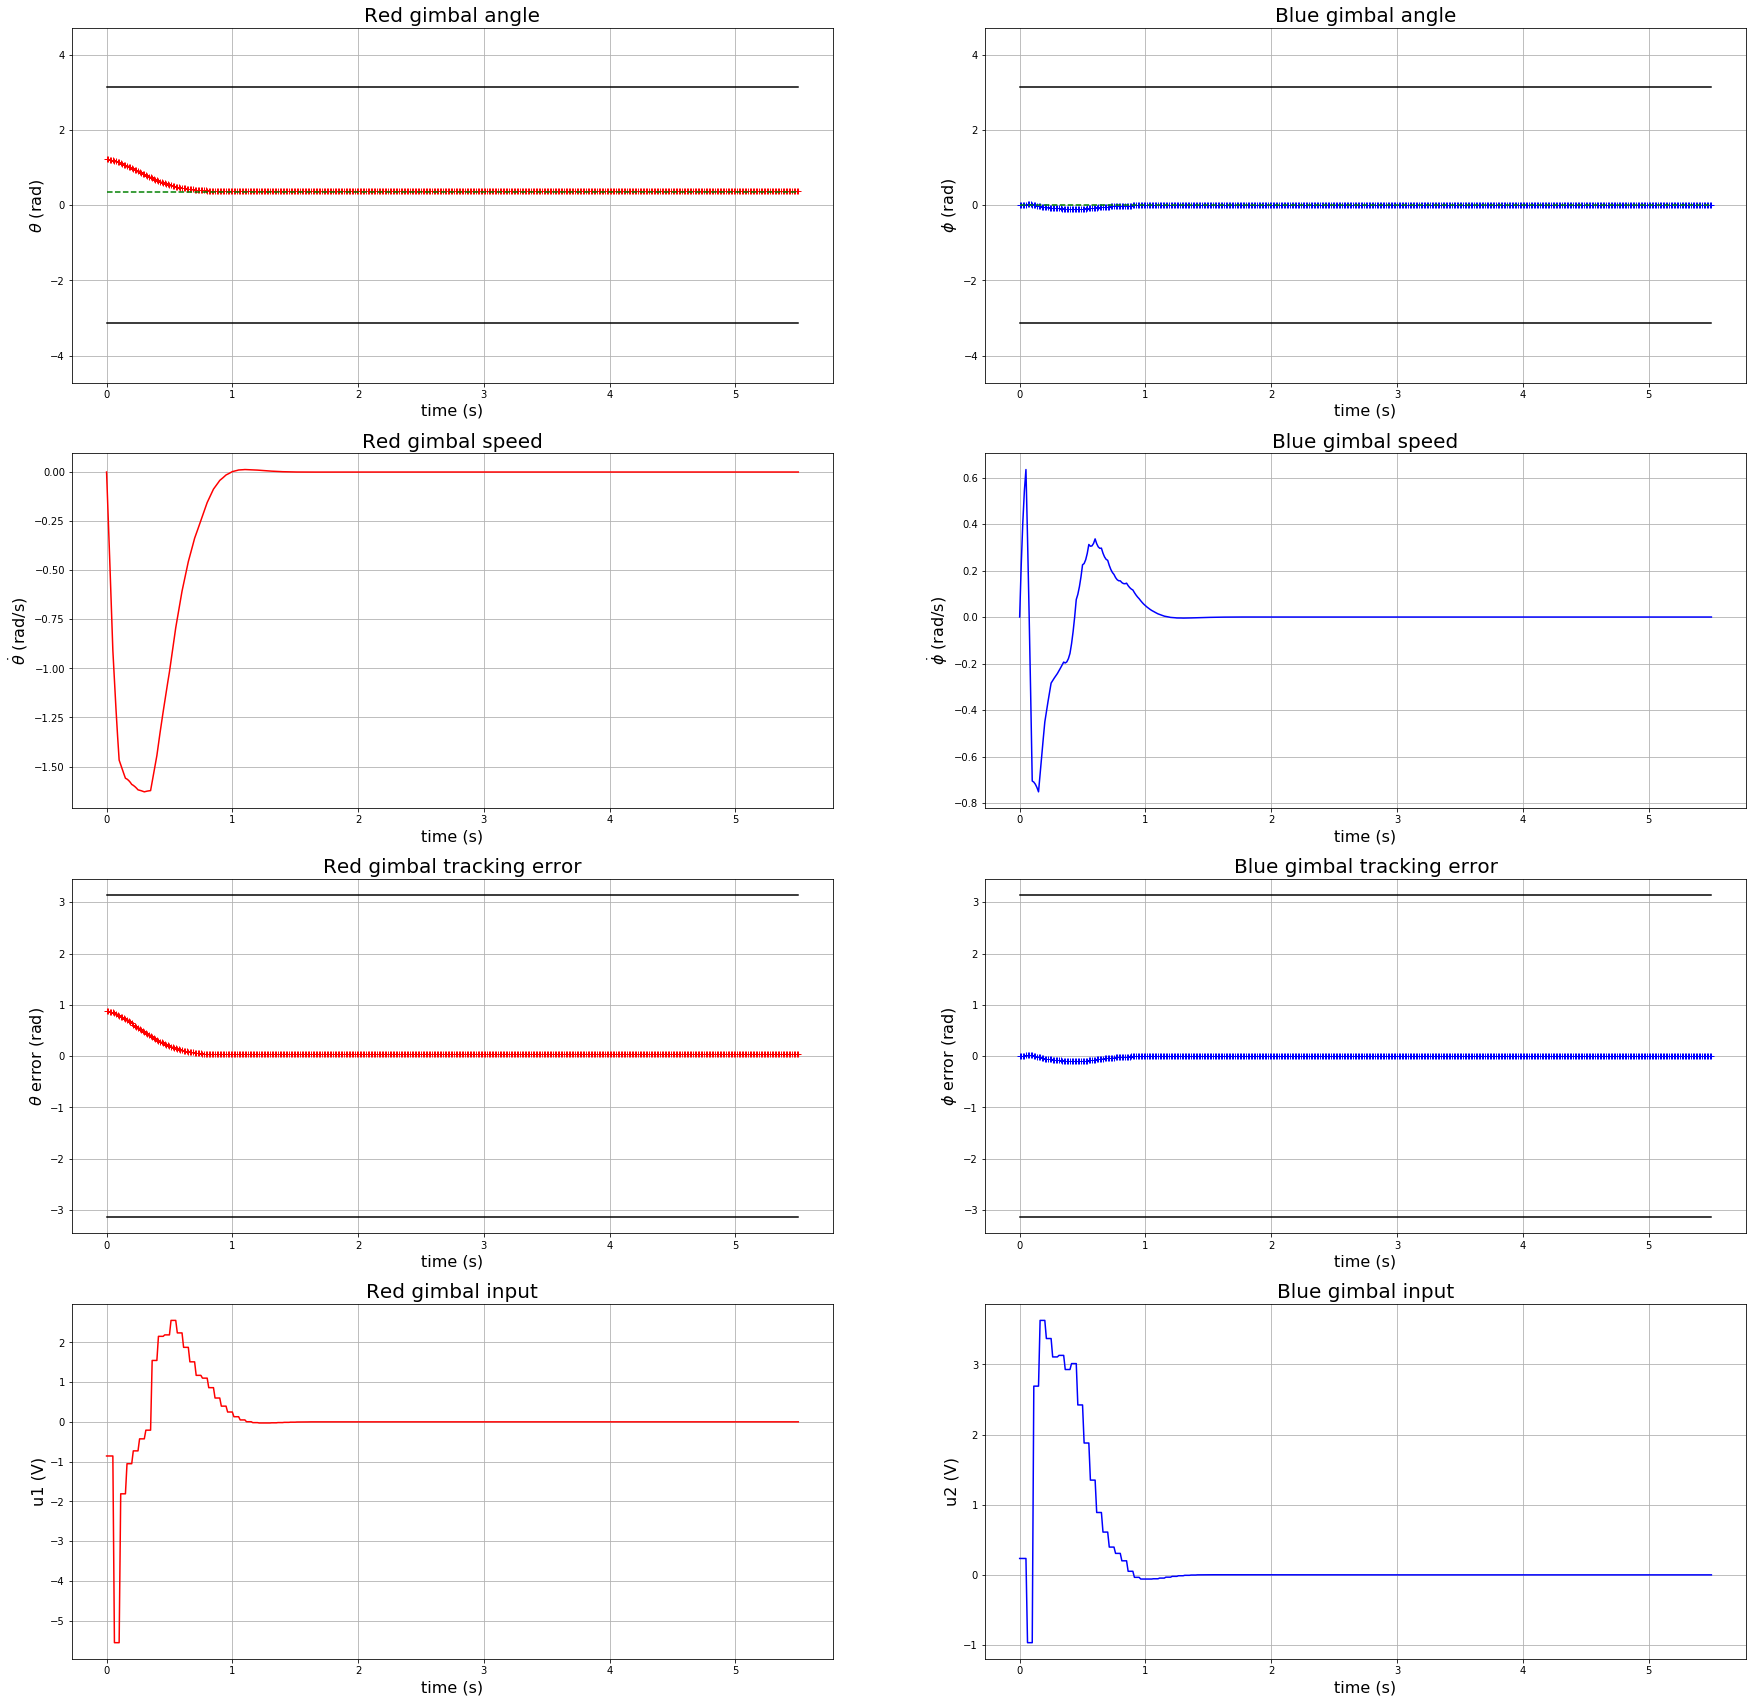

In [25]:
plot_test(x1_eval,x2_eval,x3_eval,x4_eval,x1_ref_eval,x3_ref_eval,act,t_end)

## Evaluate control performance

In [ ]:
# Single evaluation
env_name = 'gyroscopeenv-v0'
agent_path = 'td3_n_b_var1/'
ss_bound = 0.05
metrics = evaluate_control(env_name,agent_path,ss_bound)
metrics

In [29]:
# Init dataframe
env_name = 'gyroscopeenv-v0'
agent_paths = ['td3_n_b_it1/','td3_n_it1_lr_var0/','td3_n_it1_lr_var1/','td3_n_it1_hid_var0/','td3_n_it1_hid_var1/','td3_n_it1_bs_var0/','td3_n_it1_bs_var1/','td3_n_it1_g_var0/','td3_n_it1_g_var1/','td3_n_it1_pol_var0/','td3_n_it1_pol_var1/','td3_n_it1_nc_var0/','td3_n_it1_nc_var1/','td3_n_b_it2/']
ss_bound = 0.05

# Loop dataframe
for idx, agent_path in zip(range(len(agent_paths)),agent_paths):
    if idx == 0:
        metrics = evaluate_control(env_name,agent_path,ss_bound)
    else:
        new_metrics = evaluate_control(env_name,agent_path,ss_bound)
        metrics = metrics.append(new_metrics)

KeyboardInterrupt: 

In [3]:
# Manipulate
metrics_man = metrics[['$\theta$ MAE (rad)','$\phi$ MAE (rad)','$\theta$ MSSE (rad)','$\phi$ MSSE (rad)','$\theta$ in bounds (%)','$\phi$ in bounds (%)','$\theta$ unsteady (%)','$\phi$ unsteady (%)','u1 (V)','u2 (V)','u1 variation (V)','u2 variation (V)']]
metrics_man = metrics_man.transpose()
metrics_man = metrics_man.round(2)
metrics_man

Config.                 td3_n_b_it1/  td3_n_it1_lr_var0/  td3_n_it1_lr_var1/  \
$\theta$ MAE (rad)              0.21                0.21                0.18   
$\phi$ MAE (rad)                0.13                0.13                0.12   
$\theta$ MSSE (rad)             0.04                0.04                0.04   
$\phi$ MSSE (rad)               0.02                0.02                0.02   
$\theta$ in bounds (%)         77.50               69.50               64.00   
$\phi$ in bounds (%)           89.50               89.00               90.00   
$\theta$ unsteady (%)           0.00                0.00                0.00   
$\phi$ unsteady (%)             0.00                0.00                0.00   
u1 (V)                          0.73                0.79                0.80   
u2 (V)                          0.59                0.64                0.55   
u1 variation (V)                0.06                0.07                0.07   
u2 variation (V)                0.07                0.07                0.07   

Config.                 td3_n_it1_hid_var0/  td3_n_it1_hid_var1/  \
$\theta$ MAE (rad)                     0.23                 0.23   
$\phi$ MAE (rad)                       0.11                 0.14   
$\theta$ MSSE (rad)                    0.03                 0.03   
$\phi$ MSSE (rad)                      0.02                 0.03   
$\theta$ in bounds (%)                74.00                69.50   
$\phi$ in bounds (%)                  97.00                82.00   
$\theta$ unsteady (%)                  0.00                 0.00   
$\phi$ unsteady (%)                    0.00                 0.00   
u1 (V)                                 0.89                 0.87   
u2 (V)                                 0.65                 0.61   
u1 variation (V)                       0.07                 0.07   
u2 variation (V)                       0.07                 0.08   

Config.                 td3_n_it1_bs_var0/  td3_n_it1_bs_var1/  \
$\theta$ MAE (rad)                    0.20                0.21   
$\phi$ MAE (rad)                      0.13                0.13   
$\theta$ MSSE (rad)                   0.04                0.05   
$\phi$ MSSE (rad)                     0.04                0.04   
$\theta$ in bounds (%)               54.00               66.00   
$\phi$ in bounds (%)                 80.00               79.00   
$\theta$ unsteady (%)                 0.00                0.00   
$\phi$ unsteady (%)                   0.00                0.00   
u1 (V)                                0.83                0.84   
u2 (V)                                0.53                0.64   
u1 variation (V)                      0.07                0.07   
u2 variation (V)                      0.07                0.07   

Config.                 td3_n_it1_g_var0/  td3_n_it1_g_var1/  \
$\theta$ MAE (rad)                   0.23               0.20   
$\phi$ MAE (rad)                     0.16               0.13   
$\theta$ MSSE (rad)                  0.02               0.04   
$\phi$ MSSE (rad)                    0.02               0.03   
$\theta$ in bounds (%)              95.00              85.00   
$\phi$ in bounds (%)                89.50              84.50   
$\theta$ unsteady (%)                0.00               0.00   
$\phi$ unsteady (%)                  0.00               0.00   
u1 (V)                               0.82               0.81   
u2 (V)                               0.60               0.68   
u1 variation (V)                     0.07               0.06   
u2 variation (V)                     0.07               0.07   

Config.                 td3_n_it1_pol_var0/  td3_n_it1_pol_var1/  \
$\theta$ MAE (rad)                     0.19                 0.19   
$\phi$ MAE (rad)                       0.15                 0.14   
$\theta$ MSSE (rad)                    0.03                 0.03   
$\phi$ MSSE (rad)                      0.03                 0.05   
$\theta$ in bounds (%)                77.5

In [30]:
# Init dataframe
env_name = 'gyroscopeenv-v0'
agent_paths = ['td3_n_b_var1/','td3_n_b_it1/','td3_n_b_it2/']
ss_bound = 0.05

# Loop dataframe
for idx, agent_path in zip(range(len(agent_paths)),agent_paths):
    if idx == 0:
        metrics = evaluate_control(env_name,agent_path,ss_bound)
    else:
        new_metrics = evaluate_control(env_name,agent_path,ss_bound)
        metrics = metrics.append(new_metrics)

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [31]:
# Manipulate
metrics_man = metrics[['$\theta$ MAE (rad)','$\phi$ MAE (rad)','$\theta$ MSSE (rad)','$\phi$ MSSE (rad)','$\theta$ in bounds (%)','$\phi$ in bounds (%)','$\theta$ unsteady (%)','$\phi$ unsteady (%)','u1 (V)','u2 (V)','u1 variation (V)','u2 variation (V)']]
metrics_man = metrics_man.transpose()
metrics_man = metrics_man.round(2)
metrics_man

Config.                 td3_n_b_var1/  td3_n_b_it1/  td3_n_b_it2/
$\theta$ MAE (rad)               0.26          0.20          0.20
$\phi$ MAE (rad)                 0.18          0.13          0.12
$\theta$ MSSE (rad)              0.07          0.05          0.02
$\phi$ MSSE (rad)                0.05          0.02          0.02
$\theta$ in bounds (%)          55.50         71.50         95.50
$\phi$ in bounds (%)            58.00         92.00         93.50
$\theta$ unsteady (%)            0.00          0.00          0.00
$\phi$ unsteady (%)              0.00          0.00          0.00
u1 (V)                           0.83          0.76          0.79
u2 (V)                           0.65          0.58          0.62
u1 variation (V)                 0.07          0.06          0.07
u2 variation (V)                 0.05          0.07          0.08

In [32]:
# To LaTex
print(metrics_man.to_latex(escape=False))

\begin{tabular}{lrrr}
\toprule
Config. &  td3_n_b_var1/ &  td3_n_b_it1/ &  td3_n_b_it2/ \\
\midrule
$\theta$ MAE (rad)     &           0.26 &          0.20 &          0.20 \\
$\phi$ MAE (rad)       &           0.18 &          0.13 &          0.12 \\
$\theta$ MSSE (rad)    &           0.07 &          0.05 &          0.02 \\
$\phi$ MSSE (rad)      &           0.05 &          0.02 &          0.02 \\
$\theta$ in bounds (%) &          55.50 &         71.50 &         95.50 \\
$\phi$ in bounds (%)   &          58.00 &         92.00 &         93.50 \\
$\theta$ unsteady (%)  &           0.00 &          0.00 &          0.00 \\
$\phi$ unsteady (%)    &           0.00 &          0.00 &          0.00 \\
u1 (V)                 &           0.83 &          0.76 &          0.79 \\
u2 (V)                 &           0.65 &          0.58 &          0.62 \\
u1 variation (V)       &           0.07 &          0.06 &          0.07 \\
u2 variation (V)       &           0.05 &          0.07 &          0.08 \\
